# Building Neural Network

## Binary Classification

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow.keras.datasets import imdb # Movie review classification

In [3]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (25000,)
Test data shape: (25000,)


In [4]:
# Data preview
print(f"First data: {train_data[0]}\n")
print(f"First label: {train_labels[0]}")

First data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

First label: 1


In [5]:
# Double check if the words are the top 10000
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Change numbers back to words
word_index = imdb.get_word_index()

In [7]:
# See how the dict are made
for i in word_index.items():
    print(i)
    break

('fawn', 34701)


In [8]:
# Change the key-value order
reverse_word_index = {value: key for key, value in word_index.items()}

In [9]:
# See how the dict are made
for i in reverse_word_index.items():
    print(i)
    break

(34701, 'fawn')


In [10]:
reverse_word_index.get(34701 - 3, '?')

'footwork'

In [11]:
# Reverse the first data preview
decoded_first = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Since the dataset keep 0, 1, 2 for specific purpose, so i - 3 is needed to get the corresponding word
print(f"First data: {decoded_first}\n")
print(f"First label: {train_labels[0]}")

First data: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done d

### Data preparation

In [12]:
for idx, item in enumerate(train_data):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 218
Review 1 - length 189
Review 2 - length 141
Review 3 - length 550
Review 4 - length 147
Review 5 - length 43
Review 6 - length 123
Review 7 - length 562
Review 8 - length 233
Review 9 - length 130


In [14]:
# Since each review is in different length, we need to make them the same length 
# so that the neural network is able to handle the input dataset

# Apply one-hot encoding to the dataset
def verctorize_sequence(sequences, dimension=10000):
    # Zeros vectors
    results = np.zeros((len(sequences), dimension))
    # Set corresponding word as 1 if the sequence has it
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results

x_train = verctorize_sequence(train_data)
x_test = verctorize_sequence(test_data)
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (25000, 10000)
Test data shape: (25000, 10000)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# Check again
for idx, item in enumerate(x_train):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 10000
Review 1 - length 10000
Review 2 - length 10000
Review 3 - length 10000
Review 4 - length 10000
Review 5 - length 10000
Review 6 - length 10000
Review 7 - length 10000
Review 8 - length 10000
Review 9 - length 10000


In [18]:
# Transform the labels as vectors
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model Training

#### Define the model

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# Model structure
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [25]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#### Training

In [26]:
# Spilt the validation set
val_num = 10000
x_val = x_train[:val_num]
partial_x_train = x_train[val_num:]
y_val = y_train[:val_num]
partial_y_train = y_train[val_num:]

In [27]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20


2023-11-25 08:51:35.397809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.7877

2023-11-25 08:51:37.464748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 57ms/step - loss: 0.4961 - accuracy: 0.7877 - val_loss: 0.4096 - val_accuracy: 0.8269
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3049 - accuracy: 0.8995 - val_loss: 0.3101 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2285 - accuracy: 0.9257 - val_loss: 0.3074 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1789 - accuracy: 0.9421 - val_loss: 0.2755 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1487 - accuracy: 0.9550 - val_loss: 0.2908 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1228 - accuracy: 0.9623 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1016 - accuracy: 0.9719 - val_loss: 0.3896 - val_accuracy: 0.8641
Epoch 8/20
30/30 [======

#### Evaluation

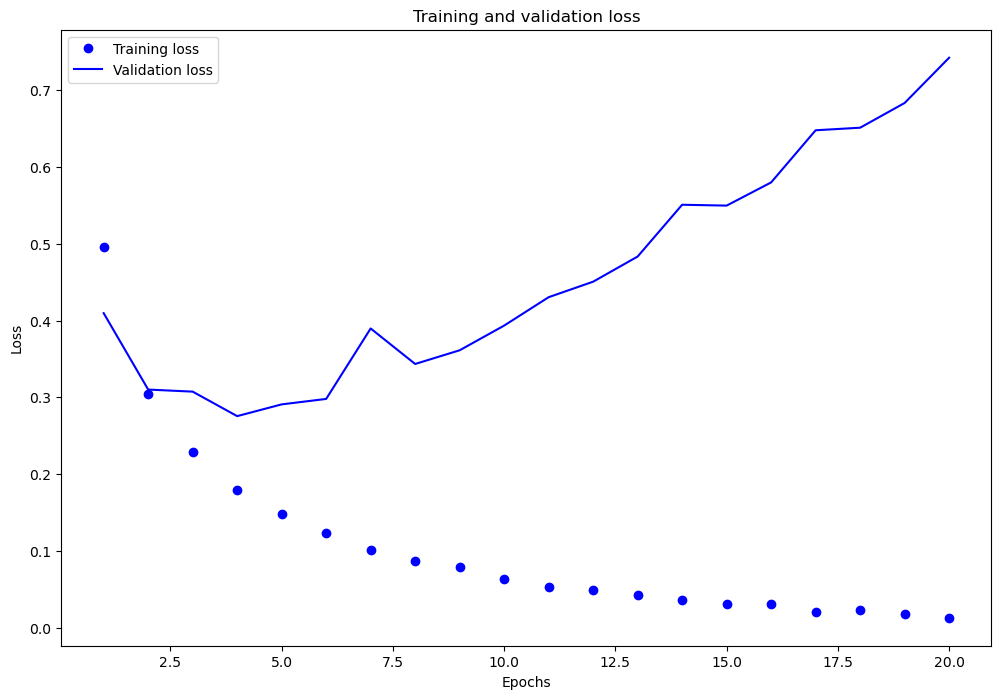

In [ ]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


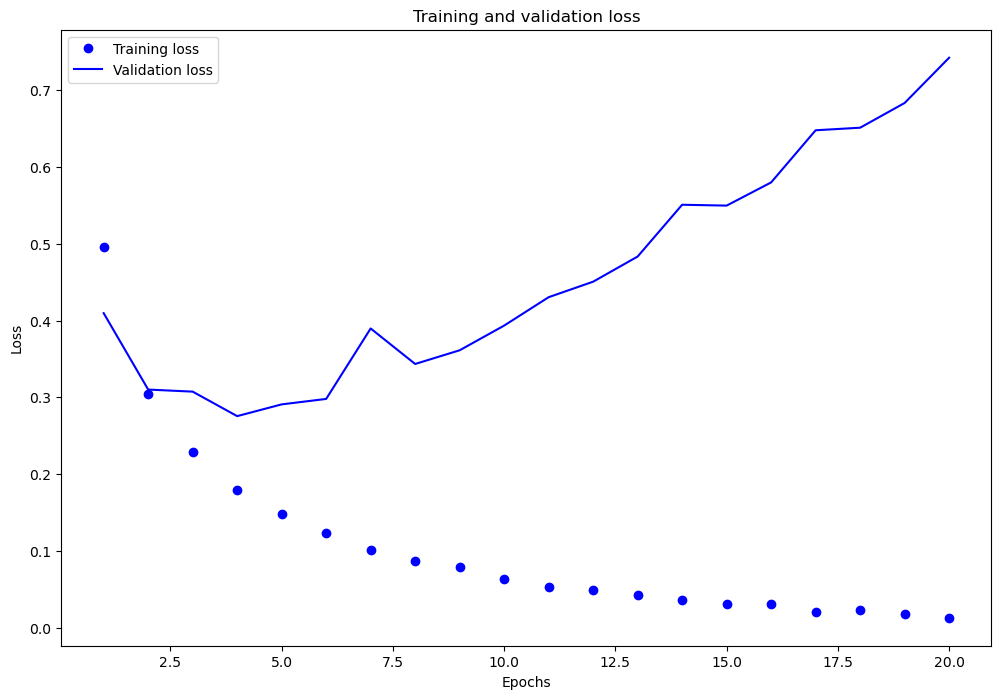

In [ ]:
# Get loss values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'bo', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

## Multi Class Classification

In [30]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
# Dataset
from tensorflow.keras.datasets import reuters # Movie review classification

### EDA

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

2110848/2110848 [==============================] - 0s 0us/step
Training data shape: (8982,)
Test data shape: (2246,)


In [3]:
# Data preview
print(f"First data: {train_data[0]}\n")
print(f"First label: {train_labels[0]}")

First data: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

First label: 3


In [4]:
# Double check if the words are the top 10000
max([max(sequence) for sequence in train_data])

9999

In [77]:
# Exploe training labels
label_count = {key: 0 for key in range(46)}
for i in train_labels:
    label_count[i] += 1

In [60]:
label_count.values()

dict_values([55, 432, 74, 3159, 1949, 17, 48, 16, 139, 101, 124, 390, 49, 172, 26, 20, 444, 39, 66, 549, 269, 100, 15, 41, 62, 92, 24, 15, 48, 19, 45, 39, 32, 11, 50, 10, 49, 19, 19, 24, 36, 30, 13, 21, 12, 18])

<BarContainer object of 46 artists>

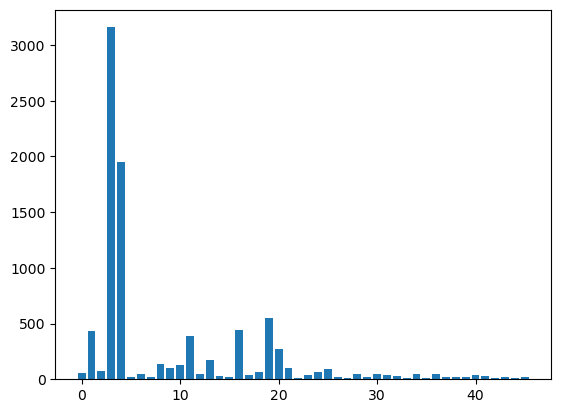

In [78]:
# See how each news topics in the dataset distributed
# import seaborn as sns
plt.bar(range(46), label_count.values())

In [5]:
# Change numbers back to words
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [6]:
# See how the dict are made
for i in word_index.items():
    print(i)
    break

('mdbl', 10996)


In [7]:
# Change the key-value order
reverse_word_index = {value: key for key, value in word_index.items()}

In [8]:
# See how the dict are made
for i in reverse_word_index.items():
    print(i)
    break

(10996, 'mdbl')


In [9]:
# Reverse the first data preview
decoded_first = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Since the dataset keep 0, 1, 2 for specific purpose, so i - 3 is needed to get the corresponding word
print(f"First data: {decoded_first}\n")
print(f"First label: {train_labels[0]}")

First data: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

First label: 3


### Data preparation

In [11]:
for idx, item in enumerate(train_data):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 87
Review 1 - length 56
Review 2 - length 139
Review 3 - length 224
Review 4 - length 101
Review 5 - length 116
Review 6 - length 100
Review 7 - length 100
Review 8 - length 82
Review 9 - length 106


In [13]:
# Since each review is in different length, we need to make them the same length 
# so that the neural network is able to handle the input dataset
import numpy as np
# Apply one-hot encoding to the dataset
def verctorize_sequence(sequences, dimension=10000):
    # Zeros vectors
    results = np.zeros((len(sequences), dimension))
    # Set corresponding word as 1 if the sequence has it
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results

x_train = verctorize_sequence(train_data)
x_test = verctorize_sequence(test_data)
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (8982, 10000)
Test data shape: (2246, 10000)


In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
# Check again
for idx, item in enumerate(x_train):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 10000
Review 1 - length 10000
Review 2 - length 10000
Review 3 - length 10000
Review 4 - length 10000
Review 5 - length 10000
Review 6 - length 10000
Review 7 - length 10000
Review 8 - length 10000
Review 9 - length 10000


In [22]:
# Transform the labels using categorical encoding - one-hot

# Method one
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for idx, label in enumerate(labels):
        results[idx, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# Method two - Keras built-in functions
from tensorflow.keras.utils import to_categorical()
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# Transform the labels using categorical encoding - target

from category_encoders import TargetEncoder

encoder = TargetEncoder()

encoder.fit(x_train, y_train)
X_cleaned = encoder.transform(x_train)


### Model Training

#### Define the model

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
# Model structure
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [27]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#### Training

In [23]:
# Spilt the validation set
val_num = 1000
x_val = x_train[:val_num]
partial_x_train = x_train[val_num:]
y_val = y_train[:val_num]
partial_y_train = y_train[val_num:]

In [28]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20


2023-11-26 15:17:03.270254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 60ms/step - loss: 2.2241 - accuracy: 0.5228 - val_loss: 1.5709 - val_accuracy: 0.6180
Epoch 2/20
 4/16 [======>.......................] - ETA: 0s - loss: 1.3378 - accuracy: 0.6904

2023-11-26 15:17:05.300736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 19ms/step - loss: 1.2661 - accuracy: 0.7081 - val_loss: 1.2139 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9513 - accuracy: 0.7821 - val_loss: 1.0997 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7379 - accuracy: 0.8340 - val_loss: 0.9925 - val_accuracy: 0.8030
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5544 - accuracy: 0.8800 - val_loss: 1.0275 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4300 - accuracy: 0.9059 - val_loss: 0.9721 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.3402 - accuracy: 0.9251 - val_loss: 1.0588 - val_accuracy: 0.7760
Epoch 8/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2618 - accuracy: 0.9420 - val_loss: 0.9994 - val_accuracy: 0.8100
Epoch 9/20
16/16 [======

#### Evaluation

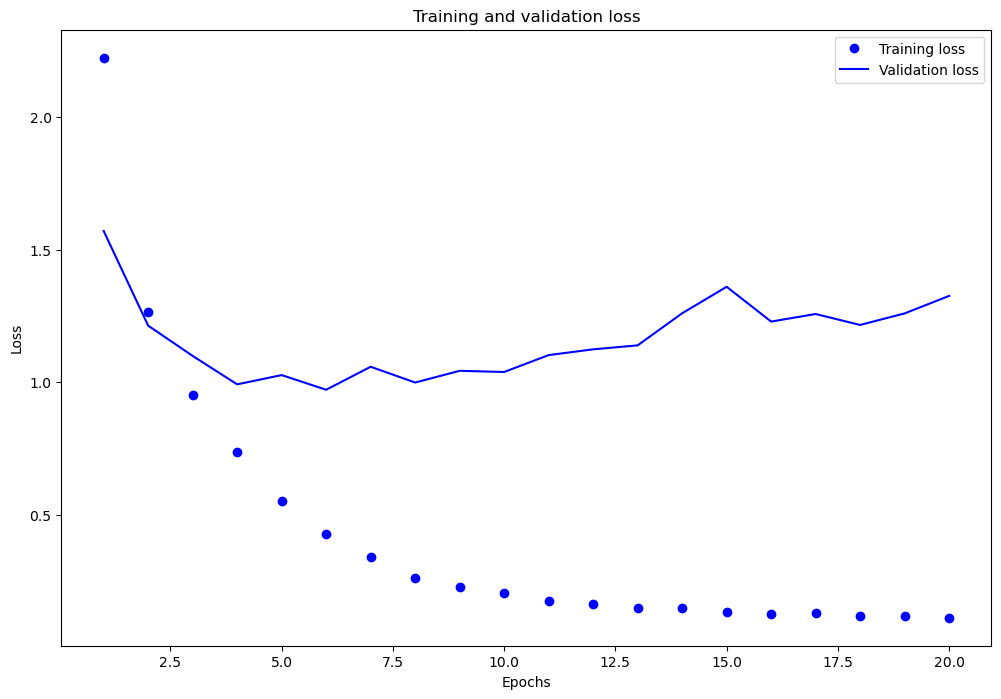

In [31]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


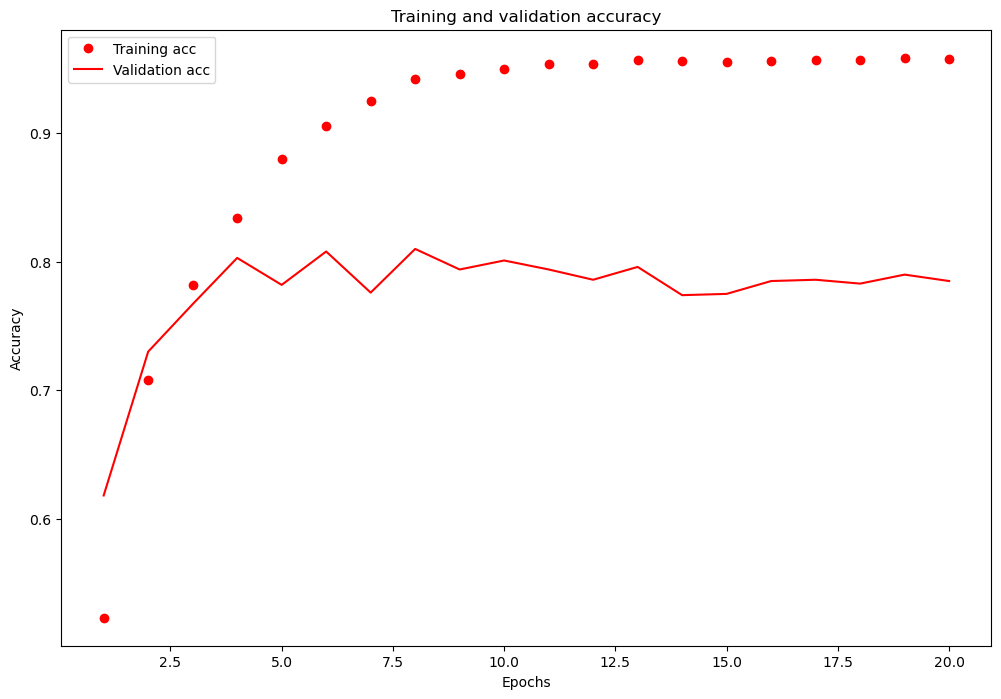

In [35]:
# Get loss values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'ro', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

* From the plot, we can see that there seem to be overfitting after the eighth epoch. Thus, we can train the model again and set the epoch as 8 to make it more general.

In [98]:
# Model structure
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    # layers.Dense(256, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [99]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [100]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 6,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/6


2023-11-26 16:06:05.305270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 30ms/step - loss: 2.3009 - accuracy: 0.5613 - val_loss: 1.5069 - val_accuracy: 0.6660
Epoch 2/6
 5/16 [========>.....................] - ETA: 0s - loss: 1.3737 - accuracy: 0.7082

2023-11-26 16:06:05.916717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 18ms/step - loss: 1.2633 - accuracy: 0.7301 - val_loss: 1.2160 - val_accuracy: 0.7220
Epoch 3/6
16/16 [==============================] - 0s 18ms/step - loss: 0.9418 - accuracy: 0.7968 - val_loss: 1.0784 - val_accuracy: 0.7630
Epoch 4/6
16/16 [==============================] - 0s 17ms/step - loss: 0.7337 - accuracy: 0.8472 - val_loss: 0.9608 - val_accuracy: 0.8080
Epoch 5/6
16/16 [==============================] - 0s 17ms/step - loss: 0.5755 - accuracy: 0.8811 - val_loss: 0.9240 - val_accuracy: 0.8110
Epoch 6/6
16/16 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.9057 - val_loss: 0.9162 - val_accuracy: 0.8030


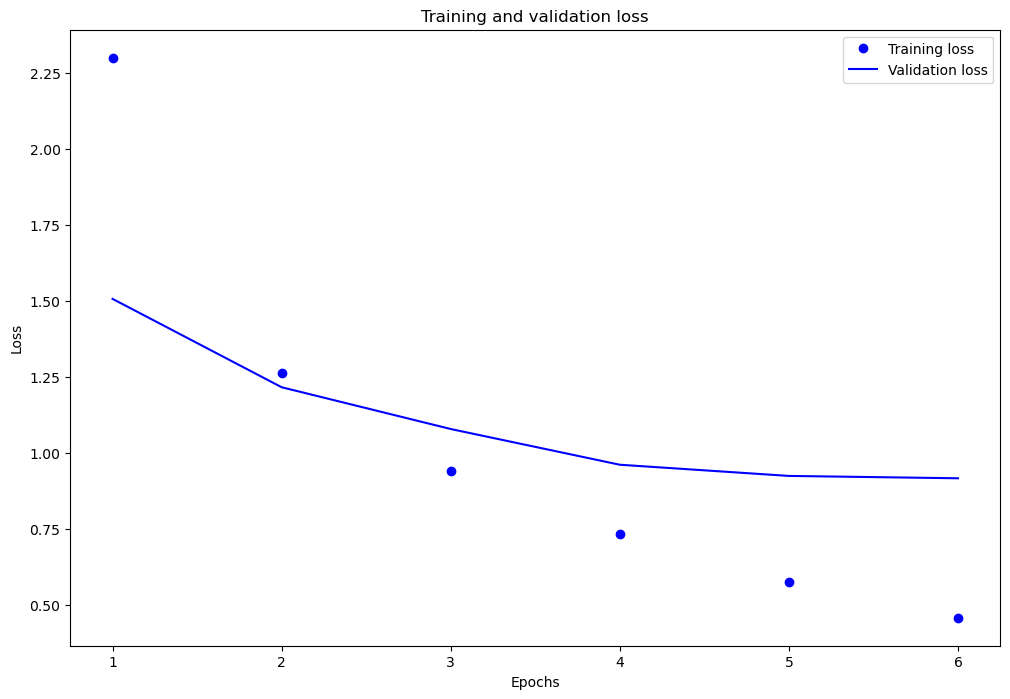

In [102]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(6)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


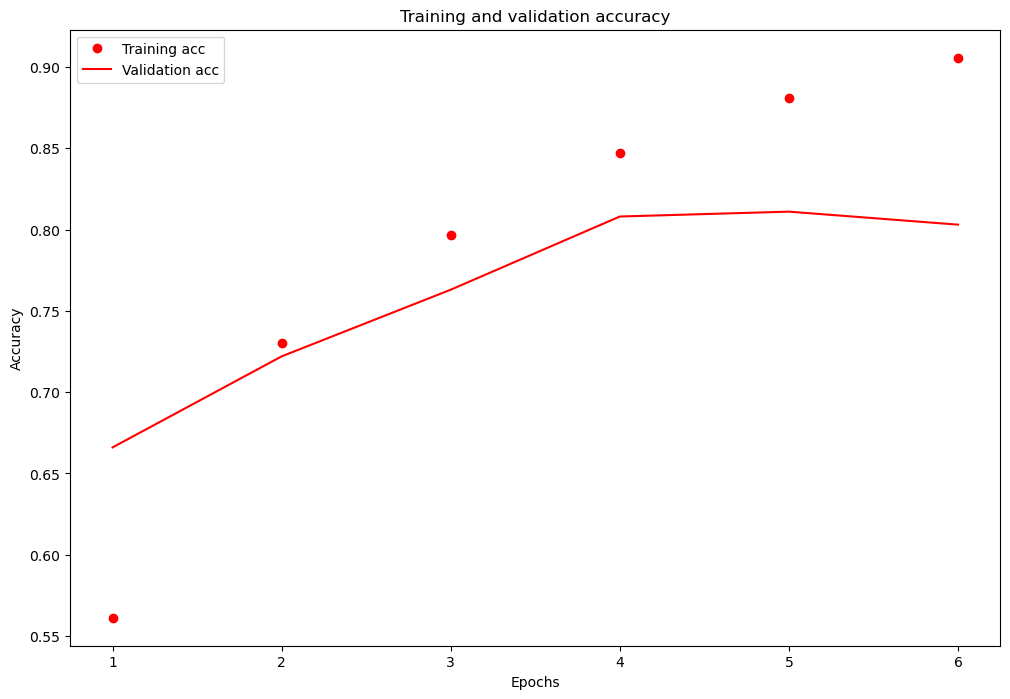

In [103]:
# Get loss values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# Plot
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'ro', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

In [104]:
# Model evaluation
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]:.3f}")
print(f"Accuracy: {results[1]:.3f}")

71/71 [==============================] - 1s 10ms/step - loss: 0.9972 - accuracy: 0.7752
Loss: 0.997
Accuracy: 0.775


In [ ]:
# Prediction
predictions = model.predict(x_test)


## Regression

In [106]:
# Packages
# import numpy as np
# import matplotlib.pyplot as plt
# Dataset
from tensorflow.keras.datasets import boston_housing # Movie review classification

### EDA

In [107]:
# Load data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

57026/57026 [==============================] - 0s 0us/step
Training data shape: (404, 13)
Test data shape: (102, 13)


In [112]:
train_data[0, :]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [114]:
# Data preview
print(f"First data: {train_data[0, :]}\n")
print(f"Number of features: {len(train_data[0, :])}\n")
print(f"First target: USD {train_targets[0]} thousands")

First data: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

Number of features: 13

First target: USD 15.2 thousands


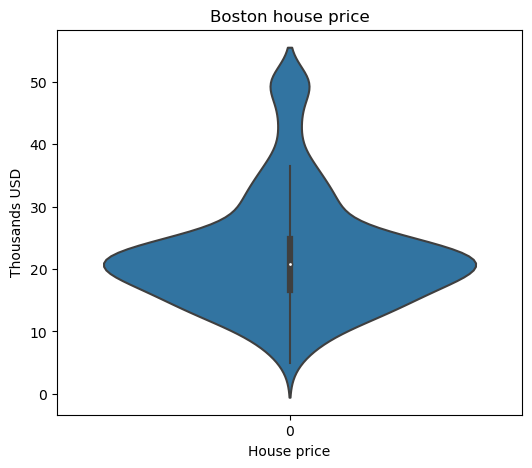

In [120]:
# See how our targets(house price) are distributed
# import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data = train_targets, ax = ax)
ax.set_title('Boston house price');
ax.set_xlabel('House price');
ax.set_ylabel('Thousands USD');

### Data preparation

In [121]:
# Since each numerical feature is in different scale, normalization (x-µ/std) is needed
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# NOTE! Test data needed to use the mean & std from the training dataset to prevent data leak
test_data -= mean
test_data /= std

### Model Training

#### Define the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
# Model structure
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        # The output layer is just scalar without any activation function.
        # If activation function is applied, the output value would be confined by it.
        layers.Dense(1) 
    ])
    # Compile the model
    model.compile(
        optimizer = 'rmsprop',
        loss = 'mse', # Common for regression problem
        metrics = ['mae'] # Common for regression problem
    )
    return model

#### K-fold Cross Validation

In [123]:
# The amount of training data is not much, so it is not easy to split the validation set.
# Under this situation, K-fold cross validation can be helpful to lower the variance of the output.

# K-fold's K
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()

    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs = num_epochs,
        batch_size = 16,
        verbose = 0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


2023-11-27 21:20:38.102482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:20:52.606643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2023-11-27 21:20:53.094756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:05.946982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2023-11-27 21:21:06.160603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:19.615502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2023-11-27 21:21:19.840064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:32.539396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [124]:
all_scores

[5.189770221710205, 6.0925397872924805, 3.769810199737549, 4.035677433013916]

In [125]:
np.mean(all_scores)

4.771949410438538

In [127]:
# The result above is not that good, and we increase the number of epochs and find the best early stopping point
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 500
all_mae_history = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data = (val_data, val_targets),
        epochs = num_epochs,
        batch_size = 1,
        verbose = 0
    )
    val_mae = history.history['val_mae']
    all_mae_history.append(val_mae)

Processing fold #0


2023-11-27 21:31:18.430555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:31:21.323771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2023-11-27 21:46:10.450973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:46:12.267961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2023-11-27 22:00:29.622761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:00:31.654424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2023-11-27 22:15:26.300148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:15:28.130814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [132]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

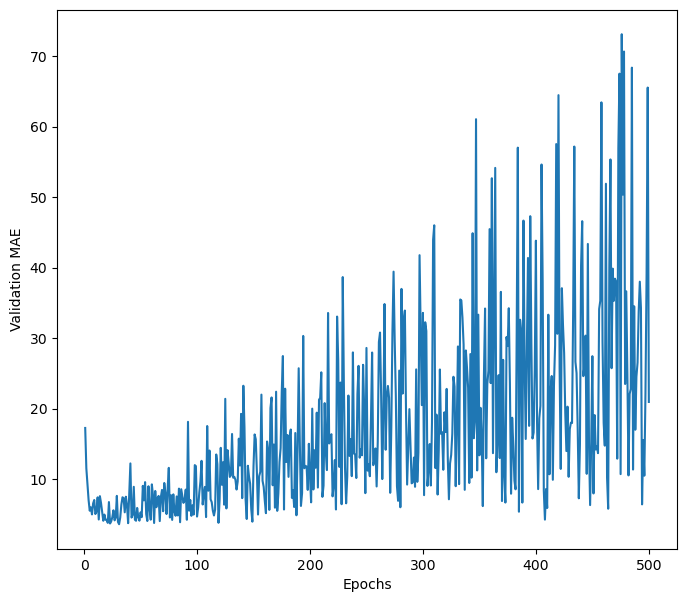

In [134]:
fig, ax = plt.subplots(figsize = (8, 7))
ax.plot(range(1, len(average_mae_history)+1), average_mae_history)
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation MAE')

Text(0, 0.5, 'Validation MAE')

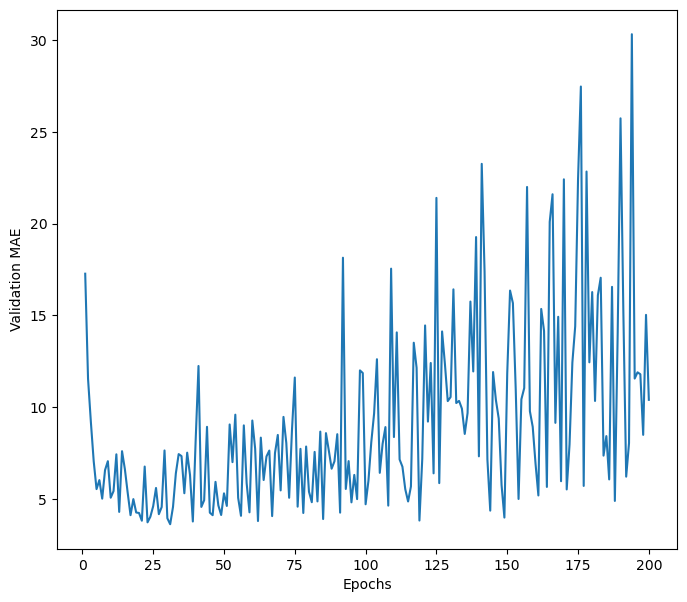

In [155]:
top_num = 200
fig, ax = plt.subplots(figsize = (8, 7))
ax.plot(range(1, top_num+1), average_mae_history[:top_num])
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation MAE')

In [150]:
np.argmin(average_mae_history)

30

#### Training

In [151]:
model = build_model()
model.fit(
    train_data, train_targets,
    epochs = 50,
    batch_size = 16,
    verbose = 0)

test_mse, test_mae = model.evaluate(test_data, test_targets)
print(f'Test MSE: {test_mse:.3f}')
print(f'Test MAE: {test_mae:.3f}')

2023-11-28 21:37:25.145569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 20.2986 - mae: 3.5479
Test MSE: 20.299
Test MAE: 3.548


2023-11-28 21:37:34.381417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


#### Evaluation

In [152]:
# Prediction
predictions = model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


2023-11-28 21:37:44.409095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [154]:
i = 0
print(f"Predicted: {predictions[i][0]:.3f}")
print(f"Actual: {test_targets[i]:.3f}")

Predicted: 5.615
Actual: 7.200


# Create Deep Learning Models by Keras

In [1]:
# Packages
from tensorflow import keras
from tensorflow.keras import layers

## Sequential Model

In [5]:
# Build a sequential model
# Method 1
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', name = 'InputLayer'),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
], name='FirstModel')


In [ ]:
# Method 2
model = keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [6]:
# Use build() function to build the model
model.build(input_shape=(None, 3))
print(model.summary())

Model: "FirstModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
# The weights can be retrived after build
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-1.08771443e-01,  1.63652807e-01,  2.18940318e-01,
          1.49826109e-01, -2.58386016e-01, -1.43907130e-01,
         -1.99036986e-01, -3.55388820e-02,  5.64639270e-02,
         -1.92337185e-01, -1.33971572e-01, -1.67674810e-01,
          1.61990345e-01,  1.35371327e-01, -1.01422295e-01,
          1.22449994e-02,  2.20684946e-01,  1.44894868e-01,
         -1.47465497e-01,  2.20934868e-01, -9.96824950e-02,
         -7.62673318e-02,  1.52418435e-01,  1.37570977e-01,
          1.63461268e-02,  1.46767229e-01,  6.72676265e-02,
         -4.68883812e-02, -1.93949431e-01,  1.61088645e-01,
         -1.72329083e-01, -1.17363304e-01, -1.53008103e-02,
          1.13399535e-01, -2.53547072e-01,  2.40516901e-01,
          1.48187339e-01, -2.13973150e-01,  1.25776321e-01,
          1.74148738e-01,  1.57739103e-01,  1.90455407e-01,
         -2.43690997e-01,  1.37250483e-01,  2.74371743e-01,
         -2.97262490e-01,  3.6798

In [7]:
# Use keras.Input() class to declare input
model = keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(64, activation = 'relu', name = 'InputLayer'),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
], name='FirstModel')
# No need to call build() afterwards
print(model.summary())

Model: "FirstModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Functional API

In [10]:
inputs = keras.Input(shape=(3,), name = 'Input')
features = layers.Dense(64, activation = 'relu', name = 'InputLayer')(inputs)
outputs = layers.Dense(10, activation = 'softmax', name = 'OutputLayer')(features)
model = keras.Model(inputs = inputs, outputs = outputs, name = 'SecondModel')
print(model.summary())

Model: "SecondModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 3)]               0         
                                                                 
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
features.shape

TensorShape([None, 64])

In [11]:
# Multi-input & output model
vocabulary_size = 10000
num_tags = 100
num_dept = 4

# Input layers
title = keras.Input(shape=(vocabulary_size,), name = 'title')
text_body = keras.Input(shape=(vocabulary_size,), name = 'text_body')
tags = keras.Input(shape=(num_tags,), name = 'tags')

# Concatenate different features as one tensor
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = 'relu')(features)

# Outputs
priority = (layers.Dense(1, activation = 'sigmoid', name = 'priority')(features))
dept = (layers.Dense(num_dept, activation = 'softmax', name = 'dept')(features))

model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, dept])

print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',       

# Little Data Model Training

## First model from scratch

### Data preparation

In [13]:
# Only use little data to train a model

# Packages
import os, shutil
from pathlib import Path

# Training data
original_dir = Path.home() /'Desktop/dogs-vs-cats/train'
# New dir for selected data for training
new_base_dir = Path.home() /'Desktop/dogs-vs-cats/cats_vs_dogs_small'

def make_subset(subset_name, start_index, end_index):

    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # Select training data
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        # Copy training data
        for fname in fnames:
            shutil.copyfile(src = original_dir / fname, dst = dir / fname)

# Training dataset
make_subset('train', start_index=0, end_index=1000)
# Validation dataset
make_subset('validation', start_index=1000, end_index=1500)
# Test dataset
make_subset('test', start_index=1500, end_index=2500)

### Model build

In [14]:
# Packages
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
inputs = keras.Input(shape = (180, 180, 3))
# Rescale the image data
x = layers.Rescaling(1./255)(inputs)
# CNN structure
x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [22]:
# Model Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

### Data preprocessing

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size = 32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size = 32)

train_dataset.prefetch(4)
validation_dataset.prefetch(4)
test_dataset.prefetch(4)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
# Training the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras_',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30


2023-12-10 16:02:03.053134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7340 - accuracy: 0.5315

2023-12-10 16:02:07.256039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 6s 80ms/step - loss: 0.7340 - accuracy: 0.5315 - val_loss: 0.6863 - val_accuracy: 0.6030
Epoch 2/30
62/63 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5615INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 72ms/step - loss: 0.6913 - accuracy: 0.5625 - val_loss: 0.6623 - val_accuracy: 0.5980
Epoch 3/30
62/63 [============================>.] - ETA: 0s - loss: 0.6899 - accuracy: 0.5948INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 72ms/step - loss: 0.6897 - accuracy: 0.5940 - val_loss: 0.6521 - val_accuracy: 0.5820
Epoch 4/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6266 - accuracy: 0.6515 - val_loss: 0.9419 - val_accuracy: 0.5840
Epoch 5/30
62/63 [============================>.] - ETA: 0s - loss: 0.6101 - accuracy: 0.6744INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 74ms/step - loss: 0.6089 - accuracy: 0.6745 - val_loss: 0.6389 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - 4s 67ms/step - loss: 0.5900 - accuracy: 0.6870 - val_loss: 0.9732 - val_accuracy: 0.5870
Epoch 7/30
62/63 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7198INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.5394 - accuracy: 0.7200 - val_loss: 0.5718 - val_accuracy: 0.7070
Epoch 8/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5058 - accuracy: 0.7520 - val_loss: 0.9807 - val_accuracy: 0.6450
Epoch 9/30
63/63 [==============================] - 4s 66ms/step - loss: 0.4737 - accuracy: 0.7700 - val_loss: 0.6237 - val_accuracy: 0.6750
Epoch 10/30
63/63 [==============================] - 4s 66ms/step - loss: 0.4357 - accuracy: 0.8000 - val_loss: 0.6674 - val_accuracy: 0.6810
Epoch 11/30
63/63 [==============================] - 4s 66ms/step - loss: 0.3893 - accuracy: 0.8310 - val_loss: 0.8350 - val_accuracy: 0.6900
Epoch 12/30
63/63 [==============================] - 4s 66ms/step - loss: 0.3285 - accuracy: 0.8570 - val_loss: 1.0728 - val_accuracy: 0.6330
Epoch 13/30
63/63 [==============================] - 4s 67ms/step - loss: 0.2827 - accuracy: 0.8770 - val_loss: 0.8668 - val_accuracy: 0.7050
Epoch 14/30
63/63 [=

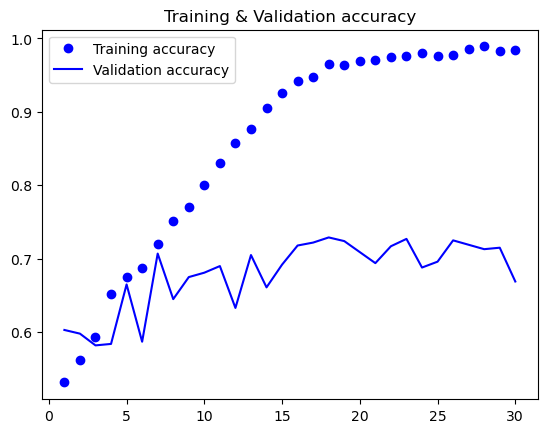

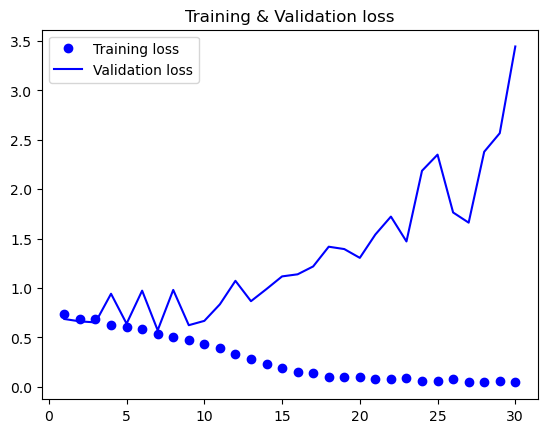

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();

In [26]:
test_model = keras.models.load_model('convnet_from_scratch.keras_')

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 13s - loss: 0.7210 - accuracy: 0.5938

2023-12-10 16:09:50.246856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 25ms/step - loss: 0.6191 - accuracy: 0.6930
Test accuracy: 0.693


## Apply Data Augmentation

In [27]:
# Apply data augmentation techniques
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'), # 50% chance flip the image
    keras.layers.RandomRotation(.1), # Rotate the image in the range [-10%, +10%]
    keras.layers.RandomZoom(.2) # Zoom in or out the image in the range [-20%, +20%]
])

2023-12-10 16:19:32.242765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.796846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.846073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.896887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.947769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:33.000372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

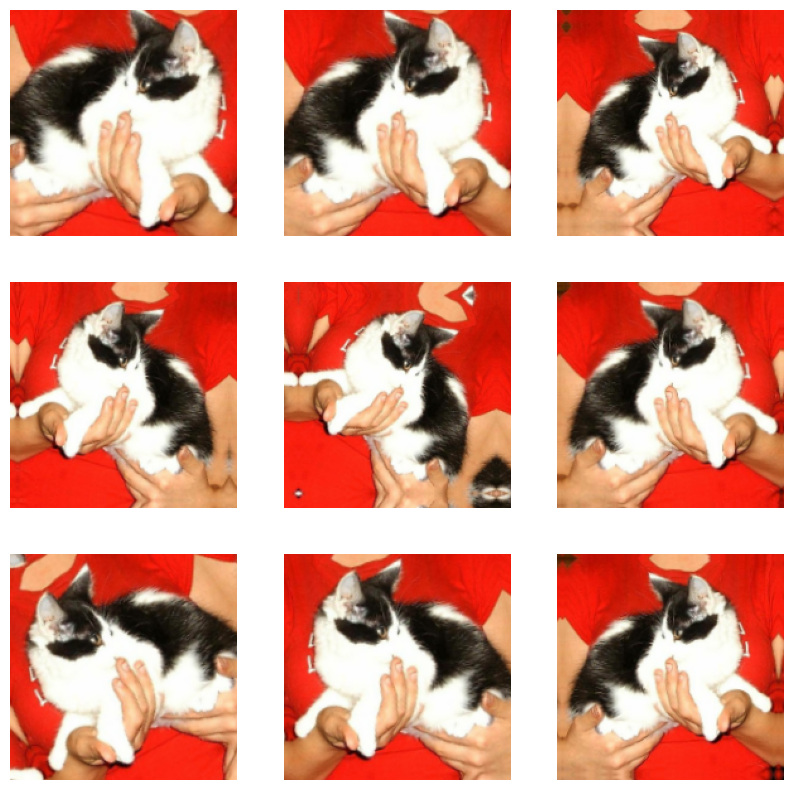

In [28]:
# Show the results
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [29]:
## Model2 add data_augmentation and dropout
inputs = keras.Input(shape = (180, 180, 3))
# Apply data augmentation
x = data_augmentation(inputs)
# Rescale the image data
x = layers.Rescaling(1./255)(inputs)
# CNN structure
x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)
# Model Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [30]:
# Training the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation.keras_',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100


2023-12-10 16:24:11.046462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.5030

2023-12-10 16:24:15.299992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 6s 82ms/step - loss: 0.8578 - accuracy: 0.5030 - val_loss: 0.6919 - val_accuracy: 0.5070
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.5215INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 77ms/step - loss: 0.6960 - accuracy: 0.5215 - val_loss: 0.6811 - val_accuracy: 0.5140
Epoch 3/100
63/63 [==============================] - 4s 67ms/step - loss: 0.6871 - accuracy: 0.5720 - val_loss: 0.7289 - val_accuracy: 0.5110
Epoch 4/100
62/63 [============================>.] - ETA: 0s - loss: 0.6532 - accuracy: 0.6164INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.6528 - accuracy: 0.6175 - val_loss: 0.6759 - val_accuracy: 0.6050
Epoch 5/100
62/63 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.6633INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 76ms/step - loss: 0.6195 - accuracy: 0.6645 - val_loss: 0.5973 - val_accuracy: 0.6760
Epoch 6/100
62/63 [============================>.] - ETA: 0s - loss: 0.5941 - accuracy: 0.6875INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.5972 - accuracy: 0.6855 - val_loss: 0.5881 - val_accuracy: 0.6810
Epoch 7/100
63/63 [==============================] - 4s 67ms/step - loss: 0.5688 - accuracy: 0.7110 - val_loss: 0.6048 - val_accuracy: 0.6650
Epoch 8/100
63/63 [==============================] - 4s 67ms/step - loss: 0.5446 - accuracy: 0.7230 - val_loss: 0.5914 - val_accuracy: 0.6830
Epoch 9/100
62/63 [============================>.] - ETA: 0s - loss: 0.5007 - accuracy: 0.7480INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.4998 - accuracy: 0.7485 - val_loss: 0.5879 - val_accuracy: 0.6900
Epoch 10/100
62/63 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.7767INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 78ms/step - loss: 0.4776 - accuracy: 0.7770 - val_loss: 0.5759 - val_accuracy: 0.7080
Epoch 11/100
63/63 [==============================] - 4s 68ms/step - loss: 0.4242 - accuracy: 0.8010 - val_loss: 0.6581 - val_accuracy: 0.6840
Epoch 12/100
63/63 [==============================] - 4s 68ms/step - loss: 0.3937 - accuracy: 0.8240 - val_loss: 0.6926 - val_accuracy: 0.7060
Epoch 13/100
63/63 [==============================] - 4s 67ms/step - loss: 0.3547 - accuracy: 0.8455 - val_loss: 0.6131 - val_accuracy: 0.7150
Epoch 14/100
63/63 [==============================] - 4s 67ms/step - loss: 0.3084 - accuracy: 0.8655 - val_loss: 0.7132 - val_accuracy: 0.7410
Epoch 15/100
63/63 [==============================] - 4s 69ms/step - loss: 0.2772 - accuracy: 0.8800 - val_loss: 0.6882 - val_accuracy: 0.7480
Epoch 16/100
63/63 [==============================] - 4s 66ms/step - loss: 0.2225 - accuracy: 0.9100 - val_loss: 0.6780 - val_accuracy: 0.7210
Epoch 17/100

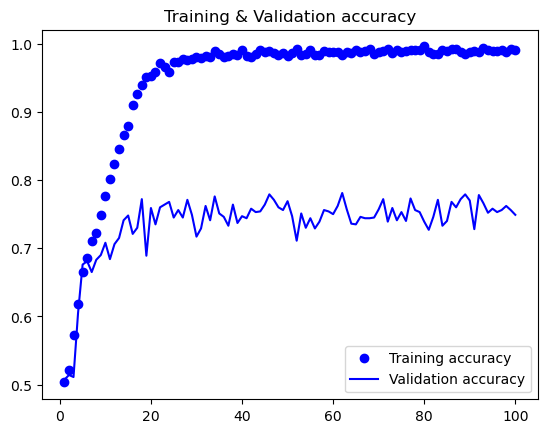

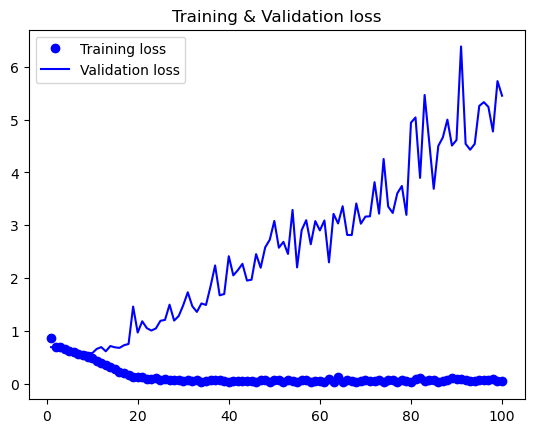

<Figure size 640x480 with 0 Axes>

In [31]:

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();

## Feature extraction

In [32]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
print(conv_base.summary())

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

### The convnet base and the classifier are two different models

* Fast and low-cost but data augmentation can't be applied.

In [34]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        feature = conv_base.predict(preprocessed_images)
        all_features.append(feature)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

2023-12-11 20:41:58.588609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 126ms/step


2023-12-11 20:42:09.876862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


In [35]:
# Extracted features
train_features.shape

(2000, 5, 5, 512)

In [37]:
# Create classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras_",
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20


2023-12-11 20:52:36.895428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 14.5872 - accuracy: 0.9265

2023-12-11 20:52:38.272581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


63/63 [==============================] - 2s 27ms/step - loss: 14.5872 - accuracy: 0.9265 - val_loss: 4.6827 - val_accuracy: 0.9670
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 3.7149 - accuracy: 0.9750 - val_loss: 7.2528 - val_accuracy: 0.9640
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 3.6923 - accuracy: 0.9760 - val_loss: 6.1361 - val_accuracy: 0.9630
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 1.7485 - accuracy: 0.9885INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


63/63 [==============================] - 2s 26ms/step - loss: 1.7485 - accuracy: 0.9885 - val_loss: 3.6233 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.9950 - val_loss: 5.2486 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.9399 - accuracy: 0.9895 - val_loss: 4.4526 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.4863 - accuracy: 0.9950 - val_loss: 4.6432 - val_accuracy: 0.9690
Epoch 8/20
63/63 [==============================] - 1s 15ms/step - loss: 0.5997 - accuracy: 0.9950 - val_loss: 4.4646 - val_accuracy: 0.9740
Epoch 9/20
63/63 [==============================] - 1s 14ms/step - loss: 0.4613 - accuracy: 0.9955 - val_loss: 4.1264 - val_accuracy: 0.9780
Epoch 10/20
63/63 [==============================] - 1s 16ms/step - loss: 0.5726 - accuracy: 0.9950 - val_loss: 3.7114 - val_accuracy: 0.9750
Epoch 11/20
60/63 [====

INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


63/63 [==============================] - 1s 18ms/step - loss: 0.1440 - accuracy: 0.9970 - val_loss: 3.6023 - val_accuracy: 0.9830
Epoch 12/20
59/63 [===========================>..] - ETA: 0s - loss: 0.2763 - accuracy: 0.9984INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


63/63 [==============================] - 1s 18ms/step - loss: 0.2608 - accuracy: 0.9985 - val_loss: 3.4790 - val_accuracy: 0.9790
Epoch 13/20
59/63 [===========================>..] - ETA: 0s - loss: 0.3912 - accuracy: 0.9963INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction.keras_/assets


63/63 [==============================] - 1s 19ms/step - loss: 0.3693 - accuracy: 0.9965 - val_loss: 3.3720 - val_accuracy: 0.9770
Epoch 14/20
63/63 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.3720 - val_accuracy: 0.9770
Epoch 15/20
63/63 [==============================] - 1s 15ms/step - loss: 0.0110 - accuracy: 0.9990 - val_loss: 3.9384 - val_accuracy: 0.9750
Epoch 16/20
63/63 [==============================] - 1s 15ms/step - loss: 0.0876 - accuracy: 0.9975 - val_loss: 4.4726 - val_accuracy: 0.9740
Epoch 17/20
63/63 [==============================] - 1s 14ms/step - loss: 0.1399 - accuracy: 0.9985 - val_loss: 4.2517 - val_accuracy: 0.9740
Epoch 18/20
63/63 [==============================] - 1s 17ms/step - loss: 0.1557 - accuracy: 0.9990 - val_loss: 4.5766 - val_accuracy: 0.9760
Epoch 19/20
63/63 [==============================] - 1s 17ms/step - loss: 2.0439e-06 - accuracy: 1.0000 - val_loss: 4.2816 - val_accuracy: 0.9780
Epoch 20/2

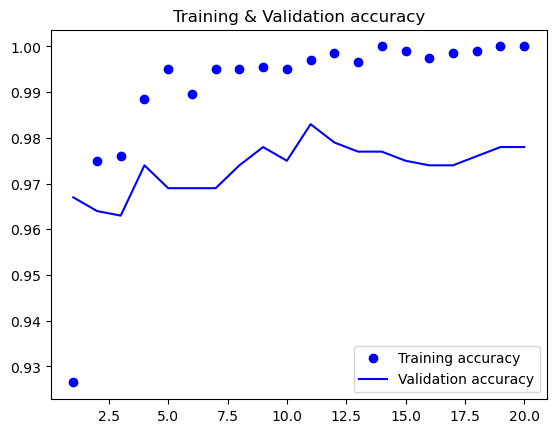

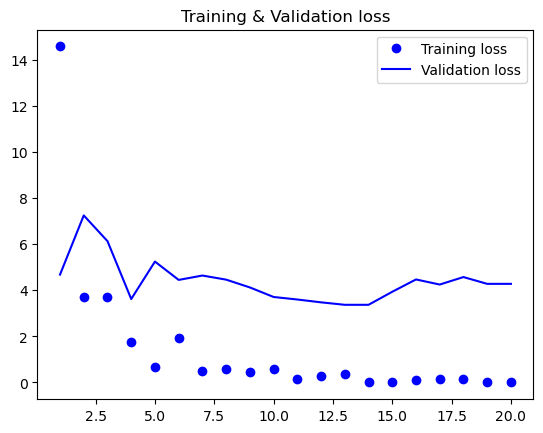

<Figure size 640x480 with 0 Axes>

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();

### Add a dense layer to the convnet base

* Higher cost comparing to the first method but data augmentation can't be applied.=

In [40]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
)
# Set trainable as False to 'frozen' the model updating weights
conv_base.trainable = False

In [41]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(.1),
        keras.layers.RandomZoom(.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_data_augmentation.keras_',
        save_best_only=True,
        monitor='val_loss'
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50


2023-12-11 21:32:10.406848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 21:32:10.591328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 1:25 - loss: 14.3394 - accuracy: 0.4375

2023-12-11 21:32:11.411468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 122.9352 - accuracy: 0.5729

2023-12-11 21:32:11.640904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:11.834410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 11s - loss: 98.2596 - accuracy: 0.6250 

2023-12-11 21:32:12.023745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:12.208331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 11s - loss: 74.9210 - accuracy: 0.7009

2023-12-11 21:32:12.398178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:12.591086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 10s - loss: 58.8441 - accuracy: 0.7535

2023-12-11 21:32:12.787770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:12.969949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 10s - loss: 52.6911 - accuracy: 0.7585

2023-12-11 21:32:13.153702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:13.350365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 9s - loss: 46.0254 - accuracy: 0.7837

2023-12-11 21:32:13.546874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:13.728093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 9s - loss: 41.4118 - accuracy: 0.8021

2023-12-11 21:32:13.933229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 9s - loss: 39.2718 - accuracy: 0.8105

2023-12-11 21:32:14.139434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:14.322627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 35.7127 - accuracy: 0.8212

2023-12-11 21:32:14.501202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:14.683912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 8s - loss: 32.5086 - accuracy: 0.8344

2023-12-11 21:32:14.863301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:15.047222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 8s - loss: 30.9606 - accuracy: 0.8423

2023-12-11 21:32:15.223950: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 7s - loss: 29.2153 - accuracy: 0.8478

2023-12-11 21:32:15.444372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:15.644238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 7s - loss: 27.1879 - accuracy: 0.8575

2023-12-11 21:32:15.826664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:16.006063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 6s - loss: 26.4205 - accuracy: 0.8600

2023-12-11 21:32:16.185750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:16.368920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 6s - loss: 24.6663 - accuracy: 0.8675

2023-12-11 21:32:16.549408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:16.728025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 23.7018 - accuracy: 0.8700

2023-12-11 21:32:16.905526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:17.082796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 5s - loss: 22.5331 - accuracy: 0.8741

2023-12-11 21:32:17.260627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:17.440553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 21.5354 - accuracy: 0.8777

2023-12-11 21:32:17.617756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:17.809479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 4s - loss: 20.5755 - accuracy: 0.8826

2023-12-11 21:32:18.001991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:18.183639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 4s - loss: 19.5204 - accuracy: 0.8886

2023-12-11 21:32:18.362706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:18.540583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 19.0425 - accuracy: 0.8910

2023-12-11 21:32:18.718412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:18.901646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 18.3528 - accuracy: 0.8939

2023-12-11 21:32:19.094458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:19.275343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 17.6732 - accuracy: 0.8958

2023-12-11 21:32:19.452995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:19.630548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 17.4466 - accuracy: 0.8956

2023-12-11 21:32:19.806237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:19.986716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 16.8139 - accuracy: 0.8992

2023-12-11 21:32:20.165125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:20.338840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 16.4509 - accuracy: 0.9001

2023-12-11 21:32:20.513596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:20.704464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 16.6037 - accuracy: 0.8992

2023-12-11 21:32:20.891585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:21.068030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 16.6935 - accuracy: 0.9000

2023-12-11 21:32:21.243280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:21.418398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 16.6140 - accuracy: 0.9008

2023-12-11 21:32:21.608269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:21.797041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 16.6756 - accuracy: 0.8988

2023-12-11 21:32:21.971237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:22.144249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 16.3317 - accuracy: 0.9001

2023-12-11 21:32:22.316932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:22.493082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 16.2667 - accuracy: 0.8997

2023-12-11 21:32:22.665630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 16.4328 - accuracy: 0.8995

2023-12-11 21:32:22.997672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 19s 290ms/step - loss: 16.4328 - accuracy: 0.8995 - val_loss: 6.5241 - val_accuracy: 0.9610
Epoch 2/50


2023-12-11 21:32:29.415288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 5.6736 - accuracy: 0.9219

2023-12-11 21:32:29.687856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:29.869944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 6.0744 - accuracy: 0.9297

2023-12-11 21:32:30.047381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:30.224295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 8.6264 - accuracy: 0.9219

2023-12-11 21:32:30.402313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:30.580681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 7.1529 - accuracy: 0.9336 

2023-12-11 21:32:30.763070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:30.940000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 6.9088 - accuracy: 0.9344

2023-12-11 21:32:31.117889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:31.300093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 7.3138 - accuracy: 0.9349

2023-12-11 21:32:31.478639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:31.657932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 8.3907 - accuracy: 0.9375

2023-12-11 21:32:31.856531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:32.034094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 7.5286 - accuracy: 0.9434

2023-12-11 21:32:32.212167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:32.388406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 6.7424 - accuracy: 0.9462

2023-12-11 21:32:32.570647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:32.747993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 7.3107 - accuracy: 0.9453

2023-12-11 21:32:32.924965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:33.105119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 7.0146 - accuracy: 0.9446

2023-12-11 21:32:33.285456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:33.464568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 6.7586 - accuracy: 0.9453

2023-12-11 21:32:33.658564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:33.846991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 6.3295 - accuracy: 0.9483

2023-12-11 21:32:34.024301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:34.225066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 6.4244 - accuracy: 0.9487

2023-12-11 21:32:34.404143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:34.583276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 6.3569 - accuracy: 0.9490

2023-12-11 21:32:34.761415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:34.937382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 6.2452 - accuracy: 0.9492

2023-12-11 21:32:35.112243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:35.287594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 6.0120 - accuracy: 0.9504

2023-12-11 21:32:35.462803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:35.640122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 6.0528 - accuracy: 0.9505

2023-12-11 21:32:35.814256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:35.992983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 5.9309 - accuracy: 0.9523

2023-12-11 21:32:36.166775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:36.343191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 5.7060 - accuracy: 0.9539

2023-12-11 21:32:36.518350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:36.696423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 5.7627 - accuracy: 0.9531

2023-12-11 21:32:36.871962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:37.070791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 5.7537 - accuracy: 0.9545

2023-12-11 21:32:37.254156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:37.430586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 5.5680 - accuracy: 0.9558

2023-12-11 21:32:37.604591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:37.783104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 5.7782 - accuracy: 0.9531

2023-12-11 21:32:37.958970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:38.134291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 5.7871 - accuracy: 0.9531

2023-12-11 21:32:38.310779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:38.486679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 6.3041 - accuracy: 0.9513

2023-12-11 21:32:38.663588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:38.838304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 6.2242 - accuracy: 0.9520

2023-12-11 21:32:39.009762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:39.201308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 6.1226 - accuracy: 0.9509

2023-12-11 21:32:39.374267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:39.547764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 6.5609 - accuracy: 0.9483

2023-12-11 21:32:39.721390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:39.896039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 6.4687 - accuracy: 0.9495

2023-12-11 21:32:40.069481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:40.243738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 6.3460 - accuracy: 0.9501

2023-12-11 21:32:40.418306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:40.591364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 253ms/step - loss: 6.3515 - accuracy: 0.9495 - val_loss: 6.5431 - val_accuracy: 0.9580
Epoch 3/50


2023-12-11 21:32:45.386560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 7.8323 - accuracy: 0.9531 

2023-12-11 21:32:45.647662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:45.827237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 10.3199 - accuracy: 0.9453

2023-12-11 21:32:46.005285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:46.182051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 7.6051 - accuracy: 0.9531

2023-12-11 21:32:46.359075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:46.537608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 8.5318 - accuracy: 0.9453

2023-12-11 21:32:46.714502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:46.893437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 7.0509 - accuracy: 0.9500

2023-12-11 21:32:47.072497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:47.251096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 6.5365 - accuracy: 0.9505

2023-12-11 21:32:47.429292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:47.607843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 5.7902 - accuracy: 0.9554

2023-12-11 21:32:47.782707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:47.958728: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 5.5811 - accuracy: 0.9570

2023-12-11 21:32:48.133092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:48.311113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 5.3217 - accuracy: 0.9583

2023-12-11 21:32:48.486041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:48.661311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 5.0178 - accuracy: 0.9609

2023-12-11 21:32:48.838364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:49.014222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 5.5214 - accuracy: 0.9588

2023-12-11 21:32:49.195279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:49.373788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 5.5099 - accuracy: 0.9583

2023-12-11 21:32:49.549647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:49.728999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 5.1466 - accuracy: 0.9579

2023-12-11 21:32:49.905269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:50.081623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 4.7790 - accuracy: 0.9609

2023-12-11 21:32:50.258719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:50.433891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 4.7230 - accuracy: 0.9615

2023-12-11 21:32:50.609627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:50.789533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 4.7519 - accuracy: 0.9590

2023-12-11 21:32:50.963034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:51.140260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 4.9490 - accuracy: 0.9568

2023-12-11 21:32:51.315027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:51.492978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 5.7745 - accuracy: 0.9505

2023-12-11 21:32:51.666689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:51.844942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 5.5363 - accuracy: 0.9523

2023-12-11 21:32:52.020830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:52.200357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 5.2595 - accuracy: 0.9547

2023-12-11 21:32:52.375307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:52.552097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 5.7638 - accuracy: 0.9509

2023-12-11 21:32:52.733053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:52.912206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 5.5201 - accuracy: 0.9517

2023-12-11 21:32:53.088448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:53.263927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 5.2953 - accuracy: 0.9524

2023-12-11 21:32:53.440566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:53.628926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 5.2787 - accuracy: 0.9525

2023-12-11 21:32:53.805299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:53.981925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 5.4592 - accuracy: 0.9506

2023-12-11 21:32:54.156939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:54.333368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 5.5223 - accuracy: 0.9513

2023-12-11 21:32:54.509300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:54.685291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 5.3177 - accuracy: 0.9531

2023-12-11 21:32:54.859076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:55.032624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 5.2930 - accuracy: 0.9537

2023-12-11 21:32:55.205159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:55.380926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 5.2533 - accuracy: 0.9542

2023-12-11 21:32:55.554958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:55.727779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 5.1692 - accuracy: 0.9547

2023-12-11 21:32:55.902472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:56.077352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 5.3597 - accuracy: 0.9541

2023-12-11 21:32:56.253043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:32:56.426964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 5.3168 - accuracy: 0.9545INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 268ms/step - loss: 5.3168 - accuracy: 0.9545 - val_loss: 2.8917 - val_accuracy: 0.9770
Epoch 4/50


2023-12-11 21:33:02.292110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.9832 - accuracy: 0.9688

2023-12-11 21:33:02.557117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:02.745755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.6156 - accuracy: 0.9766

2023-12-11 21:33:02.922203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:03.099827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 4.3507 - accuracy: 0.9688

2023-12-11 21:33:03.274270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:03.450306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 3.3254 - accuracy: 0.9727 

2023-12-11 21:33:03.629193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:03.809614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 2.6603 - accuracy: 0.9781

2023-12-11 21:33:03.985525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:04.160915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 2.4041 - accuracy: 0.9740

2023-12-11 21:33:04.336813: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:04.515893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 3.5522 - accuracy: 0.9688

2023-12-11 21:33:04.693923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:04.870512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 3.6851 - accuracy: 0.9629

2023-12-11 21:33:05.046377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:05.224241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 3.6752 - accuracy: 0.9653

2023-12-11 21:33:05.399811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:05.578001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 3.3231 - accuracy: 0.9672

2023-12-11 21:33:05.753646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:05.930131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 3.0218 - accuracy: 0.9702

2023-12-11 21:33:06.107123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:06.288185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 3.5922 - accuracy: 0.9674

2023-12-11 21:33:06.464683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:06.640521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 3.7307 - accuracy: 0.9675

2023-12-11 21:33:06.813576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:06.997380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 3.7350 - accuracy: 0.9665

2023-12-11 21:33:07.173757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:07.348705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 3.4860 - accuracy: 0.9688

2023-12-11 21:33:07.525903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:07.703538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 3.7463 - accuracy: 0.9668

2023-12-11 21:33:07.879355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:08.054942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 3.9168 - accuracy: 0.9632

2023-12-11 21:33:08.230078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:08.408949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 3.8678 - accuracy: 0.9635

2023-12-11 21:33:08.585442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:08.762270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 4.2991 - accuracy: 0.9622

2023-12-11 21:33:08.938633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:09.117481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 4.1217 - accuracy: 0.9633

2023-12-11 21:33:09.293044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:09.468898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 3.9890 - accuracy: 0.9643

2023-12-11 21:33:09.647178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:09.846540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 4.0810 - accuracy: 0.9624

2023-12-11 21:33:10.024394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:10.205561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 3.9567 - accuracy: 0.9633

2023-12-11 21:33:10.380417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:10.557391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 3.9539 - accuracy: 0.9635

2023-12-11 21:33:10.734030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:10.911458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 3.8971 - accuracy: 0.9644

2023-12-11 21:33:11.087678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:11.264212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 4.0214 - accuracy: 0.9633

2023-12-11 21:33:11.441946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:11.619090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 3.9053 - accuracy: 0.9635

2023-12-11 21:33:11.793218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:11.967732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 4.2062 - accuracy: 0.9615

2023-12-11 21:33:12.140216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:12.314479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 4.1675 - accuracy: 0.9607

2023-12-11 21:33:12.488815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:12.665393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 4.2476 - accuracy: 0.9578

2023-12-11 21:33:12.838485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:13.014511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 4.2016 - accuracy: 0.9577

2023-12-11 21:33:13.189278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:13.362631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 4.1963 - accuracy: 0.9575 - val_loss: 2.9880 - val_accuracy: 0.9760
Epoch 5/50


2023-12-11 21:33:18.135980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 2.2997 - accuracy: 0.9688

2023-12-11 21:33:18.378872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:18.558351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.2668 - accuracy: 0.9766

2023-12-11 21:33:18.738678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:18.914545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.5163 - accuracy: 0.9740

2023-12-11 21:33:19.089308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:19.263685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.2640 - accuracy: 0.9727

2023-12-11 21:33:19.439977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:19.620026: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.0112 - accuracy: 0.9781

2023-12-11 21:33:19.796409: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:19.972969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.9870 - accuracy: 0.9792

2023-12-11 21:33:20.148349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:20.326970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.1858 - accuracy: 0.9777

2023-12-11 21:33:20.501249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:20.680635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.9780 - accuracy: 0.9727

2023-12-11 21:33:20.856338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:21.031661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 1.7650 - accuracy: 0.9740

2023-12-11 21:33:21.208799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:21.383713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 2.1606 - accuracy: 0.9750

2023-12-11 21:33:21.565018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:21.742874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 2.3992 - accuracy: 0.9730

2023-12-11 21:33:21.920514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:22.099305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 2.1993 - accuracy: 0.9753

2023-12-11 21:33:22.274707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:22.454762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 2.7441 - accuracy: 0.9724

2023-12-11 21:33:22.632130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:22.809179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 2.9763 - accuracy: 0.9710

2023-12-11 21:33:22.985349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:23.161222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 3.0861 - accuracy: 0.9677

2023-12-11 21:33:23.355274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:23.531297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 3.0787 - accuracy: 0.9678

2023-12-11 21:33:23.709615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:23.885480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 3.1216 - accuracy: 0.9669

2023-12-11 21:33:24.061539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:24.238467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 3.4515 - accuracy: 0.9644

2023-12-11 21:33:24.413754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:24.592648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 3.3653 - accuracy: 0.9638

2023-12-11 21:33:24.767076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:24.943544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 3.3541 - accuracy: 0.9625

2023-12-11 21:33:25.118167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:25.297183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 3.5650 - accuracy: 0.9621

2023-12-11 21:33:25.473394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:25.650339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 3.5239 - accuracy: 0.9631

2023-12-11 21:33:25.827446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:26.005170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 3.4938 - accuracy: 0.9620

2023-12-11 21:33:26.183642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:26.362944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 3.3482 - accuracy: 0.9635

2023-12-11 21:33:26.538106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:26.717237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 3.2445 - accuracy: 0.9644

2023-12-11 21:33:26.893104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:27.069016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 3.5599 - accuracy: 0.9627

2023-12-11 21:33:27.244840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:27.421935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 3.6172 - accuracy: 0.9630

2023-12-11 21:33:27.595518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:27.772255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 3.6622 - accuracy: 0.9621

2023-12-11 21:33:27.945292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:28.119610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 3.6650 - accuracy: 0.9628

2023-12-11 21:33:28.293445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:28.467469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 3.7211 - accuracy: 0.9625

2023-12-11 21:33:28.642040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:28.816980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 3.7653 - accuracy: 0.9617

2023-12-11 21:33:28.990268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:29.163811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 3.7357 - accuracy: 0.9615INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 268ms/step - loss: 3.7357 - accuracy: 0.9615 - val_loss: 2.3743 - val_accuracy: 0.9800
Epoch 6/50


2023-12-11 21:33:35.004494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 3.3205 - accuracy: 0.9688

2023-12-11 21:33:35.286756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:35.467287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 4.4287 - accuracy: 0.9688

2023-12-11 21:33:35.643470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:35.821397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 3.0557 - accuracy: 0.9688

2023-12-11 21:33:35.996160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:36.172330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 2.2918 - accuracy: 0.9766

2023-12-11 21:33:36.347863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:36.530822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 3.6779 - accuracy: 0.9656

2023-12-11 21:33:36.705863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:36.885233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 3.8248 - accuracy: 0.9661

2023-12-11 21:33:37.062364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:37.240345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 3.9472 - accuracy: 0.9621

2023-12-11 21:33:37.414794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:37.593635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 3.6750 - accuracy: 0.9629

2023-12-11 21:33:37.770416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:37.947471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 4.7252 - accuracy: 0.9531

2023-12-11 21:33:38.122966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:38.300224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 4.2527 - accuracy: 0.9578

2023-12-11 21:33:38.476000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:38.654913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 4.0203 - accuracy: 0.9602

2023-12-11 21:33:38.831031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:39.008279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 4.3412 - accuracy: 0.9570

2023-12-11 21:33:39.182766: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:39.358991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 4.1736 - accuracy: 0.9579

2023-12-11 21:33:39.532309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:39.729575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 4.1274 - accuracy: 0.9554

2023-12-11 21:33:39.908238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:40.084750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 3.9132 - accuracy: 0.9573

2023-12-11 21:33:40.260576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:40.437655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 3.8046 - accuracy: 0.9580

2023-12-11 21:33:40.613952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:40.791855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 3.7378 - accuracy: 0.9577

2023-12-11 21:33:40.966497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:41.146671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 3.5459 - accuracy: 0.9592

2023-12-11 21:33:41.322405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:41.500667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 3.4564 - accuracy: 0.9589

2023-12-11 21:33:41.676392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:41.854465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 3.4454 - accuracy: 0.9586

2023-12-11 21:33:42.031052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:42.217560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 3.2849 - accuracy: 0.9598

2023-12-11 21:33:42.394124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:42.570268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 3.3616 - accuracy: 0.9595

2023-12-11 21:33:42.745553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:42.923869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 3.4757 - accuracy: 0.9579

2023-12-11 21:33:43.098229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:43.277208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 3.3309 - accuracy: 0.9596

2023-12-11 21:33:43.453455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:43.632671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 3.2299 - accuracy: 0.9606

2023-12-11 21:33:43.808244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:43.985230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 3.2208 - accuracy: 0.9609

2023-12-11 21:33:44.161025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:44.339690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 3.1682 - accuracy: 0.9618

2023-12-11 21:33:44.513142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:44.692564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 3.1988 - accuracy: 0.9615

2023-12-11 21:33:44.867078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:45.040635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 3.2421 - accuracy: 0.9612

2023-12-11 21:33:45.213612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:45.388224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 3.1942 - accuracy: 0.9615

2023-12-11 21:33:45.561999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:45.734425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 3.0912 - accuracy: 0.9627

2023-12-11 21:33:45.907825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:46.081382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 3.0665 - accuracy: 0.9630 - val_loss: 2.5032 - val_accuracy: 0.9750
Epoch 7/50


2023-12-11 21:33:50.854792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 4.7753 - accuracy: 0.9531

2023-12-11 21:33:51.102857: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:51.285363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 2.3876 - accuracy: 0.9766

2023-12-11 21:33:51.464040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:51.642661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 2.4346 - accuracy: 0.9792

2023-12-11 21:33:51.818892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:51.999289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 2.7298 - accuracy: 0.9766 

2023-12-11 21:33:52.176338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:52.354526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 2.1838 - accuracy: 0.9812

2023-12-11 21:33:52.529201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:52.709928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 2.6599 - accuracy: 0.9766

2023-12-11 21:33:52.886048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:53.062446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 2.7715 - accuracy: 0.9732

2023-12-11 21:33:53.238691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:53.415463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 2.8260 - accuracy: 0.9727

2023-12-11 21:33:53.594717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:53.773991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 2.7774 - accuracy: 0.9705

2023-12-11 21:33:53.949600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:54.125731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 2.7749 - accuracy: 0.9703

2023-12-11 21:33:54.300392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:54.477606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 2.5226 - accuracy: 0.9730

2023-12-11 21:33:54.653837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:54.830470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 2.4587 - accuracy: 0.9727

2023-12-11 21:33:55.006029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:55.184702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 2.3290 - accuracy: 0.9724

2023-12-11 21:33:55.359832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:55.536543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 2.3650 - accuracy: 0.9721

2023-12-11 21:33:55.713910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:55.892288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 2.3061 - accuracy: 0.9719

2023-12-11 21:33:56.069140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:56.245581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 2.2121 - accuracy: 0.9727

2023-12-11 21:33:56.421523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:56.598588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 2.2370 - accuracy: 0.9724

2023-12-11 21:33:56.774963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:56.951526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 2.3961 - accuracy: 0.9714

2023-12-11 21:33:57.128057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:57.305024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 2.4009 - accuracy: 0.9712

2023-12-11 21:33:57.480716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:57.658344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 2.3901 - accuracy: 0.9703

2023-12-11 21:33:57.832006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:58.010612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 2.2820 - accuracy: 0.9710

2023-12-11 21:33:58.185644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:58.363582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 2.1782 - accuracy: 0.9723

2023-12-11 21:33:58.539375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:58.716595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 2.0835 - accuracy: 0.9735

2023-12-11 21:33:58.894458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:59.072434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 2.1839 - accuracy: 0.9694

2023-12-11 21:33:59.246822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:59.424791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 2.1856 - accuracy: 0.9688

2023-12-11 21:33:59.601959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:33:59.783996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 2.2641 - accuracy: 0.9675

2023-12-11 21:33:59.960128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:00.136551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 2.3426 - accuracy: 0.9664

2023-12-11 21:34:00.310306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:00.486757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 2.5277 - accuracy: 0.9665

2023-12-11 21:34:00.660497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:00.835942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 2.5232 - accuracy: 0.9671

2023-12-11 21:34:01.011664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:01.186285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 2.4811 - accuracy: 0.9672

2023-12-11 21:34:01.359180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:01.534430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 2.5571 - accuracy: 0.9667

2023-12-11 21:34:01.709071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:01.883097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 2.5366 - accuracy: 0.9670INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 272ms/step - loss: 2.5366 - accuracy: 0.9670 - val_loss: 2.2123 - val_accuracy: 0.9790
Epoch 8/50


2023-12-11 21:34:07.957798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 3.6352 - accuracy: 0.9688    

2023-12-11 21:34:08.231757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:08.412350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 3.5174 - accuracy: 0.9688

2023-12-11 21:34:08.590899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:08.769913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 4.0517 - accuracy: 0.9479

2023-12-11 21:34:08.946097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:09.126370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 3.4329 - accuracy: 0.9531 

2023-12-11 21:34:09.306090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:09.483124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 2.7463 - accuracy: 0.9625

2023-12-11 21:34:09.659562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:09.837927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 2.5250 - accuracy: 0.9661

2023-12-11 21:34:10.015000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:10.192322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 2.7434 - accuracy: 0.9643

2023-12-11 21:34:10.368816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:10.545277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 3.0007 - accuracy: 0.9609

2023-12-11 21:34:10.720509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:10.900261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 2.8886 - accuracy: 0.9618

2023-12-11 21:34:11.077756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:11.254944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 2.7445 - accuracy: 0.9625

2023-12-11 21:34:11.430393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:11.608590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 2.6763 - accuracy: 0.9631

2023-12-11 21:34:11.786082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:11.966049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 2.4537 - accuracy: 0.9661

2023-12-11 21:34:12.142861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:12.320290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 2.4911 - accuracy: 0.9663

2023-12-11 21:34:12.496275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:12.674918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 2.6461 - accuracy: 0.9632

2023-12-11 21:34:12.854605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:13.032721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 2.4927 - accuracy: 0.9646

2023-12-11 21:34:13.210303: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:13.388350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 2.5030 - accuracy: 0.9648

2023-12-11 21:34:13.564638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:13.742108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 2.4802 - accuracy: 0.9642

2023-12-11 21:34:13.917419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:14.096021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 2.4924 - accuracy: 0.9635

2023-12-11 21:34:14.271022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:14.450230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 2.3612 - accuracy: 0.9655

2023-12-11 21:34:14.626821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:14.802512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 2.4167 - accuracy: 0.9648

2023-12-11 21:34:14.978621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:15.154078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 2.7793 - accuracy: 0.9628

2023-12-11 21:34:15.329375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:15.505596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 2.6530 - accuracy: 0.9645

2023-12-11 21:34:15.681849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:15.859673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 2.6243 - accuracy: 0.9647

2023-12-11 21:34:16.034780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:16.215065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 2.6048 - accuracy: 0.9655

2023-12-11 21:34:16.393310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:16.571345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 2.6800 - accuracy: 0.9644

2023-12-11 21:34:16.746141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:16.922777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 2.6205 - accuracy: 0.9651

2023-12-11 21:34:17.100919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:17.277762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 2.6014 - accuracy: 0.9635

2023-12-11 21:34:17.450222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:17.625251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 2.5691 - accuracy: 0.9637

2023-12-11 21:34:17.798061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:17.971226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 2.6443 - accuracy: 0.9628

2023-12-11 21:34:18.143785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:18.317794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 2.5892 - accuracy: 0.9630

2023-12-11 21:34:18.492194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:18.665054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 2.5572 - accuracy: 0.9637

2023-12-11 21:34:18.838380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:19.011098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 2.5367 - accuracy: 0.9640 - val_loss: 2.4972 - val_accuracy: 0.9730
Epoch 9/50


2023-12-11 21:34:23.778169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 1.9185 - accuracy: 0.9844    

2023-12-11 21:34:24.021946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:24.200238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.9593 - accuracy: 0.9922

2023-12-11 21:34:24.378233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:24.553497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.2781 - accuracy: 0.9792

2023-12-11 21:34:24.730994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:24.908419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.5427 - accuracy: 0.9766

2023-12-11 21:34:25.086824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:25.264890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.2341 - accuracy: 0.9812

2023-12-11 21:34:25.441487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:25.618670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.4292 - accuracy: 0.9792

2023-12-11 21:34:25.795069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:25.972343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.2250 - accuracy: 0.9821

2023-12-11 21:34:26.147982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:26.325659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.1920 - accuracy: 0.9805

2023-12-11 21:34:26.502299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:26.680842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 1.3709 - accuracy: 0.9774

2023-12-11 21:34:26.857407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:27.036537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 1.2770 - accuracy: 0.9781

2023-12-11 21:34:27.211483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:27.389227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 1.1609 - accuracy: 0.9801

2023-12-11 21:34:27.567273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:27.745875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.1930 - accuracy: 0.9805

2023-12-11 21:34:27.921602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:28.099040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 1.1544 - accuracy: 0.9808

2023-12-11 21:34:28.276724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:28.452662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 1.2113 - accuracy: 0.9799

2023-12-11 21:34:28.631340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:28.808738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 1.3192 - accuracy: 0.9781

2023-12-11 21:34:28.987062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:29.166776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 1.3339 - accuracy: 0.9785

2023-12-11 21:34:29.348501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:29.526763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.2554 - accuracy: 0.9798

2023-12-11 21:34:29.703483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:29.882396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 1.1902 - accuracy: 0.9800

2023-12-11 21:34:30.058530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:30.236693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 1.2087 - accuracy: 0.9803

2023-12-11 21:34:30.412765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:30.590449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 1.2788 - accuracy: 0.9797

2023-12-11 21:34:30.771335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:30.965578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 1.2605 - accuracy: 0.9799

2023-12-11 21:34:31.141902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:31.320106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 1.2042 - accuracy: 0.9801

2023-12-11 21:34:31.496782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:31.673831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 1.2396 - accuracy: 0.9789

2023-12-11 21:34:31.852966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:32.029490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 1.1880 - accuracy: 0.9798

2023-12-11 21:34:32.204331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:32.380486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 1.2099 - accuracy: 0.9794

2023-12-11 21:34:32.556591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:32.735052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 1.1633 - accuracy: 0.9802

2023-12-11 21:34:32.911493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:33.087428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 1.2240 - accuracy: 0.9792

2023-12-11 21:34:33.260385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:33.433805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 1.2310 - accuracy: 0.9794

2023-12-11 21:34:33.606971: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:33.780887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 1.2008 - accuracy: 0.9795

2023-12-11 21:34:33.954335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:34.129003: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 1.2905 - accuracy: 0.9786

2023-12-11 21:34:34.321846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:34.494902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 1.3754 - accuracy: 0.9778

2023-12-11 21:34:34.669635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:34.843227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 1.3644 - accuracy: 0.9780INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 268ms/step - loss: 1.3644 - accuracy: 0.9780 - val_loss: 2.0492 - val_accuracy: 0.9760
Epoch 10/50


2023-12-11 21:34:40.657874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 1.7413 - accuracy: 0.9531

2023-12-11 21:34:40.936271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:41.114939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.8707 - accuracy: 0.9766

2023-12-11 21:34:41.290475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:41.467094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 2.5935 - accuracy: 0.9688

2023-12-11 21:34:41.642502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:41.822613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.9451 - accuracy: 0.9766

2023-12-11 21:34:42.000973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:42.177765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.5561 - accuracy: 0.9812

2023-12-11 21:34:42.352281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:42.530302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.5201 - accuracy: 0.9818

2023-12-11 21:34:42.706006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:42.880901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.3031 - accuracy: 0.9844

2023-12-11 21:34:43.058321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:43.233810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.2549 - accuracy: 0.9824

2023-12-11 21:34:43.410113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:43.589690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 1.1379 - accuracy: 0.9826

2023-12-11 21:34:43.763719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:43.939628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 1.0461 - accuracy: 0.9828

2023-12-11 21:34:44.116324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:44.293688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.9510 - accuracy: 0.9844

2023-12-11 21:34:44.469019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:44.646408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.2272 - accuracy: 0.9792

2023-12-11 21:34:44.822834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:44.997411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 1.1360 - accuracy: 0.9796

2023-12-11 21:34:45.172605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:45.348228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 1.1368 - accuracy: 0.9799

2023-12-11 21:34:45.525506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:45.700868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 1.1701 - accuracy: 0.9792

2023-12-11 21:34:45.877163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:46.054853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 1.1469 - accuracy: 0.9795

2023-12-11 21:34:46.229448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:46.405540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.1842 - accuracy: 0.9789

2023-12-11 21:34:46.581524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:46.772435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 1.1232 - accuracy: 0.9792

2023-12-11 21:34:46.947354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:47.124587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 1.4478 - accuracy: 0.9770

2023-12-11 21:34:47.299123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:47.476640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 1.4130 - accuracy: 0.9773

2023-12-11 21:34:47.652848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:47.828852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 1.4369 - accuracy: 0.9769

2023-12-11 21:34:48.005392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:48.180432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 1.4531 - accuracy: 0.9766

2023-12-11 21:34:48.356864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:48.534007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 1.4177 - accuracy: 0.9762

2023-12-11 21:34:48.709947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:48.888187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 1.3586 - accuracy: 0.9772

2023-12-11 21:34:49.062768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:49.238398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 1.3362 - accuracy: 0.9775

2023-12-11 21:34:49.413635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:49.588796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 1.2848 - accuracy: 0.9784

2023-12-11 21:34:49.762410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:49.937868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 1.2887 - accuracy: 0.9780

2023-12-11 21:34:50.115948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:50.292714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 1.2587 - accuracy: 0.9782

2023-12-11 21:34:50.465469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:50.639753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 1.3073 - accuracy: 0.9774

2023-12-11 21:34:50.813407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:50.986715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 1.3212 - accuracy: 0.9771

2023-12-11 21:34:51.160467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:51.336242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 1.2829 - accuracy: 0.9768

2023-12-11 21:34:51.511424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:51.684080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 1.2726 - accuracy: 0.9770INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 267ms/step - loss: 1.2726 - accuracy: 0.9770 - val_loss: 1.3158 - val_accuracy: 0.9800
Epoch 11/50


2023-12-11 21:34:57.507272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.9364 - accuracy: 0.9688

2023-12-11 21:34:57.768471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:57.947608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1895 - accuracy: 0.9766

2023-12-11 21:34:58.128038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:58.304442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.7129 - accuracy: 0.9740

2023-12-11 21:34:58.480818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:58.659178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.8200 - accuracy: 0.9727

2023-12-11 21:34:58.837230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:59.016688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.9179 - accuracy: 0.9688

2023-12-11 21:34:59.195723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:59.373074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.8502 - accuracy: 0.9688

2023-12-11 21:34:59.547647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:34:59.730321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.5859 - accuracy: 0.9732

2023-12-11 21:34:59.905829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:00.082999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.3877 - accuracy: 0.9766

2023-12-11 21:35:00.260208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:00.438774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 1.2831 - accuracy: 0.9774

2023-12-11 21:35:00.614049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:00.792300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 1.3683 - accuracy: 0.9766

2023-12-11 21:35:00.966259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:01.143475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 1.2439 - accuracy: 0.9787

2023-12-11 21:35:01.319574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:01.495829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.1403 - accuracy: 0.9805

2023-12-11 21:35:01.672430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:01.848429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 1.0526 - accuracy: 0.9820

2023-12-11 21:35:02.022082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:02.199960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.9810 - accuracy: 0.9821

2023-12-11 21:35:02.376907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:02.553979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.9679 - accuracy: 0.9812

2023-12-11 21:35:02.732754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:02.927602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.9970 - accuracy: 0.9795

2023-12-11 21:35:03.102912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:03.278848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.0305 - accuracy: 0.9798

2023-12-11 21:35:03.455727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:03.632916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.9736 - accuracy: 0.9809

2023-12-11 21:35:03.808720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:03.986798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 1.2793 - accuracy: 0.9778

2023-12-11 21:35:04.161804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:04.339109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 1.3428 - accuracy: 0.9766

2023-12-11 21:35:04.514646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:04.691860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 1.3206 - accuracy: 0.9769

2023-12-11 21:35:04.866648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:05.044427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 1.3165 - accuracy: 0.9773

2023-12-11 21:35:05.221068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:05.396413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 1.2592 - accuracy: 0.9783

2023-12-11 21:35:05.571774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:05.748830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 1.2613 - accuracy: 0.9785

2023-12-11 21:35:05.926149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:06.117722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 1.3146 - accuracy: 0.9781

2023-12-11 21:35:06.293840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:06.472467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 1.2750 - accuracy: 0.9784

2023-12-11 21:35:06.648332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:06.823826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 1.2482 - accuracy: 0.9786

2023-12-11 21:35:06.996107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:07.170596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 1.2900 - accuracy: 0.9777

2023-12-11 21:35:07.343891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:07.519372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 1.2455 - accuracy: 0.9784

2023-12-11 21:35:07.693811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:07.867585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 1.3023 - accuracy: 0.9776

2023-12-11 21:35:08.041662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:08.216510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 1.2922 - accuracy: 0.9778

2023-12-11 21:35:08.389780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:08.563827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 1.2886 - accuracy: 0.9775 - val_loss: 2.0689 - val_accuracy: 0.9720
Epoch 12/50


2023-12-11 21:35:13.326639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0539 - accuracy: 0.9844

2023-12-11 21:35:13.566939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:13.747886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.5854 - accuracy: 0.9766

2023-12-11 21:35:13.928109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:14.105874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.2553 - accuracy: 0.9740

2023-12-11 21:35:14.280914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:14.458699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.2575 - accuracy: 0.9766

2023-12-11 21:35:14.636834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:14.813159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.4129 - accuracy: 0.9750

2023-12-11 21:35:14.990238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:15.168888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.2849 - accuracy: 0.9766

2023-12-11 21:35:15.345090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:15.523939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.1014 - accuracy: 0.9799

2023-12-11 21:35:15.701573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:15.879442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.1482 - accuracy: 0.9785

2023-12-11 21:35:16.056302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:16.234208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 1.0207 - accuracy: 0.9809

2023-12-11 21:35:16.412530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:16.589370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.9756 - accuracy: 0.9812

2023-12-11 21:35:16.764028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:16.942000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 1.0333 - accuracy: 0.9801

2023-12-11 21:35:17.118350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:17.296433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.1479 - accuracy: 0.9792

2023-12-11 21:35:17.472419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:17.646557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 1.2848 - accuracy: 0.9784

2023-12-11 21:35:17.824561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:18.001243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 1.1931 - accuracy: 0.9799

2023-12-11 21:35:18.179568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:18.355404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 1.1570 - accuracy: 0.9802

2023-12-11 21:35:18.533238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:18.710183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 1.1133 - accuracy: 0.9805

2023-12-11 21:35:18.888925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:19.065206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.0936 - accuracy: 0.9798

2023-12-11 21:35:19.240784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:19.420015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 1.2242 - accuracy: 0.9774

2023-12-11 21:35:19.598779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:19.777942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 1.1722 - accuracy: 0.9778

2023-12-11 21:35:19.953801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:20.131674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 1.2018 - accuracy: 0.9781

2023-12-11 21:35:20.309819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:20.488427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 1.1545 - accuracy: 0.9784

2023-12-11 21:35:20.664571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:20.841259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 1.1451 - accuracy: 0.9787

2023-12-11 21:35:21.018285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:21.199817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 1.1715 - accuracy: 0.9769

2023-12-11 21:35:21.374731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:21.552029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 1.2266 - accuracy: 0.9766

2023-12-11 21:35:21.731081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:21.908442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 1.2298 - accuracy: 0.9769

2023-12-11 21:35:22.083576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:22.262884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 1.1825 - accuracy: 0.9778

2023-12-11 21:35:22.439420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:22.616836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 1.1509 - accuracy: 0.9774

2023-12-11 21:35:22.790681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:22.964700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 1.1656 - accuracy: 0.9754

2023-12-11 21:35:23.139169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:23.312232: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 1.1254 - accuracy: 0.9763

2023-12-11 21:35:23.485589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:23.661329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 1.0879 - accuracy: 0.9771

2023-12-11 21:35:23.833800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:24.007738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 1.1232 - accuracy: 0.9763

2023-12-11 21:35:24.180897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:24.354335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 1.1142 - accuracy: 0.9765 - val_loss: 1.6092 - val_accuracy: 0.9760
Epoch 13/50


2023-12-11 21:35:29.148445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.9542 - accuracy: 0.9531

2023-12-11 21:35:29.388422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:29.573674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.4771 - accuracy: 0.9766

2023-12-11 21:35:29.752779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:29.930670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.4404 - accuracy: 0.9792

2023-12-11 21:35:30.106836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:30.284610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.3303 - accuracy: 0.9844 

2023-12-11 21:35:30.460286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:30.636300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4298 - accuracy: 0.9844

2023-12-11 21:35:30.811717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:30.989161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3582 - accuracy: 0.9870

2023-12-11 21:35:31.164789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:31.342835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3070 - accuracy: 0.9888

2023-12-11 21:35:31.516530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:31.695330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3986 - accuracy: 0.9863

2023-12-11 21:35:31.870907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:32.046170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.3544 - accuracy: 0.9878

2023-12-11 21:35:32.222123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:32.398596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3189 - accuracy: 0.9891

2023-12-11 21:35:32.576296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:32.751748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2899 - accuracy: 0.9901

2023-12-11 21:35:32.929298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:33.105988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.5124 - accuracy: 0.9831

2023-12-11 21:35:33.282342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:33.459189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.4730 - accuracy: 0.9844

2023-12-11 21:35:33.637951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:33.816034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.5349 - accuracy: 0.9821

2023-12-11 21:35:33.992220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:34.168569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.5095 - accuracy: 0.9823

2023-12-11 21:35:34.344330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:34.524371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5109 - accuracy: 0.9824

2023-12-11 21:35:34.701272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:34.884478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.4917 - accuracy: 0.9825

2023-12-11 21:35:35.060245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:35.240543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.4731 - accuracy: 0.9818

2023-12-11 21:35:35.416212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:35.592262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.5125 - accuracy: 0.9819

2023-12-11 21:35:35.766985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:35.943707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.6151 - accuracy: 0.9820

2023-12-11 21:35:36.120712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:36.297668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.6499 - accuracy: 0.9821

2023-12-11 21:35:36.474234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:36.650000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.6204 - accuracy: 0.9830

2023-12-11 21:35:36.837543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:37.033360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.6855 - accuracy: 0.9830

2023-12-11 21:35:37.211526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:37.387077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.6847 - accuracy: 0.9831

2023-12-11 21:35:37.571655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:37.768951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.6573 - accuracy: 0.9837

2023-12-11 21:35:37.945324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:38.120659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.6372 - accuracy: 0.9838

2023-12-11 21:35:38.301116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:38.494442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.6332 - accuracy: 0.9838

2023-12-11 21:35:38.672696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:38.853105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.6106 - accuracy: 0.9844

2023-12-11 21:35:39.028046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:39.212960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.5895 - accuracy: 0.9849

2023-12-11 21:35:39.404172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:39.581264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.5774 - accuracy: 0.9849

2023-12-11 21:35:39.759157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:39.932967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.9849

2023-12-11 21:35:40.104298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:40.276127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 255ms/step - loss: 0.5558 - accuracy: 0.9850 - val_loss: 2.0693 - val_accuracy: 0.9740
Epoch 14/50


2023-12-11 21:35:45.176970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 1.2357 - accuracy: 0.9844    

2023-12-11 21:35:45.421665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:45.599296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1022 - accuracy: 0.9844

2023-12-11 21:35:45.774216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:45.950603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.7348 - accuracy: 0.9896

2023-12-11 21:35:46.125117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:46.299153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.6482 - accuracy: 0.9805

2023-12-11 21:35:46.473863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:46.650078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.4593 - accuracy: 0.9781

2023-12-11 21:35:46.826609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:47.002341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 1.3005 - accuracy: 0.9792

2023-12-11 21:35:47.178485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:47.355480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.1869 - accuracy: 0.9799

2023-12-11 21:35:47.529700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:47.704801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.0385 - accuracy: 0.9824

2023-12-11 21:35:47.879601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:48.056161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.9905 - accuracy: 0.9792

2023-12-11 21:35:48.230569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:48.407517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.9741 - accuracy: 0.9797

2023-12-11 21:35:48.584897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:48.764313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.9279 - accuracy: 0.9801

2023-12-11 21:35:48.939449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:49.115570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.8559 - accuracy: 0.9805

2023-12-11 21:35:49.290264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:49.464260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.8763 - accuracy: 0.9808

2023-12-11 21:35:49.640748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:49.820155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.9346 - accuracy: 0.9788

2023-12-11 21:35:50.000714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:50.181622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 1.1375 - accuracy: 0.9760

2023-12-11 21:35:50.380345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:50.579762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 1.1581 - accuracy: 0.9756

2023-12-11 21:35:50.760308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:50.939428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.1015 - accuracy: 0.9761

2023-12-11 21:35:51.121680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:51.304304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 1.0483 - accuracy: 0.9766

2023-12-11 21:35:51.481475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:51.660979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.9994 - accuracy: 0.9770

2023-12-11 21:35:51.840910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:52.020900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.9494 - accuracy: 0.9781

2023-12-11 21:35:52.196634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:52.375162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.9160 - accuracy: 0.9784

2023-12-11 21:35:52.552825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:52.731960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.8744 - accuracy: 0.9794

2023-12-11 21:35:52.912620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:53.091295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.8364 - accuracy: 0.9803

2023-12-11 21:35:53.272029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:53.452884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.8015 - accuracy: 0.9811

2023-12-11 21:35:53.656306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:53.831647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.7829 - accuracy: 0.9812

2023-12-11 21:35:54.005391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:54.179985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.8164 - accuracy: 0.9814

2023-12-11 21:35:54.356601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:54.539791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.8010 - accuracy: 0.9815

2023-12-11 21:35:54.725075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:54.905363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.8226 - accuracy: 0.9810

2023-12-11 21:35:55.081719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:55.253747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.7943 - accuracy: 0.9817

2023-12-11 21:35:55.427776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:55.605751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.8818 - accuracy: 0.9807

2023-12-11 21:35:55.777941: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:55.953873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.8533 - accuracy: 0.9814

2023-12-11 21:35:56.127067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:35:56.299129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 253ms/step - loss: 0.8465 - accuracy: 0.9815 - val_loss: 1.5374 - val_accuracy: 0.9750
Epoch 15/50


2023-12-11 21:36:01.084746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 1.3047 - accuracy: 0.9688

2023-12-11 21:36:01.359085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:01.544726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 2.1959 - accuracy: 0.9531

2023-12-11 21:36:01.726196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:01.902691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.5318 - accuracy: 0.9635

2023-12-11 21:36:02.076337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:02.253155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.4059 - accuracy: 0.9688

2023-12-11 21:36:02.427970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:02.604721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.4345 - accuracy: 0.9656

2023-12-11 21:36:02.780198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:02.956920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.3040 - accuracy: 0.9688

2023-12-11 21:36:03.131091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:03.304993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.2604 - accuracy: 0.9665

2023-12-11 21:36:03.480692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:03.653759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.4737 - accuracy: 0.9668

2023-12-11 21:36:03.832012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:04.007578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 1.7502 - accuracy: 0.9653

2023-12-11 21:36:04.182078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:04.357240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 1.5751 - accuracy: 0.9688

2023-12-11 21:36:04.532146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:04.707266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 1.6480 - accuracy: 0.9688

2023-12-11 21:36:04.883017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:05.058625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.5222 - accuracy: 0.9701

2023-12-11 21:36:05.233425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:05.407058: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 1.4271 - accuracy: 0.9712

2023-12-11 21:36:05.582088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:05.757361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 1.3810 - accuracy: 0.9710

2023-12-11 21:36:05.930689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:06.104727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 1.3880 - accuracy: 0.9698

2023-12-11 21:36:06.279207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:06.453367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 1.3582 - accuracy: 0.9707

2023-12-11 21:36:06.627069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:06.804014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 1.2957 - accuracy: 0.9715

2023-12-11 21:36:06.977482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:07.152647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 1.2238 - accuracy: 0.9731

2023-12-11 21:36:07.326116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:07.500707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 1.1956 - accuracy: 0.9737

2023-12-11 21:36:07.675036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:07.849157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 1.1766 - accuracy: 0.9742

2023-12-11 21:36:08.024494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:08.200819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 1.1237 - accuracy: 0.9747

2023-12-11 21:36:08.374889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:08.564162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 1.2024 - accuracy: 0.9737

2023-12-11 21:36:08.736701: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:08.915601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 1.1501 - accuracy: 0.9749

2023-12-11 21:36:09.096251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:09.272514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 1.1221 - accuracy: 0.9753

2023-12-11 21:36:09.445170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:09.619060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 1.1016 - accuracy: 0.9756

2023-12-11 21:36:09.793063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:09.970082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 1.1031 - accuracy: 0.9754

2023-12-11 21:36:10.143837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:10.317975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 1.0797 - accuracy: 0.9757

2023-12-11 21:36:10.489357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:10.661298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 1.0411 - accuracy: 0.9766

2023-12-11 21:36:10.833256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:11.006340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 1.0062 - accuracy: 0.9763

2023-12-11 21:36:11.180662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:11.359477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 1.0197 - accuracy: 0.9760

2023-12-11 21:36:11.531477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:11.703187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.9945 - accuracy: 0.9758

2023-12-11 21:36:11.877989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:12.050366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.9900 - accuracy: 0.9755INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 269ms/step - loss: 0.9900 - accuracy: 0.9755 - val_loss: 1.2308 - val_accuracy: 0.9770
Epoch 16/50


2023-12-11 21:36:18.062239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 1.8521 - accuracy: 0.9688

2023-12-11 21:36:18.331245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:18.515497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.8376 - accuracy: 0.9688

2023-12-11 21:36:18.690636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:18.864219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.5051 - accuracy: 0.9688

2023-12-11 21:36:19.043863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:19.217790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.1449 - accuracy: 0.9727

2023-12-11 21:36:19.393373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:19.570615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.3067 - accuracy: 0.9750

2023-12-11 21:36:19.745092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:19.921214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 1.6789 - accuracy: 0.9740

2023-12-11 21:36:20.096661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:20.273350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.4393 - accuracy: 0.9777

2023-12-11 21:36:20.446967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:20.634424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.2643 - accuracy: 0.9785

2023-12-11 21:36:20.808659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:20.983656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 1.1238 - accuracy: 0.9809

2023-12-11 21:36:21.159698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:21.341855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 1.0538 - accuracy: 0.9812

2023-12-11 21:36:21.516228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:21.691361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 1.1331 - accuracy: 0.9801

2023-12-11 21:36:21.865954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:22.039674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 1.0387 - accuracy: 0.9818

2023-12-11 21:36:22.214123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:22.389225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.9918 - accuracy: 0.9820

2023-12-11 21:36:22.563266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:22.745733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.9210 - accuracy: 0.9833

2023-12-11 21:36:22.928538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:23.103871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.8790 - accuracy: 0.9833

2023-12-11 21:36:23.278415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:23.455696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.8958 - accuracy: 0.9814

2023-12-11 21:36:23.631810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:23.806543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.8500 - accuracy: 0.9816

2023-12-11 21:36:23.981277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:24.158356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.8028 - accuracy: 0.9826

2023-12-11 21:36:24.332434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:24.508022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.7944 - accuracy: 0.9811

2023-12-11 21:36:24.683045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:24.858990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.7646 - accuracy: 0.9812

2023-12-11 21:36:25.032741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:25.206336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.7282 - accuracy: 0.9821

2023-12-11 21:36:25.380814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:25.556920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.7295 - accuracy: 0.9801

2023-12-11 21:36:25.730153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:25.909371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.7040 - accuracy: 0.9803

2023-12-11 21:36:26.105307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:26.283142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.6747 - accuracy: 0.9811

2023-12-11 21:36:26.458924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:26.636382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.6477 - accuracy: 0.9819

2023-12-11 21:36:26.809933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:26.987867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.6284 - accuracy: 0.9820

2023-12-11 21:36:27.163425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:27.337899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.6536 - accuracy: 0.9809

2023-12-11 21:36:27.509430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:27.687250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.6303 - accuracy: 0.9816

2023-12-11 21:36:27.859068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:28.032188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.6640 - accuracy: 0.9811

2023-12-11 21:36:28.204103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:28.376658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.7096 - accuracy: 0.9807

2023-12-11 21:36:28.553748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:28.725704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.7011 - accuracy: 0.9808

2023-12-11 21:36:28.898290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:29.070887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.6955 - accuracy: 0.9810 - val_loss: 1.5387 - val_accuracy: 0.9710
Epoch 17/50


2023-12-11 21:36:33.846371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 1.4390 - accuracy: 0.9531    

2023-12-11 21:36:34.109796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:34.288793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1857 - accuracy: 0.9688

2023-12-11 21:36:34.479967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:34.662572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.4322 - accuracy: 0.9583

2023-12-11 21:36:34.847312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:35.032301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 10s - loss: 1.7473 - accuracy: 0.9570

2023-12-11 21:36:35.216855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:35.401514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.5416 - accuracy: 0.9625

2023-12-11 21:36:35.583876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:35.769588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.2846 - accuracy: 0.9688

2023-12-11 21:36:35.948382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:36.125287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.1072 - accuracy: 0.9710

2023-12-11 21:36:36.298675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:36.473533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.9688 - accuracy: 0.9746

2023-12-11 21:36:36.646637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:36.833151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.8611 - accuracy: 0.9774

2023-12-11 21:36:37.007076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:37.187216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.7750 - accuracy: 0.9797

2023-12-11 21:36:37.365161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:37.544983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.8504 - accuracy: 0.9773

2023-12-11 21:36:37.725181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:37.904214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.7796 - accuracy: 0.9792

2023-12-11 21:36:38.079934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:38.260415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.7197 - accuracy: 0.9808

2023-12-11 21:36:38.433873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:38.610714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.6687 - accuracy: 0.9821

2023-12-11 21:36:38.785383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:38.960104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.6241 - accuracy: 0.9833

2023-12-11 21:36:39.134216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:39.310922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5851 - accuracy: 0.9844

2023-12-11 21:36:39.484598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:39.661140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.6611 - accuracy: 0.9835

2023-12-11 21:36:39.842614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:40.039542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.6671 - accuracy: 0.9835

2023-12-11 21:36:40.215167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:40.391432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.6863 - accuracy: 0.9827

2023-12-11 21:36:40.565220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:40.741057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.6522 - accuracy: 0.9836

2023-12-11 21:36:40.917082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:41.091877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.6276 - accuracy: 0.9836

2023-12-11 21:36:41.264917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:41.443018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.5997 - accuracy: 0.9837

2023-12-11 21:36:41.617222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:41.793038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.6684 - accuracy: 0.9823

2023-12-11 21:36:41.967934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:42.144595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.7401 - accuracy: 0.9805

2023-12-11 21:36:42.318750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:42.494297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.7105 - accuracy: 0.9812

2023-12-11 21:36:42.666669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:42.844884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.7053 - accuracy: 0.9814

2023-12-11 21:36:43.019330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:43.194288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.7068 - accuracy: 0.9803

2023-12-11 21:36:43.365300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:43.539349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.6940 - accuracy: 0.9799

2023-12-11 21:36:43.711171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:43.883302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.6703 - accuracy: 0.9806

2023-12-11 21:36:44.054118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:44.226002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.7144 - accuracy: 0.9797

2023-12-11 21:36:44.398302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:44.578631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.7215 - accuracy: 0.9798

2023-12-11 21:36:44.749980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:44.932143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.9800INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 267ms/step - loss: 0.7157 - accuracy: 0.9800 - val_loss: 0.9050 - val_accuracy: 0.9830
Epoch 18/50


2023-12-11 21:36:50.648392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0218 - accuracy: 0.9844    

2023-12-11 21:36:50.917797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:51.099986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0109 - accuracy: 0.9922

2023-12-11 21:36:51.274089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:51.448917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0727 - accuracy: 0.9896

2023-12-11 21:36:51.621619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:51.800011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0547 - accuracy: 0.9922

2023-12-11 21:36:51.975323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:52.150521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0438 - accuracy: 0.9937

2023-12-11 21:36:52.324736: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:52.499571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.2196 - accuracy: 0.9896

2023-12-11 21:36:52.672226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:52.847945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4264 - accuracy: 0.9888

2023-12-11 21:36:53.021501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:53.210467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.5491 - accuracy: 0.9863

2023-12-11 21:36:53.384695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:53.558106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.6612 - accuracy: 0.9826

2023-12-11 21:36:53.733311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:53.907405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.5951 - accuracy: 0.9844

2023-12-11 21:36:54.081399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:54.256947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.7055 - accuracy: 0.9830

2023-12-11 21:36:54.429732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:54.606296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.6467 - accuracy: 0.9844

2023-12-11 21:36:54.779834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:54.955275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.6964 - accuracy: 0.9832

2023-12-11 21:36:55.128650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:55.304538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.7709 - accuracy: 0.9788

2023-12-11 21:36:55.478457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:55.659192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.7395 - accuracy: 0.9781

2023-12-11 21:36:55.834493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:56.007474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.7862 - accuracy: 0.9766

2023-12-11 21:36:56.182054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:56.356201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.8058 - accuracy: 0.9770

2023-12-11 21:36:56.532076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:56.705611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.7610 - accuracy: 0.9783

2023-12-11 21:36:56.881402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:57.058202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.7209 - accuracy: 0.9794

2023-12-11 21:36:57.230852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:57.408758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.7337 - accuracy: 0.9797

2023-12-11 21:36:57.583034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:57.757869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.6988 - accuracy: 0.9807

2023-12-11 21:36:57.932360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:58.108050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.6670 - accuracy: 0.9815

2023-12-11 21:36:58.282210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:58.456275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.6572 - accuracy: 0.9817

2023-12-11 21:36:58.630578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:58.806970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.6331 - accuracy: 0.9818

2023-12-11 21:36:58.980170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:59.153816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.6427 - accuracy: 0.9812

2023-12-11 21:36:59.326221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:59.502095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.6274 - accuracy: 0.9814

2023-12-11 21:36:59.677565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:36:59.853221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.6225 - accuracy: 0.9803

2023-12-11 21:37:00.027065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:00.201139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.6812 - accuracy: 0.9794

2023-12-11 21:37:00.372177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:00.549328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.6577 - accuracy: 0.9801

2023-12-11 21:37:00.721194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:00.898502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.6358 - accuracy: 0.9807

2023-12-11 21:37:01.070703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:01.251464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.6260 - accuracy: 0.9798

2023-12-11 21:37:01.423749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:01.595411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.9800INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 264ms/step - loss: 0.6210 - accuracy: 0.9800 - val_loss: 0.7324 - val_accuracy: 0.9810
Epoch 19/50


2023-12-11 21:37:07.300606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.1647 - accuracy: 0.9844    

2023-12-11 21:37:07.566811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:07.745710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1406 - accuracy: 0.9766

2023-12-11 21:37:07.921510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:08.098357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.8010 - accuracy: 0.9792

2023-12-11 21:37:08.272114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:08.447163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.8567 - accuracy: 0.9766

2023-12-11 21:37:08.621362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:08.797846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.8178 - accuracy: 0.9750

2023-12-11 21:37:08.972298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:09.145649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.6815 - accuracy: 0.9792

2023-12-11 21:37:09.320624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:09.498587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.5842 - accuracy: 0.9821

2023-12-11 21:37:09.671654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:09.849819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.6109 - accuracy: 0.9805

2023-12-11 21:37:10.024177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:10.199035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.5552 - accuracy: 0.9809

2023-12-11 21:37:10.373069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:10.548226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.6052 - accuracy: 0.9812

2023-12-11 21:37:10.723081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:10.898843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.5503 - accuracy: 0.9830

2023-12-11 21:37:11.074209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:11.248837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.5407 - accuracy: 0.9831

2023-12-11 21:37:11.422897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:11.597743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.5330 - accuracy: 0.9832

2023-12-11 21:37:11.770439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:11.956032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.4956 - accuracy: 0.9844

2023-12-11 21:37:12.130880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:12.305686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.4753 - accuracy: 0.9844

2023-12-11 21:37:12.480422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:12.656574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5887 - accuracy: 0.9814

2023-12-11 21:37:12.829358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:13.003640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.6820 - accuracy: 0.9770

2023-12-11 21:37:13.178277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:13.353358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.7501 - accuracy: 0.9757

2023-12-11 21:37:13.527624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:13.704243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.7214 - accuracy: 0.9762

2023-12-11 21:37:13.877597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:14.051937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.6968 - accuracy: 0.9758

2023-12-11 21:37:14.224318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:14.399682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.6636 - accuracy: 0.9769

2023-12-11 21:37:14.574133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:14.750857: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.6334 - accuracy: 0.9780

2023-12-11 21:37:14.926279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:15.101844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.6273 - accuracy: 0.9776

2023-12-11 21:37:15.275685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:15.451834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.6031 - accuracy: 0.9779

2023-12-11 21:37:15.627114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:15.801302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.6331 - accuracy: 0.9756

2023-12-11 21:37:15.975801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:16.151031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.6643 - accuracy: 0.9754

2023-12-11 21:37:16.323369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:16.498647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.6428 - accuracy: 0.9757

2023-12-11 21:37:16.670938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:16.846555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.6299 - accuracy: 0.9760

2023-12-11 21:37:17.018297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:17.190744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.6122 - accuracy: 0.9763

2023-12-11 21:37:17.363262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:17.535497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.6148 - accuracy: 0.9766

2023-12-11 21:37:17.706297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:17.878180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.9768

2023-12-11 21:37:18.048764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:18.225957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.6057 - accuracy: 0.9765INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 267ms/step - loss: 0.6057 - accuracy: 0.9765 - val_loss: 0.5898 - val_accuracy: 0.9830
Epoch 20/50


2023-12-11 21:37:24.136717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.3459 - accuracy: 0.9688

2023-12-11 21:37:24.400237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:24.579423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.3239 - accuracy: 0.9688

2023-12-11 21:37:24.753152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:24.928560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 9s - loss: 0.5516 - accuracy: 0.9740 

2023-12-11 21:37:25.101719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:25.275951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.4137 - accuracy: 0.9805

2023-12-11 21:37:25.450261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:25.625044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.3349 - accuracy: 0.9812

2023-12-11 21:37:25.800439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:25.977049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.3855 - accuracy: 0.9818

2023-12-11 21:37:26.150946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:26.326349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3309 - accuracy: 0.9844

2023-12-11 21:37:26.501327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:26.675853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4464 - accuracy: 0.9766

2023-12-11 21:37:26.851462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:27.024925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.4262 - accuracy: 0.9774

2023-12-11 21:37:27.198804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:27.374675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3836 - accuracy: 0.9797

2023-12-11 21:37:27.546499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:27.720905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3488 - accuracy: 0.9815

2023-12-11 21:37:27.895459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:28.069809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3612 - accuracy: 0.9818

2023-12-11 21:37:28.242504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:28.420482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3583 - accuracy: 0.9820

2023-12-11 21:37:28.595815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:28.770640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3472 - accuracy: 0.9810

2023-12-11 21:37:28.945091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:29.122689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3719 - accuracy: 0.9812

2023-12-11 21:37:29.297266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:29.471670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3721 - accuracy: 0.9795

2023-12-11 21:37:29.644251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:29.817532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3818 - accuracy: 0.9789

2023-12-11 21:37:29.992057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:30.167147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.4144 - accuracy: 0.9783

2023-12-11 21:37:30.341156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:30.515843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3933 - accuracy: 0.9786

2023-12-11 21:37:30.690110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:30.865167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3737 - accuracy: 0.9797

2023-12-11 21:37:31.038090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:31.212855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3559 - accuracy: 0.9807

2023-12-11 21:37:31.386790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:31.562530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3777 - accuracy: 0.9794

2023-12-11 21:37:31.737160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:31.912369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.3654 - accuracy: 0.9796

2023-12-11 21:37:32.085219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:32.260170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3502 - accuracy: 0.9805

2023-12-11 21:37:32.434430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:32.607647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3623 - accuracy: 0.9794

2023-12-11 21:37:32.782703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:32.957023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3484 - accuracy: 0.9802

2023-12-11 21:37:33.130322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:33.305329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3355 - accuracy: 0.9809

2023-12-11 21:37:33.475866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:33.647086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3313 - accuracy: 0.9810

2023-12-11 21:37:33.818206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:33.997203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3388 - accuracy: 0.9811

2023-12-11 21:37:34.167555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:34.345426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3282 - accuracy: 0.9812

2023-12-11 21:37:34.516569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:34.689791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3333 - accuracy: 0.9808

2023-12-11 21:37:34.861209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:35.035854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 247ms/step - loss: 0.3537 - accuracy: 0.9805 - val_loss: 1.2127 - val_accuracy: 0.9710
Epoch 21/50


2023-12-11 21:37:39.731389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.4531 - accuracy: 0.9688

2023-12-11 21:37:39.964986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:40.143922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.4536 - accuracy: 0.9766

2023-12-11 21:37:40.318419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:40.494268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.3154 - accuracy: 0.9792

2023-12-11 21:37:40.668745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:40.843083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.2844 - accuracy: 0.9805

2023-12-11 21:37:41.019509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:41.196148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4087 - accuracy: 0.9812

2023-12-11 21:37:41.372512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:41.550944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.4965 - accuracy: 0.9818

2023-12-11 21:37:41.725552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:41.902439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4338 - accuracy: 0.9821

2023-12-11 21:37:42.076852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:42.252365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4105 - accuracy: 0.9824

2023-12-11 21:37:42.425584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:42.604510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.4049 - accuracy: 0.9826

2023-12-11 21:37:42.780778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:42.957191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3644 - accuracy: 0.9844

2023-12-11 21:37:43.131875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:43.310672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3313 - accuracy: 0.9858

2023-12-11 21:37:43.485442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:43.661953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3499 - accuracy: 0.9857

2023-12-11 21:37:43.839151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:44.013106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3230 - accuracy: 0.9868

2023-12-11 21:37:44.187818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:44.373837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.4383 - accuracy: 0.9821

2023-12-11 21:37:44.550686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:44.728328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.4288 - accuracy: 0.9823

2023-12-11 21:37:44.903503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:45.077710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.4540 - accuracy: 0.9795

2023-12-11 21:37:45.251396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:45.426875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.4273 - accuracy: 0.9807

2023-12-11 21:37:45.602525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:45.778713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.4786 - accuracy: 0.9792

2023-12-11 21:37:45.954040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:46.131349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.4679 - accuracy: 0.9794

2023-12-11 21:37:46.307180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:46.482720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.4661 - accuracy: 0.9797

2023-12-11 21:37:46.656439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:46.844028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.4594 - accuracy: 0.9799

2023-12-11 21:37:47.019915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:47.196458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.4408 - accuracy: 0.9801

2023-12-11 21:37:47.369987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:47.546668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.4251 - accuracy: 0.9803

2023-12-11 21:37:47.720455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:47.899332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.4277 - accuracy: 0.9805

2023-12-11 21:37:48.074323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:48.252077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.4307 - accuracy: 0.9800

2023-12-11 21:37:48.426498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:48.601782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.4383 - accuracy: 0.9796

2023-12-11 21:37:48.776692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:48.951572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.4289 - accuracy: 0.9797

2023-12-11 21:37:49.122627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:49.299931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.4305 - accuracy: 0.9799

2023-12-11 21:37:49.471119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:49.643078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.4298 - accuracy: 0.9795

2023-12-11 21:37:49.813720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:49.985996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.4255 - accuracy: 0.9797

2023-12-11 21:37:50.159270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:50.332350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.9803

2023-12-11 21:37:50.504647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:50.676504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 249ms/step - loss: 0.4084 - accuracy: 0.9805 - val_loss: 0.6983 - val_accuracy: 0.9790
Epoch 22/50


2023-12-11 21:37:55.373632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0775 - accuracy: 0.9844    

2023-12-11 21:37:55.608703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:55.789316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1078 - accuracy: 0.9844

2023-12-11 21:37:55.967010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:56.144349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.2414 - accuracy: 0.9844

2023-12-11 21:37:56.318534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:56.493688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.3798 - accuracy: 0.9805

2023-12-11 21:37:56.667578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:56.842806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4398 - accuracy: 0.9812

2023-12-11 21:37:57.015814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:57.195738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3665 - accuracy: 0.9844

2023-12-11 21:37:57.390461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:57.567359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3142 - accuracy: 0.9866

2023-12-11 21:37:57.740151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:57.915662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3522 - accuracy: 0.9824

2023-12-11 21:37:58.089312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:58.264435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.3410 - accuracy: 0.9809

2023-12-11 21:37:58.438391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:58.613118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3069 - accuracy: 0.9828

2023-12-11 21:37:58.787478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:58.964182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3365 - accuracy: 0.9815

2023-12-11 21:37:59.138136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:59.312129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3630 - accuracy: 0.9805

2023-12-11 21:37:59.485593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:37:59.661569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3723 - accuracy: 0.9808

2023-12-11 21:37:59.833959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:00.012098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3457 - accuracy: 0.9821

2023-12-11 21:38:00.186302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:00.361987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3241 - accuracy: 0.9823

2023-12-11 21:38:00.536341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:00.711900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3381 - accuracy: 0.9814

2023-12-11 21:38:00.885040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:01.058888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3182 - accuracy: 0.9825

2023-12-11 21:38:01.232496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:01.408969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3047 - accuracy: 0.9826

2023-12-11 21:38:01.582115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:01.758935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3316 - accuracy: 0.9819

2023-12-11 21:38:01.933097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:02.108219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3192 - accuracy: 0.9820

2023-12-11 21:38:02.282299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:02.458457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3596 - accuracy: 0.9792

2023-12-11 21:38:02.631619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:02.810115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3543 - accuracy: 0.9794

2023-12-11 21:38:02.994307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:03.174518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.3389 - accuracy: 0.9803

2023-12-11 21:38:03.349227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:03.525027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3248 - accuracy: 0.9811

2023-12-11 21:38:03.704857: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:03.899552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3248 - accuracy: 0.9812

2023-12-11 21:38:04.073167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:04.249542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3346 - accuracy: 0.9814

2023-12-11 21:38:04.424283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:04.600110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3334 - accuracy: 0.9815

2023-12-11 21:38:04.771879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:04.945806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3259 - accuracy: 0.9810

2023-12-11 21:38:05.116929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:05.290715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3185 - accuracy: 0.9811

2023-12-11 21:38:05.462988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:05.636977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3256 - accuracy: 0.9807

2023-12-11 21:38:05.807864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:05.980810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3176 - accuracy: 0.9808

2023-12-11 21:38:06.154439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:06.328890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 249ms/step - loss: 0.3150 - accuracy: 0.9810 - val_loss: 0.7685 - val_accuracy: 0.9800
Epoch 23/50


2023-12-11 21:38:11.047772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0163 - accuracy: 0.9844    

2023-12-11 21:38:11.281442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:11.461174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0217 - accuracy: 0.9844

2023-12-11 21:38:11.635510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:11.812148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0145 - accuracy: 0.9896

2023-12-11 21:38:11.987461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:12.163299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0114 - accuracy: 0.9922

2023-12-11 21:38:12.337056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:12.513362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0227 - accuracy: 0.9875

2023-12-11 21:38:12.687534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:12.863089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.0193 - accuracy: 0.9896

2023-12-11 21:38:13.042959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:13.238666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.0843 - accuracy: 0.9866

2023-12-11 21:38:13.412253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:13.588078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.1680 - accuracy: 0.9824

2023-12-11 21:38:13.762741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:13.936983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.4447 - accuracy: 0.9792

2023-12-11 21:38:14.110566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:14.286070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.4248 - accuracy: 0.9781

2023-12-11 21:38:14.459036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:14.634614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3862 - accuracy: 0.9801

2023-12-11 21:38:14.807801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:14.987991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3567 - accuracy: 0.9805

2023-12-11 21:38:15.161958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:15.337705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3306 - accuracy: 0.9808

2023-12-11 21:38:15.513237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:15.689964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3743 - accuracy: 0.9788

2023-12-11 21:38:15.865482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:16.043298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3872 - accuracy: 0.9781

2023-12-11 21:38:16.218764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:16.395252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3945 - accuracy: 0.9785

2023-12-11 21:38:16.569331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:16.745411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3750 - accuracy: 0.9789

2023-12-11 21:38:16.920496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:17.099738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3560 - accuracy: 0.9792

2023-12-11 21:38:17.274811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:17.452211: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3403 - accuracy: 0.9794

2023-12-11 21:38:17.625783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:17.803142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3233 - accuracy: 0.9805

2023-12-11 21:38:17.977956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:18.155350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.4446 - accuracy: 0.9784

2023-12-11 21:38:18.329456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:18.507212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.4350 - accuracy: 0.9780

2023-12-11 21:38:18.682776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:18.860270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.4246 - accuracy: 0.9783

2023-12-11 21:38:19.048750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:19.227070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.4531 - accuracy: 0.9779

2023-12-11 21:38:19.402688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:19.577193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.4350 - accuracy: 0.9787

2023-12-11 21:38:19.753066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:19.931105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.4538 - accuracy: 0.9784

2023-12-11 21:38:20.104991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:20.281621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.4668 - accuracy: 0.9780

2023-12-11 21:38:20.453217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:20.624975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.4507 - accuracy: 0.9782

2023-12-11 21:38:20.795933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:20.969489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.4351 - accuracy: 0.9790

2023-12-11 21:38:21.146832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:21.321097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.4230 - accuracy: 0.9792

2023-12-11 21:38:21.493729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:21.667130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4223 - accuracy: 0.9793

2023-12-11 21:38:21.844617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:22.023198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 249ms/step - loss: 0.4189 - accuracy: 0.9795 - val_loss: 0.8969 - val_accuracy: 0.9790
Epoch 24/50


2023-12-11 21:38:26.720221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:38:26.955676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:27.136263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0826 - accuracy: 0.9844    

2023-12-11 21:38:27.311556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:27.488858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.6614 - accuracy: 0.9635

2023-12-11 21:38:27.662096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:27.837478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.5786 - accuracy: 0.9688

2023-12-11 21:38:28.010531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:28.185301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4676 - accuracy: 0.9719

2023-12-11 21:38:28.360488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:28.535704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.5878 - accuracy: 0.9740

2023-12-11 21:38:28.718296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:28.892756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.6411 - accuracy: 0.9688

2023-12-11 21:38:29.066438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:29.240383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.5763 - accuracy: 0.9707

2023-12-11 21:38:29.417182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:29.592750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.5605 - accuracy: 0.9688

2023-12-11 21:38:29.767775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:29.943204: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.5045 - accuracy: 0.9719

2023-12-11 21:38:30.116320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:30.289830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.6327 - accuracy: 0.9716

2023-12-11 21:38:30.463150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:30.640263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.5800 - accuracy: 0.9740

2023-12-11 21:38:30.816195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:31.001601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.5368 - accuracy: 0.9748

2023-12-11 21:38:31.175126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:31.350414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.5234 - accuracy: 0.9743

2023-12-11 21:38:31.525637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:31.699439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.6073 - accuracy: 0.9729

2023-12-11 21:38:31.874549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:32.050414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5694 - accuracy: 0.9746

2023-12-11 21:38:32.223240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:32.396873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.5677 - accuracy: 0.9743

2023-12-11 21:38:32.572188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:32.748816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.5959 - accuracy: 0.9731

2023-12-11 21:38:32.921688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:33.100039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.5649 - accuracy: 0.9745

2023-12-11 21:38:33.275562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:33.451951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.5368 - accuracy: 0.9758

2023-12-11 21:38:33.627293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:33.805234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.5409 - accuracy: 0.9747

2023-12-11 21:38:33.979875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:34.157258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.5202 - accuracy: 0.9751

2023-12-11 21:38:34.333005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:34.510030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 2s - loss: 0.5271 - accuracy: 0.9749

2023-12-11 21:38:34.685689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:34.861834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.5161 - accuracy: 0.9746

2023-12-11 21:38:35.035496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:35.221635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.5157 - accuracy: 0.9750

2023-12-11 21:38:35.395794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:35.572893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.4958 - accuracy: 0.9760

2023-12-11 21:38:35.748101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:35.925603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.4867 - accuracy: 0.9763

2023-12-11 21:38:36.097810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:36.270356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.4739 - accuracy: 0.9760

2023-12-11 21:38:36.442736: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:36.620305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.4592 - accuracy: 0.9763

2023-12-11 21:38:36.792402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:36.966164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.4439 - accuracy: 0.9771

2023-12-11 21:38:37.138164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:37.314168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.9778

2023-12-11 21:38:37.486584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:37.661770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 248ms/step - loss: 0.4261 - accuracy: 0.9780 - val_loss: 0.7621 - val_accuracy: 0.9750
Epoch 25/50


2023-12-11 21:38:42.360079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 7.2643e-08 - accuracy: 1.0000

2023-12-11 21:38:42.597138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:42.776241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.4908 - accuracy: 0.9922    

2023-12-11 21:38:42.951403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:43.127150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.3754 - accuracy: 0.9896

2023-12-11 21:38:43.300447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:43.475316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.3744 - accuracy: 0.9844

2023-12-11 21:38:43.648181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:43.824000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4356 - accuracy: 0.9812

2023-12-11 21:38:43.997063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:44.173932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.3631 - accuracy: 0.9844

2023-12-11 21:38:44.347648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:44.526055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3114 - accuracy: 0.9866

2023-12-11 21:38:44.700944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:44.876163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3506 - accuracy: 0.9805

2023-12-11 21:38:45.049495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:45.224119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.3117 - accuracy: 0.9826

2023-12-11 21:38:45.399039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:45.574716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.2805 - accuracy: 0.9844

2023-12-11 21:38:45.748586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:45.925581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2550 - accuracy: 0.9858

2023-12-11 21:38:46.099696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:46.274150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.2873 - accuracy: 0.9857

2023-12-11 21:38:46.449076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:46.623024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2668 - accuracy: 0.9856

2023-12-11 21:38:46.796803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:46.972397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2543 - accuracy: 0.9855

2023-12-11 21:38:47.157337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:47.336508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2373 - accuracy: 0.9865

2023-12-11 21:38:47.533509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:47.723391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.2225 - accuracy: 0.9873

2023-12-11 21:38:47.902716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:48.093637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2127 - accuracy: 0.9871

2023-12-11 21:38:48.290226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:48.486628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2009 - accuracy: 0.9878

2023-12-11 21:38:48.666548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:48.848213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2060 - accuracy: 0.9868

2023-12-11 21:38:49.025271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:49.203544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2031 - accuracy: 0.9852

2023-12-11 21:38:49.381367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:49.565674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2106 - accuracy: 0.9851

2023-12-11 21:38:49.740201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:49.929893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2676 - accuracy: 0.9837

2023-12-11 21:38:50.127382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:50.328626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2735 - accuracy: 0.9837

2023-12-11 21:38:50.559828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:50.754355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2751 - accuracy: 0.9837

2023-12-11 21:38:50.947426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:51.140840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2992 - accuracy: 0.9819

2023-12-11 21:38:51.332706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:51.518844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.3376 - accuracy: 0.9814

2023-12-11 21:38:51.696679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:51.872361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3412 - accuracy: 0.9815

2023-12-11 21:38:52.045304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:52.218985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3431 - accuracy: 0.9810

2023-12-11 21:38:52.391248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:52.568006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3334 - accuracy: 0.9811

2023-12-11 21:38:52.746945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:52.940387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3224 - accuracy: 0.9818

2023-12-11 21:38:53.116931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:53.290306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3228 - accuracy: 0.9814

2023-12-11 21:38:53.468264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:53.661148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 257ms/step - loss: 0.3202 - accuracy: 0.9815 - val_loss: 0.8570 - val_accuracy: 0.9760
Epoch 26/50


2023-12-11 21:38:58.514838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0486 - accuracy: 0.9844

2023-12-11 21:38:58.764944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:58.945855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0243 - accuracy: 0.9922

2023-12-11 21:38:59.121720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:59.299130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0490 - accuracy: 0.9896

2023-12-11 21:38:59.473545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:59.649921: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0367 - accuracy: 0.9922

2023-12-11 21:38:59.823825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:38:59.999909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0389 - accuracy: 0.9906

2023-12-11 21:39:00.179267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:00.356133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 8s - loss: 0.1377 - accuracy: 0.9870

2023-12-11 21:39:00.530266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:00.707673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.1563 - accuracy: 0.9844

2023-12-11 21:39:00.881698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:01.057771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.1368 - accuracy: 0.9863

2023-12-11 21:39:01.231656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:01.408806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.1539 - accuracy: 0.9861

2023-12-11 21:39:01.583536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:01.761038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1385 - accuracy: 0.9875

2023-12-11 21:39:01.935519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:02.129803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2428 - accuracy: 0.9858

2023-12-11 21:39:02.304589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:02.480400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.2226 - accuracy: 0.9870

2023-12-11 21:39:02.655910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:02.833576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2055 - accuracy: 0.9880

2023-12-11 21:39:03.007621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:03.183903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2280 - accuracy: 0.9877

2023-12-11 21:39:03.358055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:03.533180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 6s - loss: 0.2622 - accuracy: 0.9860

2023-12-11 21:39:03.726724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 5s - loss: 0.2598 - accuracy: 0.9849

2023-12-11 21:39:03.944452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:04.128109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 5s - loss: 0.2835 - accuracy: 0.9848

2023-12-11 21:39:04.302047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:04.498391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.2673 - accuracy: 0.9857

2023-12-11 21:39:04.681121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:04.858564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 4s - loss: 0.3171 - accuracy: 0.9848

2023-12-11 21:39:05.034488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:05.213500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 4s - loss: 0.3009 - accuracy: 0.9856

2023-12-11 21:39:05.390084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:05.566432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 3s - loss: 0.2862 - accuracy: 0.9863

2023-12-11 21:39:05.741587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:05.919167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.2742 - accuracy: 0.9862

2023-12-11 21:39:06.093136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:06.270969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.3073 - accuracy: 0.9847

2023-12-11 21:39:06.446512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:06.623389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.2977 - accuracy: 0.9847

2023-12-11 21:39:06.798351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:06.976401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.2855 - accuracy: 0.9853

2023-12-11 21:39:07.152378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:07.330548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.2868 - accuracy: 0.9853

2023-12-11 21:39:07.507037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:07.684609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.3031 - accuracy: 0.9853

2023-12-11 21:39:07.859830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:08.033931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2921 - accuracy: 0.9858

2023-12-11 21:39:08.206707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:08.380500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.3465 - accuracy: 0.9852

2023-12-11 21:39:08.552683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:08.727015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.3715 - accuracy: 0.9841

2023-12-11 21:39:08.898308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:09.072329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.4200 - accuracy: 0.9831

2023-12-11 21:39:09.249315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:09.423723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.9835

2023-12-11 21:39:09.594326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.4099 - accuracy: 0.9835 - val_loss: 0.6586 - val_accuracy: 0.9800
Epoch 27/50


2023-12-11 21:39:14.325000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.1199 - accuracy: 0.9844    

2023-12-11 21:39:14.565855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:14.745158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 11s - loss: 0.1919 - accuracy: 0.9844

2023-12-11 21:39:14.938826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:15.132424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.5904 - accuracy: 0.9635

2023-12-11 21:39:15.320118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:15.500879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 10s - loss: 0.4659 - accuracy: 0.9688

2023-12-11 21:39:15.693999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:15.885331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.3727 - accuracy: 0.9750 

2023-12-11 21:39:16.065364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:16.243496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3594 - accuracy: 0.9766

2023-12-11 21:39:16.428795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:16.623884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 9s - loss: 0.4918 - accuracy: 0.9732

2023-12-11 21:39:16.814667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:17.009156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.5178 - accuracy: 0.9746

2023-12-11 21:39:17.201579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:17.395895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.4603 - accuracy: 0.9774

2023-12-11 21:39:17.571920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:17.751520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 8s - loss: 0.4341 - accuracy: 0.9781

2023-12-11 21:39:17.942222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:18.137228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.4348 - accuracy: 0.9787

2023-12-11 21:39:18.312682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:18.503936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.4127 - accuracy: 0.9792

2023-12-11 21:39:18.692882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:18.887249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.4236 - accuracy: 0.9784

2023-12-11 21:39:19.068265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:19.247695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.4017 - accuracy: 0.9788

2023-12-11 21:39:19.433642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:19.629840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 6s - loss: 0.4038 - accuracy: 0.9792

2023-12-11 21:39:19.810425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:19.989577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.4337 - accuracy: 0.9795

2023-12-11 21:39:20.178532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:20.372639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.4082 - accuracy: 0.9807

2023-12-11 21:39:20.548198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:20.728080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.3855 - accuracy: 0.9818

2023-12-11 21:39:20.923748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:21.116999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.4134 - accuracy: 0.9811

2023-12-11 21:39:21.293856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:21.472299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 4s - loss: 0.4028 - accuracy: 0.9816

2023-12-11 21:39:21.673621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.3831 - accuracy: 0.9825

2023-12-11 21:39:21.886870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:22.063291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.4357 - accuracy: 0.9811

2023-12-11 21:39:22.239992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:22.421521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.4353 - accuracy: 0.9812

2023-12-11 21:39:22.620206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:22.816301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.4168 - accuracy: 0.9820

2023-12-11 21:39:22.996007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:23.181481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.4007 - accuracy: 0.9821

2023-12-11 21:39:23.358572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:23.536864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.3850 - accuracy: 0.9828

2023-12-11 21:39:23.712479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:23.891115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.3727 - accuracy: 0.9829

2023-12-11 21:39:24.069699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:24.244264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.3772 - accuracy: 0.9824

2023-12-11 21:39:24.416871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:24.591918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.9825

2023-12-11 21:39:24.771263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:24.950270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.3691 - accuracy: 0.9831

2023-12-11 21:39:25.123297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:25.298417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.3570 - accuracy: 0.9836

2023-12-11 21:39:25.471473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:25.655402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.3485 - accuracy: 0.9840

2023-12-11 21:39:25.838164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 259ms/step - loss: 0.3485 - accuracy: 0.9840 - val_loss: 0.7851 - val_accuracy: 0.9840
Epoch 28/50


2023-12-11 21:39:30.595929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0591 - accuracy: 0.9844

2023-12-11 21:39:30.859151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:31.038680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0296 - accuracy: 0.9922

2023-12-11 21:39:31.214017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:31.391832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0197 - accuracy: 0.9948

2023-12-11 21:39:31.565033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:31.744217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0148 - accuracy: 0.9961

2023-12-11 21:39:31.919948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:32.098560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0322 - accuracy: 0.9937

2023-12-11 21:39:32.273842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:32.449110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.0268 - accuracy: 0.9948

2023-12-11 21:39:32.624630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:32.803263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.0699 - accuracy: 0.9933

2023-12-11 21:39:32.977991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:33.155712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.0692 - accuracy: 0.9922

2023-12-11 21:39:33.330545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:33.511906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.0615 - accuracy: 0.9931

2023-12-11 21:39:33.687106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:33.864348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.0554 - accuracy: 0.9937

2023-12-11 21:39:34.043594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:34.221562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.0518 - accuracy: 0.9929

2023-12-11 21:39:34.398302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:34.576046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.0553 - accuracy: 0.9922

2023-12-11 21:39:34.755203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:34.933732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.0712 - accuracy: 0.9892

2023-12-11 21:39:35.109196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:35.288036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.0937 - accuracy: 0.9877

2023-12-11 21:39:35.470638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:35.652055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.1276 - accuracy: 0.9865

2023-12-11 21:39:35.829884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:36.008723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.1841 - accuracy: 0.9844

2023-12-11 21:39:36.185178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:36.363908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.1733 - accuracy: 0.9853

2023-12-11 21:39:36.540095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:36.719731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.1637 - accuracy: 0.9861

2023-12-11 21:39:36.897078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:37.076321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.1935 - accuracy: 0.9860

2023-12-11 21:39:37.253635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:37.431000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.1838 - accuracy: 0.9867

2023-12-11 21:39:37.608499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:37.786284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.1953 - accuracy: 0.9859

2023-12-11 21:39:37.965136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:38.143024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2490 - accuracy: 0.9851

2023-12-11 21:39:38.333203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:38.513432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2382 - accuracy: 0.9857

2023-12-11 21:39:38.690487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:38.871111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2283 - accuracy: 0.9863

2023-12-11 21:39:39.047623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:39.226040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2312 - accuracy: 0.9862

2023-12-11 21:39:39.401949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:39.583279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2251 - accuracy: 0.9862

2023-12-11 21:39:39.759825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:39.938599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2242 - accuracy: 0.9855

2023-12-11 21:39:40.111137: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:40.290696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2309 - accuracy: 0.9855

2023-12-11 21:39:40.469304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:40.644405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2299 - accuracy: 0.9855

2023-12-11 21:39:40.817695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:40.998145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2223 - accuracy: 0.9859

2023-12-11 21:39:41.171887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:41.347027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9859

2023-12-11 21:39:41.520079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:41.692677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 252ms/step - loss: 0.2204 - accuracy: 0.9860 - val_loss: 1.0413 - val_accuracy: 0.9790
Epoch 29/50


2023-12-11 21:39:46.454768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.4664 - accuracy: 0.9688

2023-12-11 21:39:46.702904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:46.893395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.3115 - accuracy: 0.9688

2023-12-11 21:39:47.073828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:47.252935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 1.8680 - accuracy: 0.9635

2023-12-11 21:39:47.428809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:47.610399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 10s - loss: 1.4010 - accuracy: 0.9727

2023-12-11 21:39:47.792361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:47.974897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 1.2567 - accuracy: 0.9750

2023-12-11 21:39:48.153660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:48.333083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 1.1589 - accuracy: 0.9740

2023-12-11 21:39:48.512095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:48.692671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 1.2131 - accuracy: 0.9754

2023-12-11 21:39:48.873513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:49.051751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 1.0615 - accuracy: 0.9785

2023-12-11 21:39:49.231241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:49.409488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.9960 - accuracy: 0.9792

2023-12-11 21:39:49.587835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:49.766792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.8964 - accuracy: 0.9812

2023-12-11 21:39:49.944354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:50.123979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.8155 - accuracy: 0.9830

2023-12-11 21:39:50.300009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:50.478311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.7475 - accuracy: 0.9844

2023-12-11 21:39:50.654153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:50.830998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.6900 - accuracy: 0.9856

2023-12-11 21:39:51.007189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:51.187682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.6975 - accuracy: 0.9855

2023-12-11 21:39:51.362679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:51.540213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.7130 - accuracy: 0.9844

2023-12-11 21:39:51.714144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:51.892594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.6750 - accuracy: 0.9844

2023-12-11 21:39:52.067721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:52.253314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.6354 - accuracy: 0.9853

2023-12-11 21:39:52.430061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:52.608465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.6483 - accuracy: 0.9844

2023-12-11 21:39:52.785263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:52.964597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.6142 - accuracy: 0.9852

2023-12-11 21:39:53.147075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:53.327695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.5836 - accuracy: 0.9859

2023-12-11 21:39:53.506483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 3s - loss: 0.5708 - accuracy: 0.9855

2023-12-11 21:39:53.712618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:53.907562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.5444 - accuracy: 0.9862

2023-12-11 21:39:54.086822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:54.278671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.5576 - accuracy: 0.9854

2023-12-11 21:39:54.477531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:54.671560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.5340 - accuracy: 0.9860

2023-12-11 21:39:54.865706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:55.060238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.5129 - accuracy: 0.9860

2023-12-11 21:39:55.255615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:55.448670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.4962 - accuracy: 0.9859

2023-12-11 21:39:55.640800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:55.833957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.4775 - accuracy: 0.9864

2023-12-11 21:39:56.026416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:56.217123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.4712 - accuracy: 0.9858

2023-12-11 21:39:56.406793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:56.596684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.5034 - accuracy: 0.9846

2023-12-11 21:39:56.778240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:56.965330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.5192 - accuracy: 0.9846

2023-12-11 21:39:57.159959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:57.349024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.5037 - accuracy: 0.9846

2023-12-11 21:39:57.537997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:39:57.726210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.9840

2023-12-11 21:39:57.915707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 259ms/step - loss: 0.5214 - accuracy: 0.9840 - val_loss: 0.7879 - val_accuracy: 0.9820
Epoch 30/50


2023-12-11 21:40:02.729665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 9.3132e-09 - accuracy: 1.0000

2023-12-11 21:40:02.986823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:03.168797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.4901e-08 - accuracy: 1.0000

2023-12-11 21:40:03.352872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:03.538324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0088 - accuracy: 0.9948    

2023-12-11 21:40:03.729638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:03.932506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 10s - loss: 0.0866 - accuracy: 0.9922

2023-12-11 21:40:04.108919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:04.286328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0783 - accuracy: 0.9906

2023-12-11 21:40:04.462231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:04.640685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.0652 - accuracy: 0.9922

2023-12-11 21:40:04.815425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:05.002340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 9s - loss: 0.0559 - accuracy: 0.9933

2023-12-11 21:40:05.199162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:05.377547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.0538 - accuracy: 0.9922

2023-12-11 21:40:05.553551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:05.732306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.0479 - accuracy: 0.9931

2023-12-11 21:40:05.909085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:06.086237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.0793 - accuracy: 0.9922

2023-12-11 21:40:06.262256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:06.441557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.0790 - accuracy: 0.9915

2023-12-11 21:40:06.616354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:06.793133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.1218 - accuracy: 0.9909

2023-12-11 21:40:06.972257: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:07.152495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.1589 - accuracy: 0.9892

2023-12-11 21:40:07.329957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:07.512510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.1476 - accuracy: 0.9900

2023-12-11 21:40:07.688375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:07.869726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.1378 - accuracy: 0.9906

2023-12-11 21:40:08.047976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:08.232175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.2115 - accuracy: 0.9893

2023-12-11 21:40:08.411138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:08.596565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.1991 - accuracy: 0.9899

2023-12-11 21:40:08.773836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:08.954093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2199 - accuracy: 0.9878

2023-12-11 21:40:09.131320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:09.311634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2606 - accuracy: 0.9877

2023-12-11 21:40:09.491153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:09.671470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2692 - accuracy: 0.9867

2023-12-11 21:40:09.847744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 3s - loss: 0.2655 - accuracy: 0.9863

2023-12-11 21:40:10.052186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:10.235164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.2623 - accuracy: 0.9862

2023-12-11 21:40:10.415269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:10.594392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.2507 - accuracy: 0.9868

2023-12-11 21:40:10.771904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:10.954903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.2672 - accuracy: 0.9867

2023-12-11 21:40:11.134657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:11.312409: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.2950 - accuracy: 0.9853

2023-12-11 21:40:11.492094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:11.693245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.3275 - accuracy: 0.9847

2023-12-11 21:40:11.871807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:12.051207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.3441 - accuracy: 0.9835

2023-12-11 21:40:12.226104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:12.400756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.3731 - accuracy: 0.9835

2023-12-11 21:40:12.578455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:12.752719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.3600 - accuracy: 0.9841

2023-12-11 21:40:12.926709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:13.101240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.3649 - accuracy: 0.9841

2023-12-11 21:40:13.278911: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:13.452612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.3860 - accuracy: 0.9841

2023-12-11 21:40:13.629778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:13.809546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.9845

2023-12-11 21:40:13.982503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 254ms/step - loss: 0.3767 - accuracy: 0.9845 - val_loss: 0.7450 - val_accuracy: 0.9810
Epoch 31/50


2023-12-11 21:40:18.711028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.1489 - accuracy: 0.9844

2023-12-11 21:40:18.974639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:19.156767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1188 - accuracy: 0.9844

2023-12-11 21:40:19.335176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:19.512850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0792 - accuracy: 0.9896

2023-12-11 21:40:19.688714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:19.875246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.4165 - accuracy: 0.9844 

2023-12-11 21:40:20.051724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:20.228721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4117 - accuracy: 0.9844

2023-12-11 21:40:20.406344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:20.585018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.4862 - accuracy: 0.9818

2023-12-11 21:40:20.762536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:20.940419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4691 - accuracy: 0.9799

2023-12-11 21:40:21.115340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:21.293678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4230 - accuracy: 0.9805

2023-12-11 21:40:21.469953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:21.646371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.3760 - accuracy: 0.9826

2023-12-11 21:40:21.822265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:21.998182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3384 - accuracy: 0.9844

2023-12-11 21:40:22.175688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:22.353869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3612 - accuracy: 0.9830

2023-12-11 21:40:22.529009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:22.706783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3340 - accuracy: 0.9831

2023-12-11 21:40:22.882594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:23.062329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3403 - accuracy: 0.9832

2023-12-11 21:40:23.237194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:23.417929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3165 - accuracy: 0.9844

2023-12-11 21:40:23.592537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:23.770690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3319 - accuracy: 0.9833

2023-12-11 21:40:23.946949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:24.124807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3112 - accuracy: 0.9844

2023-12-11 21:40:24.303066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:24.497085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2929 - accuracy: 0.9853

2023-12-11 21:40:24.674672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:24.852837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2895 - accuracy: 0.9844

2023-12-11 21:40:25.028465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:25.209242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2742 - accuracy: 0.9852

2023-12-11 21:40:25.385743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:25.580487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3226 - accuracy: 0.9836

2023-12-11 21:40:25.757200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:25.935646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3484 - accuracy: 0.9829

2023-12-11 21:40:26.110528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:26.290562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3326 - accuracy: 0.9837

2023-12-11 21:40:26.467337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:26.646218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3565 - accuracy: 0.9837

2023-12-11 21:40:26.821237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:27.000702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3476 - accuracy: 0.9837

2023-12-11 21:40:27.175672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:27.352164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3692 - accuracy: 0.9831

2023-12-11 21:40:27.527840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:27.707074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3550 - accuracy: 0.9838

2023-12-11 21:40:27.884047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:28.062135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3418 - accuracy: 0.9844

2023-12-11 21:40:28.234860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:28.408516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3300 - accuracy: 0.9849

2023-12-11 21:40:28.580581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:28.754424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3186 - accuracy: 0.9855

2023-12-11 21:40:28.927000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:29.111767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3671 - accuracy: 0.9849

2023-12-11 21:40:29.284537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:29.458157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4122 - accuracy: 0.9844

2023-12-11 21:40:29.629969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:29.803482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.4095 - accuracy: 0.9840INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 268ms/step - loss: 0.4095 - accuracy: 0.9840 - val_loss: 0.5706 - val_accuracy: 0.9810
Epoch 32/50


2023-12-11 21:40:35.605423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.2278 - accuracy: 0.9844    

2023-12-11 21:40:35.882378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:36.061694: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.7249 - accuracy: 0.9766

2023-12-11 21:40:36.236058: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:36.414334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.5173 - accuracy: 0.9792

2023-12-11 21:40:36.590204: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:36.765260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.5140 - accuracy: 0.9766

2023-12-11 21:40:36.940765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:37.120818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4497 - accuracy: 0.9781

2023-12-11 21:40:37.298754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:37.476120: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.4013 - accuracy: 0.9792

2023-12-11 21:40:37.653209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:37.831690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4440 - accuracy: 0.9799

2023-12-11 21:40:38.007407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:38.182205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4372 - accuracy: 0.9805

2023-12-11 21:40:38.358537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:38.534998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.4467 - accuracy: 0.9792

2023-12-11 21:40:38.710475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:38.889184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.4020 - accuracy: 0.9812

2023-12-11 21:40:39.063768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:39.240787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.4163 - accuracy: 0.9801

2023-12-11 21:40:39.415566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:39.595488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3816 - accuracy: 0.9818

2023-12-11 21:40:39.768624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:39.951170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3522 - accuracy: 0.9832

2023-12-11 21:40:40.125618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:40.301574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3493 - accuracy: 0.9833

2023-12-11 21:40:40.476168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:40.653515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3550 - accuracy: 0.9823

2023-12-11 21:40:40.828802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:41.005157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3328 - accuracy: 0.9834

2023-12-11 21:40:41.180214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:41.355957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3309 - accuracy: 0.9835

2023-12-11 21:40:41.530717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:41.708362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3314 - accuracy: 0.9835

2023-12-11 21:40:41.884485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:42.061669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3147 - accuracy: 0.9844

2023-12-11 21:40:42.236126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:42.412800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2990 - accuracy: 0.9852

2023-12-11 21:40:42.609534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:42.786834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2847 - accuracy: 0.9859

2023-12-11 21:40:42.960821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:43.139580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2841 - accuracy: 0.9858

2023-12-11 21:40:43.314148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:43.493216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2880 - accuracy: 0.9844

2023-12-11 21:40:43.667161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:43.846178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2760 - accuracy: 0.9850

2023-12-11 21:40:44.022986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:44.199378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3042 - accuracy: 0.9850

2023-12-11 21:40:44.374777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:44.551275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2925 - accuracy: 0.9856

2023-12-11 21:40:44.744739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:44.921322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2816 - accuracy: 0.9861

2023-12-11 21:40:45.093326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:45.267642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2953 - accuracy: 0.9855

2023-12-11 21:40:45.439946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:45.615747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2851 - accuracy: 0.9860

2023-12-11 21:40:45.789097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:45.964002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2756 - accuracy: 0.9865

2023-12-11 21:40:46.137392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:46.311122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3069 - accuracy: 0.9844

2023-12-11 21:40:46.484200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:46.657188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.3044 - accuracy: 0.9845 - val_loss: 0.8457 - val_accuracy: 0.9770
Epoch 33/50


2023-12-11 21:40:51.391060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 1.4826e-06 - accuracy: 1.0000

2023-12-11 21:40:51.635994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:51.820790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.4987 - accuracy: 0.9766    

2023-12-11 21:40:51.997622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:52.178413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.5218 - accuracy: 0.9740

2023-12-11 21:40:52.352892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:52.533034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 1.0672 - accuracy: 0.9648 

2023-12-11 21:40:52.712108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:52.889705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.8537 - accuracy: 0.9719

2023-12-11 21:40:53.063919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:53.248454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.7472 - accuracy: 0.9740

2023-12-11 21:40:53.430881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:53.624879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.9754

2023-12-11 21:40:53.812817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:53.989470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.6060 - accuracy: 0.9766

2023-12-11 21:40:54.163358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:54.338524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.6509 - accuracy: 0.9774

2023-12-11 21:40:54.514944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:54.692704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.6277 - accuracy: 0.9781

2023-12-11 21:40:54.866894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:55.045099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.5707 - accuracy: 0.9801

2023-12-11 21:40:55.220113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:55.398542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.5231 - accuracy: 0.9818

2023-12-11 21:40:55.575048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:55.753454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.6577 - accuracy: 0.9796

2023-12-11 21:40:55.928529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:56.111523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.6371 - accuracy: 0.9788

2023-12-11 21:40:56.291799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:56.472745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.5946 - accuracy: 0.9802

2023-12-11 21:40:56.674258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:56.860325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5723 - accuracy: 0.9805

2023-12-11 21:40:57.061917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:57.260811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.5624 - accuracy: 0.9807

2023-12-11 21:40:57.442592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:57.641171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.5376 - accuracy: 0.9800

2023-12-11 21:40:57.832536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:58.012456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.5093 - accuracy: 0.9811

2023-12-11 21:40:58.189679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:58.367894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.4843 - accuracy: 0.9820

2023-12-11 21:40:58.542892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:58.721539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.4704 - accuracy: 0.9821

2023-12-11 21:40:58.898090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:59.079286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.4600 - accuracy: 0.9822

2023-12-11 21:40:59.274430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:59.462473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.4443 - accuracy: 0.9823

2023-12-11 21:40:59.651606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:40:59.840318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.4451 - accuracy: 0.9818

2023-12-11 21:41:00.025919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:00.217889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.4386 - accuracy: 0.9819

2023-12-11 21:41:00.402769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:00.589733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.4587 - accuracy: 0.9814

2023-12-11 21:41:00.767174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:00.948915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.4575 - accuracy: 0.9815

2023-12-11 21:41:01.122515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:01.298236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.4927 - accuracy: 0.9810

2023-12-11 21:41:01.470721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:01.651157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.5215 - accuracy: 0.9806

2023-12-11 21:41:01.825749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:02.002253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.5273 - accuracy: 0.9802

2023-12-11 21:41:02.177975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:02.355080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.9798

2023-12-11 21:41:02.528850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:02.704214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 258ms/step - loss: 0.5193 - accuracy: 0.9800 - val_loss: 0.6151 - val_accuracy: 0.9790
Epoch 34/50


2023-12-11 21:41:07.627457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 4.5480e-06 - accuracy: 1.0000

2023-12-11 21:41:07.879210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:08.061478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.2172 - accuracy: 0.9922    

2023-12-11 21:41:08.243865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:08.425887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.1448 - accuracy: 0.9948

2023-12-11 21:41:08.602755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:08.783869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.2929 - accuracy: 0.9883 

2023-12-11 21:41:08.959045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:09.140295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4416 - accuracy: 0.9875

2023-12-11 21:41:09.323332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:09.503810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3680 - accuracy: 0.9896

2023-12-11 21:41:09.681229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:09.862698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3385 - accuracy: 0.9888

2023-12-11 21:41:10.040620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:10.232306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.2962 - accuracy: 0.9902

2023-12-11 21:41:10.422714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:10.608824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.3714 - accuracy: 0.9896

2023-12-11 21:41:10.789444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:10.980907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 8s - loss: 0.3519 - accuracy: 0.9901

2023-12-11 21:41:11.169381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 7s - loss: 0.3184 - accuracy: 0.9911

2023-12-11 21:41:11.378522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:11.556101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 7s - loss: 0.2933 - accuracy: 0.9905

2023-12-11 21:41:11.731466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:11.911563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 6s - loss: 0.3120 - accuracy: 0.9900

2023-12-11 21:41:12.089536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:12.266743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 6s - loss: 0.3003 - accuracy: 0.9884

2023-12-11 21:41:12.443915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:12.622551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 6s - loss: 0.2796 - accuracy: 0.9892

2023-12-11 21:41:12.798491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:12.977281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 5s - loss: 0.2682 - accuracy: 0.9889

2023-12-11 21:41:13.152221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:13.329005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 5s - loss: 0.2907 - accuracy: 0.9886

2023-12-11 21:41:13.505024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:13.681918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.2741 - accuracy: 0.9893

2023-12-11 21:41:13.857106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:14.035335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 4s - loss: 0.2716 - accuracy: 0.9890

2023-12-11 21:41:14.210177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:14.383707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 4s - loss: 0.2984 - accuracy: 0.9880

2023-12-11 21:41:14.561071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:14.740437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 3s - loss: 0.2906 - accuracy: 0.9870

2023-12-11 21:41:14.917076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:15.093210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.3177 - accuracy: 0.9855

2023-12-11 21:41:15.269163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:15.448033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.3209 - accuracy: 0.9847

2023-12-11 21:41:15.626818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:15.803556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.3073 - accuracy: 0.9854

2023-12-11 21:41:15.978548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:16.155542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.3071 - accuracy: 0.9841

2023-12-11 21:41:16.329320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:16.507731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.3024 - accuracy: 0.9841

2023-12-11 21:41:16.689746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:16.871820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.2910 - accuracy: 0.9847

2023-12-11 21:41:17.049247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:17.226017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2838 - accuracy: 0.9847

2023-12-11 21:41:17.398558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:17.575749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.2751 - accuracy: 0.9846

2023-12-11 21:41:17.749403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:17.922376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2658 - accuracy: 0.9852

2023-12-11 21:41:18.095396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:18.273732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.9846

2023-12-11 21:41:18.446189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:18.620678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2691 - accuracy: 0.9845

2023-12-11 21:41:18.793195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 252ms/step - loss: 0.2691 - accuracy: 0.9845 - val_loss: 1.4906 - val_accuracy: 0.9620
Epoch 35/50


2023-12-11 21:41:23.519627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.1486 - accuracy: 0.9844    

2023-12-11 21:41:23.778395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:23.958585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1573 - accuracy: 0.9844

2023-12-11 21:41:24.139235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:24.315459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.1050 - accuracy: 0.9896

2023-12-11 21:41:24.491738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:24.678547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0787 - accuracy: 0.9922 

2023-12-11 21:41:24.856467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:25.032232: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0630 - accuracy: 0.9937

2023-12-11 21:41:25.207639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:25.384977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.1247 - accuracy: 0.9896

2023-12-11 21:41:25.561338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:25.740279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.1653 - accuracy: 0.9866

2023-12-11 21:41:25.915662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:26.095393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.1768 - accuracy: 0.9844

2023-12-11 21:41:26.270324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:26.446372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.1572 - accuracy: 0.9861

2023-12-11 21:41:26.621866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:26.801056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1414 - accuracy: 0.9875

2023-12-11 21:41:26.974552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:27.153142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.1286 - accuracy: 0.9886

2023-12-11 21:41:27.328465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:27.505864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.1900 - accuracy: 0.9883

2023-12-11 21:41:27.680479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:27.858607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2833 - accuracy: 0.9856

2023-12-11 21:41:28.033232: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:28.213782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3478 - accuracy: 0.9833

2023-12-11 21:41:28.389304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:28.566693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3777 - accuracy: 0.9823

2023-12-11 21:41:28.742901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:28.919829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3541 - accuracy: 0.9834

2023-12-11 21:41:29.094643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:29.275298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3644 - accuracy: 0.9825

2023-12-11 21:41:29.450203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:29.627240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3443 - accuracy: 0.9835

2023-12-11 21:41:29.803968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:29.980572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3262 - accuracy: 0.9844

2023-12-11 21:41:30.154594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:30.333458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3099 - accuracy: 0.9852

2023-12-11 21:41:30.507590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:30.683386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3169 - accuracy: 0.9851

2023-12-11 21:41:30.858885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:31.036598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3202 - accuracy: 0.9851

2023-12-11 21:41:31.212274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:31.388004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3063 - accuracy: 0.9857

2023-12-11 21:41:31.564660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:31.741697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2935 - accuracy: 0.9863

2023-12-11 21:41:31.915376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:32.092431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2818 - accuracy: 0.9869

2023-12-11 21:41:32.268652: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:32.445593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2710 - accuracy: 0.9874

2023-12-11 21:41:32.621431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:32.796834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2609 - accuracy: 0.9878

2023-12-11 21:41:32.968248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:33.142048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2516 - accuracy: 0.9883

2023-12-11 21:41:33.314182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:33.487218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2429 - accuracy: 0.9887

2023-12-11 21:41:33.659199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:33.834831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2348 - accuracy: 0.9891

2023-12-11 21:41:34.007998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:34.182609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9884

2023-12-11 21:41:34.365524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:34.542730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.2360 - accuracy: 0.9880 - val_loss: 0.9273 - val_accuracy: 0.9730
Epoch 36/50


2023-12-11 21:41:39.276113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.6146 - accuracy: 0.9844

2023-12-11 21:41:39.527804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:39.708156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.3090 - accuracy: 0.9922

2023-12-11 21:41:39.884391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:40.062655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.2060 - accuracy: 0.9948

2023-12-11 21:41:40.237361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:40.417713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1545 - accuracy: 0.9961

2023-12-11 21:41:40.593060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:40.770505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.1868 - accuracy: 0.9906

2023-12-11 21:41:40.945484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:41.122327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.2466 - accuracy: 0.9870

2023-12-11 21:41:41.298281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:41.477078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.2114 - accuracy: 0.9888

2023-12-11 21:41:41.651774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:41.829357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.2141 - accuracy: 0.9883

2023-12-11 21:41:42.014361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:42.195888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.1903 - accuracy: 0.9896

2023-12-11 21:41:42.370398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:42.547122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1944 - accuracy: 0.9891

2023-12-11 21:41:42.720024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:42.896569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.1789 - accuracy: 0.9886

2023-12-11 21:41:43.071558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:43.255076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.2402 - accuracy: 0.9870

2023-12-11 21:41:43.430473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:43.608372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2217 - accuracy: 0.9880

2023-12-11 21:41:43.784751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:43.962254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2175 - accuracy: 0.9877

2023-12-11 21:41:44.138930: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:44.316957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2927 - accuracy: 0.9854

2023-12-11 21:41:44.492954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:44.669727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.2744 - accuracy: 0.9863

2023-12-11 21:41:44.845306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:45.021620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3026 - accuracy: 0.9844

2023-12-11 21:41:45.195902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:45.374608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2858 - accuracy: 0.9852

2023-12-11 21:41:45.550778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:45.730381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2707 - accuracy: 0.9860

2023-12-11 21:41:45.905084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:46.083024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2573 - accuracy: 0.9867

2023-12-11 21:41:46.255858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:46.451759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2787 - accuracy: 0.9851

2023-12-11 21:41:46.632225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:46.810975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2761 - accuracy: 0.9851

2023-12-11 21:41:46.985199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:47.163270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3038 - accuracy: 0.9830

2023-12-11 21:41:47.339404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:47.516733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2911 - accuracy: 0.9837

2023-12-11 21:41:47.693141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:47.870740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2795 - accuracy: 0.9844

2023-12-11 21:41:48.044582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:48.222846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2688 - accuracy: 0.9850

2023-12-11 21:41:48.397869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:48.579084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2589 - accuracy: 0.9855

2023-12-11 21:41:48.752679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:48.926776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2514 - accuracy: 0.9855

2023-12-11 21:41:49.099138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:49.273574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2585 - accuracy: 0.9855

2023-12-11 21:41:49.444466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:49.619425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2611 - accuracy: 0.9854

2023-12-11 21:41:49.791916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:49.967160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.9859

2023-12-11 21:41:50.139696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:50.313787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.2507 - accuracy: 0.9860 - val_loss: 0.8997 - val_accuracy: 0.9780
Epoch 37/50


2023-12-11 21:41:55.094609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.3091 - accuracy: 0.9844

2023-12-11 21:41:55.335902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:55.517559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1546 - accuracy: 0.9922

2023-12-11 21:41:55.692799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:55.871512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.1030 - accuracy: 0.9948

2023-12-11 21:41:56.046420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:56.227405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.4827 - accuracy: 0.9805

2023-12-11 21:41:56.405126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:56.582063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.5892 - accuracy: 0.9750

2023-12-11 21:41:56.760716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:56.939188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.8780 - accuracy: 0.9714

2023-12-11 21:41:57.112208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:57.302358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.7750 - accuracy: 0.9732

2023-12-11 21:41:57.477733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:57.655773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.7609 - accuracy: 0.9727

2023-12-11 21:41:57.830454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:58.008018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.6763 - accuracy: 0.9757

2023-12-11 21:41:58.184374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:58.362973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.7402 - accuracy: 0.9750

2023-12-11 21:41:58.538413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:58.715492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.7304 - accuracy: 0.9759

2023-12-11 21:41:58.903249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:59.084108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.6766 - accuracy: 0.9766

2023-12-11 21:41:59.260378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:59.439626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.6455 - accuracy: 0.9772

2023-12-11 21:41:59.614963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:41:59.795363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.6152 - accuracy: 0.9766

2023-12-11 21:41:59.971301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:00.148300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.5979 - accuracy: 0.9760

2023-12-11 21:42:00.325547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:00.505170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5605 - accuracy: 0.9775

2023-12-11 21:42:00.681649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:00.861006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.5412 - accuracy: 0.9779

2023-12-11 21:42:01.037359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:01.215367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.5262 - accuracy: 0.9783

2023-12-11 21:42:01.393346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:01.570958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.5097 - accuracy: 0.9786

2023-12-11 21:42:01.747112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:01.925597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.5397 - accuracy: 0.9781

2023-12-11 21:42:02.102497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:02.279407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.5277 - accuracy: 0.9784

2023-12-11 21:42:02.457150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:02.636801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.5172 - accuracy: 0.9787

2023-12-11 21:42:02.812177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:02.990037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.4947 - accuracy: 0.9796

2023-12-11 21:42:03.164375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:03.343691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.4741 - accuracy: 0.9805

2023-12-11 21:42:03.519732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:03.697084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.4684 - accuracy: 0.9800

2023-12-11 21:42:03.872662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:04.049835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.4504 - accuracy: 0.9808

2023-12-11 21:42:04.226823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:04.402641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.4934 - accuracy: 0.9803

2023-12-11 21:42:04.574913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:04.750065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.4776 - accuracy: 0.9805

2023-12-11 21:42:04.923553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:05.098071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.4611 - accuracy: 0.9811

2023-12-11 21:42:05.269675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:05.444920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.4466 - accuracy: 0.9812

2023-12-11 21:42:05.617014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:05.791915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.9819

2023-12-11 21:42:05.964551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:06.138479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.4643 - accuracy: 0.9815 - val_loss: 0.7398 - val_accuracy: 0.9790
Epoch 38/50


2023-12-11 21:42:10.871000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 1.0370 - accuracy: 0.9531

2023-12-11 21:42:11.115310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:11.295784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1021 - accuracy: 0.9531

2023-12-11 21:42:11.471809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:11.649472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.7347 - accuracy: 0.9688

2023-12-11 21:42:11.827384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:12.006153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.5866 - accuracy: 0.9727

2023-12-11 21:42:12.181577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:12.360001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4693 - accuracy: 0.9781

2023-12-11 21:42:12.534783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:12.711746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3911 - accuracy: 0.9818

2023-12-11 21:42:12.886059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:13.062778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4308 - accuracy: 0.9799

2023-12-11 21:42:13.238287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:13.413445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4309 - accuracy: 0.9785

2023-12-11 21:42:13.589436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:13.772536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.3833 - accuracy: 0.9809

2023-12-11 21:42:13.949419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:14.126992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3530 - accuracy: 0.9812

2023-12-11 21:42:14.303094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:14.480751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3325 - accuracy: 0.9815

2023-12-11 21:42:14.656825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:14.834444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3419 - accuracy: 0.9818

2023-12-11 21:42:15.009167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:15.193459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3156 - accuracy: 0.9832

2023-12-11 21:42:15.368449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:15.545826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3164 - accuracy: 0.9810

2023-12-11 21:42:15.721513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:15.898063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2953 - accuracy: 0.9823

2023-12-11 21:42:16.081224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:16.258367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3523 - accuracy: 0.9795

2023-12-11 21:42:16.432281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:16.619989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3445 - accuracy: 0.9798

2023-12-11 21:42:16.793689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:16.971827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.4120 - accuracy: 0.9783

2023-12-11 21:42:17.145180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:17.320778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3903 - accuracy: 0.9794

2023-12-11 21:42:17.504678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:17.688870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3803 - accuracy: 0.9797

2023-12-11 21:42:17.862971: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:18.042126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3743 - accuracy: 0.9792

2023-12-11 21:42:18.217951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:18.395234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3592 - accuracy: 0.9794

2023-12-11 21:42:18.569436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:18.746884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3550 - accuracy: 0.9789

2023-12-11 21:42:18.921386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:19.098705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3476 - accuracy: 0.9792

2023-12-11 21:42:19.272619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:19.457230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3377 - accuracy: 0.9787

2023-12-11 21:42:19.632421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:19.809512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3557 - accuracy: 0.9790

2023-12-11 21:42:19.985946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:20.162069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3519 - accuracy: 0.9792

2023-12-11 21:42:20.333744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:20.507664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3394 - accuracy: 0.9799

2023-12-11 21:42:20.680771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:20.854884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3277 - accuracy: 0.9806

2023-12-11 21:42:21.026401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:21.202425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3259 - accuracy: 0.9802

2023-12-11 21:42:21.374828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:21.549369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.9808

2023-12-11 21:42:21.721964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:21.895034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.3128 - accuracy: 0.9810INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 268ms/step - loss: 0.3128 - accuracy: 0.9810 - val_loss: 0.5205 - val_accuracy: 0.9860
Epoch 39/50


2023-12-11 21:42:27.720476: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 2.4778e-05 - accuracy: 1.0000

2023-12-11 21:42:28.000468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:28.178000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.3624 - accuracy: 0.9766   

2023-12-11 21:42:28.356553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:28.535418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.2416 - accuracy: 0.9844

2023-12-11 21:42:28.709356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:28.886009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1812 - accuracy: 0.9883

2023-12-11 21:42:29.060237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:29.236908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.2133 - accuracy: 0.9875

2023-12-11 21:42:29.412217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:29.589912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3266 - accuracy: 0.9870

2023-12-11 21:42:29.764236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:29.941127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3245 - accuracy: 0.9866

2023-12-11 21:42:30.115294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:30.293023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.2839 - accuracy: 0.9883

2023-12-11 21:42:30.469159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:30.645280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.2895 - accuracy: 0.9878

2023-12-11 21:42:30.820520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:30.998323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.2613 - accuracy: 0.9891

2023-12-11 21:42:31.174218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:31.368528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3150 - accuracy: 0.9886

2023-12-11 21:42:31.543584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:31.719219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3796 - accuracy: 0.9870

2023-12-11 21:42:31.892829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:32.070255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3504 - accuracy: 0.9880

2023-12-11 21:42:32.245193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:32.420591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.4179 - accuracy: 0.9866

2023-12-11 21:42:32.595472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:32.773629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3900 - accuracy: 0.9875

2023-12-11 21:42:32.948795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:33.129272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3656 - accuracy: 0.9883

2023-12-11 21:42:33.304571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:33.480831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3504 - accuracy: 0.9881

2023-12-11 21:42:33.656302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:33.831571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3390 - accuracy: 0.9878

2023-12-11 21:42:34.008686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:34.188398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3254 - accuracy: 0.9877

2023-12-11 21:42:34.363054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:34.544134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3560 - accuracy: 0.9859

2023-12-11 21:42:34.718784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:34.896324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3391 - accuracy: 0.9866

2023-12-11 21:42:35.072322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:35.249477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3357 - accuracy: 0.9865

2023-12-11 21:42:35.425034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:35.602280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3226 - accuracy: 0.9864

2023-12-11 21:42:35.776421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:35.955814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3092 - accuracy: 0.9870

2023-12-11 21:42:36.129580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:36.307976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3209 - accuracy: 0.9862

2023-12-11 21:42:36.482741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:36.659230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3201 - accuracy: 0.9862

2023-12-11 21:42:36.834630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:37.011543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3322 - accuracy: 0.9855

2023-12-11 21:42:37.183901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:37.358981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3204 - accuracy: 0.9860

2023-12-11 21:42:37.531806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:37.706885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3094 - accuracy: 0.9865

2023-12-11 21:42:37.879174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:38.052728: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3492 - accuracy: 0.9854

2023-12-11 21:42:38.225215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:38.400704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.9854

2023-12-11 21:42:38.574247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:38.747504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.3447 - accuracy: 0.9855INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.keras_/assets


63/63 [==============================] - 17s 271ms/step - loss: 0.3447 - accuracy: 0.9855 - val_loss: 0.4783 - val_accuracy: 0.9810
Epoch 40/50


2023-12-11 21:42:44.807945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:42:45.080552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:45.262295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 9.3132e-10 - accuracy: 1.0000

2023-12-11 21:42:45.441666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:45.617710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0669 - accuracy: 0.9844   

2023-12-11 21:42:45.794239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:45.971461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1302 - accuracy: 0.9844

2023-12-11 21:42:46.145200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:46.324285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.2318 - accuracy: 0.9812

2023-12-11 21:42:46.498451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:46.677125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.2540 - accuracy: 0.9818

2023-12-11 21:42:46.851086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:47.028480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.2177 - accuracy: 0.9844

2023-12-11 21:42:47.203663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:47.379423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.2236 - accuracy: 0.9844

2023-12-11 21:42:47.554299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:47.731805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.2542 - accuracy: 0.9826

2023-12-11 21:42:47.906478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:48.086086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.2291 - accuracy: 0.9844

2023-12-11 21:42:48.260401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:48.438938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2083 - accuracy: 0.9858

2023-12-11 21:42:48.613093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:48.788992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.1910 - accuracy: 0.9870

2023-12-11 21:42:48.965116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:49.141527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2206 - accuracy: 0.9856

2023-12-11 21:42:49.317848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:49.494616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2073 - accuracy: 0.9855

2023-12-11 21:42:49.669118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:49.856401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2108 - accuracy: 0.9844

2023-12-11 21:42:50.033790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:50.209709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.1977 - accuracy: 0.9854

2023-12-11 21:42:50.384184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:50.559947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2308 - accuracy: 0.9853

2023-12-11 21:42:50.735264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:50.912802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3275 - accuracy: 0.9852

2023-12-11 21:42:51.088894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:51.266488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3654 - accuracy: 0.9836

2023-12-11 21:42:51.442200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:51.623442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3476 - accuracy: 0.9844

2023-12-11 21:42:51.797833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:51.977088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3311 - accuracy: 0.9851

2023-12-11 21:42:52.151111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:52.327526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3252 - accuracy: 0.9851

2023-12-11 21:42:52.503186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:52.680031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3111 - accuracy: 0.9857

2023-12-11 21:42:52.856563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:53.033010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3344 - accuracy: 0.9850

2023-12-11 21:42:53.208352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:53.392387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3210 - accuracy: 0.9856

2023-12-11 21:42:53.568066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:53.746241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3102 - accuracy: 0.9856

2023-12-11 21:42:53.920097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:54.096789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2987 - accuracy: 0.9861

2023-12-11 21:42:54.270047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:54.444660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2880 - accuracy: 0.9866

2023-12-11 21:42:54.616669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:54.796449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.9871

2023-12-11 21:42:54.968134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:55.140426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2810 - accuracy: 0.9870

2023-12-11 21:42:55.313076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:55.486751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.9874

2023-12-11 21:42:55.658355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:42:55.833630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.2832 - accuracy: 0.9870 - val_loss: 0.9283 - val_accuracy: 0.9770
Epoch 41/50


2023-12-11 21:43:00.560922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.0928 - accuracy: 0.9844

2023-12-11 21:43:00.799167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:00.978264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.3408 - accuracy: 0.9844

2023-12-11 21:43:01.157357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:01.335341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.2272 - accuracy: 0.9896

2023-12-11 21:43:01.509299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:01.686243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1704 - accuracy: 0.9922

2023-12-11 21:43:01.860524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:02.037673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.3103 - accuracy: 0.9906

2023-12-11 21:43:02.212942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:02.390698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.4918 - accuracy: 0.9870

2023-12-11 21:43:02.565646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:02.743841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4216 - accuracy: 0.9888

2023-12-11 21:43:02.919090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:03.097190: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3885 - accuracy: 0.9883

2023-12-11 21:43:03.271885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:03.448637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.3453 - accuracy: 0.9896

2023-12-11 21:43:03.624344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:03.801534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3357 - accuracy: 0.9891

2023-12-11 21:43:03.976667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:04.154682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3633 - accuracy: 0.9886

2023-12-11 21:43:04.327556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:04.513905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3331 - accuracy: 0.9896

2023-12-11 21:43:04.689516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:04.865452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3265 - accuracy: 0.9892

2023-12-11 21:43:05.041197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:05.217064: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3780 - accuracy: 0.9888

2023-12-11 21:43:05.392570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:05.569867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3761 - accuracy: 0.9885

2023-12-11 21:43:05.744174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:05.921198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3726 - accuracy: 0.9883

2023-12-11 21:43:06.095459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:06.272262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3577 - accuracy: 0.9881

2023-12-11 21:43:06.446522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:06.624492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3474 - accuracy: 0.9878

2023-12-11 21:43:06.800199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:06.978183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3704 - accuracy: 0.9868

2023-12-11 21:43:07.153383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:07.330491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.4077 - accuracy: 0.9852

2023-12-11 21:43:07.504812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:07.683179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3883 - accuracy: 0.9859

2023-12-11 21:43:07.859210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:08.036763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3706 - accuracy: 0.9865

2023-12-11 21:43:08.210571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:08.389336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3997 - accuracy: 0.9864

2023-12-11 21:43:08.563238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:08.740296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3830 - accuracy: 0.9870

2023-12-11 21:43:08.915523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:09.094443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3680 - accuracy: 0.9875

2023-12-11 21:43:09.270357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:09.449501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3626 - accuracy: 0.9874

2023-12-11 21:43:09.626641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:09.803966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3492 - accuracy: 0.9878

2023-12-11 21:43:09.976758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:10.152023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3435 - accuracy: 0.9877

2023-12-11 21:43:10.323225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:10.496490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3317 - accuracy: 0.9881

2023-12-11 21:43:10.668733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:10.842786: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3206 - accuracy: 0.9885

2023-12-11 21:43:11.014771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:11.192274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3182 - accuracy: 0.9884

2023-12-11 21:43:11.365598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:11.539499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.3157 - accuracy: 0.9885 - val_loss: 0.9434 - val_accuracy: 0.9750
Epoch 42/50


2023-12-11 21:43:16.271299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 2.0134 - accuracy: 0.9531

2023-12-11 21:43:16.516343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:16.693187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 1.1266 - accuracy: 0.9688

2023-12-11 21:43:16.871822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:17.049669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.7665 - accuracy: 0.9740

2023-12-11 21:43:17.224255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:17.401215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.5749 - accuracy: 0.9805

2023-12-11 21:43:17.577136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:17.754407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.4599 - accuracy: 0.9844

2023-12-11 21:43:17.930063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:18.107091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.4986 - accuracy: 0.9792

2023-12-11 21:43:18.282870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:18.465261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.4274 - accuracy: 0.9821

2023-12-11 21:43:18.640173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:18.816953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.4641 - accuracy: 0.9824

2023-12-11 21:43:18.992310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:19.169149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.4185 - accuracy: 0.9809

2023-12-11 21:43:19.344302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:19.522957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3767 - accuracy: 0.9828

2023-12-11 21:43:19.697488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:19.878502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.3499 - accuracy: 0.9830

2023-12-11 21:43:20.051948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:20.233161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3557 - accuracy: 0.9831

2023-12-11 21:43:20.408619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:20.586151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.3284 - accuracy: 0.9844

2023-12-11 21:43:20.760947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:20.938083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.3049 - accuracy: 0.9855

2023-12-11 21:43:21.112891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:21.297715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.3001 - accuracy: 0.9854

2023-12-11 21:43:21.475159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:21.652356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3551 - accuracy: 0.9844

2023-12-11 21:43:21.825746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:22.003437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.3342 - accuracy: 0.9853

2023-12-11 21:43:22.179497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:22.360832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.3156 - accuracy: 0.9861

2023-12-11 21:43:22.533490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:22.713228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2990 - accuracy: 0.9868

2023-12-11 21:43:22.888562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:23.067526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2841 - accuracy: 0.9875

2023-12-11 21:43:23.241611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:23.422246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3655 - accuracy: 0.9859

2023-12-11 21:43:23.597205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:23.777715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3524 - accuracy: 0.9858

2023-12-11 21:43:23.952606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:24.130311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3377 - accuracy: 0.9857

2023-12-11 21:43:24.307261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:24.485315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3237 - accuracy: 0.9863

2023-12-11 21:43:24.660854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:24.838077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3205 - accuracy: 0.9862

2023-12-11 21:43:25.011904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:25.190592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3082 - accuracy: 0.9868

2023-12-11 21:43:25.365927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:25.542541: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3401 - accuracy: 0.9861

2023-12-11 21:43:25.715519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:25.889213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3309 - accuracy: 0.9860

2023-12-11 21:43:26.059739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:26.233479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3199 - accuracy: 0.9860

2023-12-11 21:43:26.405801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:26.578168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.3092 - accuracy: 0.9865

2023-12-11 21:43:26.750433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:26.926221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3070 - accuracy: 0.9864

2023-12-11 21:43:27.100486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:27.275997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.3046 - accuracy: 0.9865 - val_loss: 0.9538 - val_accuracy: 0.9730
Epoch 43/50


2023-12-11 21:43:32.013091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 10s - loss: 0.2359 - accuracy: 0.9688

2023-12-11 21:43:32.255738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:32.434792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1180 - accuracy: 0.9844

2023-12-11 21:43:32.612633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:32.790218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0786 - accuracy: 0.9896

2023-12-11 21:43:32.966651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:33.145694: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.0596 - accuracy: 0.9922

2023-12-11 21:43:33.319969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:33.498069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.0477 - accuracy: 0.9937

2023-12-11 21:43:33.673665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:33.858524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.0398 - accuracy: 0.9948

2023-12-11 21:43:34.034717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:34.214074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.0341 - accuracy: 0.9955

2023-12-11 21:43:34.391467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:34.572178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.0298 - accuracy: 0.9961

2023-12-11 21:43:34.753278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:34.932018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.0265 - accuracy: 0.9965

2023-12-11 21:43:35.107704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:35.283312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9969

2023-12-11 21:43:35.460216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:35.637417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.0237 - accuracy: 0.9957

2023-12-11 21:43:35.810599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:35.989877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.0217 - accuracy: 0.9961

2023-12-11 21:43:36.166081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:36.345647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.0200 - accuracy: 0.9964

2023-12-11 21:43:36.522881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:36.701010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.0186 - accuracy: 0.9967

2023-12-11 21:43:36.876863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:37.055364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.0281 - accuracy: 0.9958

2023-12-11 21:43:37.231925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:37.408655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.1510 - accuracy: 0.9941

2023-12-11 21:43:37.583712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:37.760427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.1530 - accuracy: 0.9936

2023-12-11 21:43:37.936495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:38.113775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.1545 - accuracy: 0.9931

2023-12-11 21:43:38.289134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:38.467007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.1464 - accuracy: 0.9934

2023-12-11 21:43:38.642271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:38.823050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.1673 - accuracy: 0.9930

2023-12-11 21:43:38.997673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:39.177201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.1839 - accuracy: 0.9926

2023-12-11 21:43:39.352445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:39.535784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.1755 - accuracy: 0.9929

2023-12-11 21:43:39.711133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:39.887411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1679 - accuracy: 0.9932

2023-12-11 21:43:40.063095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:40.241064: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.1851 - accuracy: 0.9928

2023-12-11 21:43:40.416358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:40.593716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1780 - accuracy: 0.9931

2023-12-11 21:43:40.766634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:40.945516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.1711 - accuracy: 0.9934

2023-12-11 21:43:41.123675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:41.300988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1648 - accuracy: 0.9936

2023-12-11 21:43:41.473849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:41.646553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1924 - accuracy: 0.9933

2023-12-11 21:43:41.822839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:42.000370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.1858 - accuracy: 0.9935

2023-12-11 21:43:42.173806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:42.348646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2188 - accuracy: 0.9932

2023-12-11 21:43:42.521368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:42.693973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.9919

2023-12-11 21:43:42.867249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:43.040711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.2428 - accuracy: 0.9920 - val_loss: 0.8836 - val_accuracy: 0.9770
Epoch 44/50


2023-12-11 21:43:47.778261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:43:48.028077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:48.213406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0796 - accuracy: 0.9922    

2023-12-11 21:43:48.394777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:48.573650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.3580 - accuracy: 0.9896

2023-12-11 21:43:48.750832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:48.932966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 10s - loss: 0.2840 - accuracy: 0.9883

2023-12-11 21:43:49.155374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:49.333598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.2272 - accuracy: 0.9906 

2023-12-11 21:43:49.509900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:49.686662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.1893 - accuracy: 0.9922

2023-12-11 21:43:49.862457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:50.056150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.1628 - accuracy: 0.9933

2023-12-11 21:43:50.233208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:50.411664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.1426 - accuracy: 0.9941

2023-12-11 21:43:50.586945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:50.763922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.1267 - accuracy: 0.9948

2023-12-11 21:43:50.939215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:51.117967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1457 - accuracy: 0.9922

2023-12-11 21:43:51.294615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:51.471892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.1494 - accuracy: 0.9901

2023-12-11 21:43:51.646945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:51.822706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.1400 - accuracy: 0.9896

2023-12-11 21:43:51.998268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:52.175240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.1293 - accuracy: 0.9904

2023-12-11 21:43:52.350449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:52.527710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.1200 - accuracy: 0.9911

2023-12-11 21:43:52.717662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:52.896441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.1166 - accuracy: 0.9906

2023-12-11 21:43:53.072194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:53.249518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.2310 - accuracy: 0.9893

2023-12-11 21:43:53.424143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:53.603008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2650 - accuracy: 0.9890

2023-12-11 21:43:53.778018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:53.953385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2691 - accuracy: 0.9878

2023-12-11 21:43:54.128095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:54.306493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2550 - accuracy: 0.9885

2023-12-11 21:43:54.481516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:54.660483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2596 - accuracy: 0.9875

2023-12-11 21:43:54.835452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:55.012615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2473 - accuracy: 0.9881

2023-12-11 21:43:55.188427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:55.377131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2360 - accuracy: 0.9886

2023-12-11 21:43:55.553148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:55.732217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2258 - accuracy: 0.9891

2023-12-11 21:43:55.907837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:56.086178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2404 - accuracy: 0.9883

2023-12-11 21:43:56.261273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:56.438843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2308 - accuracy: 0.9887

2023-12-11 21:43:56.615018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:56.791328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2219 - accuracy: 0.9892

2023-12-11 21:43:56.967730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:57.144693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2239 - accuracy: 0.9884

2023-12-11 21:43:57.318830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:57.492276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2159 - accuracy: 0.9888

2023-12-11 21:43:57.664098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:57.839240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2165 - accuracy: 0.9881

2023-12-11 21:43:58.012020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:58.186379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2093 - accuracy: 0.9885

2023-12-11 21:43:58.358672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:58.532584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9884

2023-12-11 21:43:58.706291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:43:58.879243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.2062 - accuracy: 0.9885 - val_loss: 1.0796 - val_accuracy: 0.9810
Epoch 45/50


2023-12-11 21:44:03.618136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 5.4017e-08 - accuracy: 1.0000

2023-12-11 21:44:03.858957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:04.043533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1330 - accuracy: 0.9922   

2023-12-11 21:44:04.223279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:04.402628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.6940 - accuracy: 0.9740

2023-12-11 21:44:04.578333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:04.755904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.5205 - accuracy: 0.9805 

2023-12-11 21:44:04.931107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:05.109998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.6861 - accuracy: 0.9781

2023-12-11 21:44:05.284699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:05.470685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.5717 - accuracy: 0.9818

2023-12-11 21:44:05.645482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:05.820717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.7223 - accuracy: 0.9799

2023-12-11 21:44:05.995597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:06.172528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.6540 - accuracy: 0.9805

2023-12-11 21:44:06.349688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:06.526942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.5813 - accuracy: 0.9826

2023-12-11 21:44:06.702456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:06.880638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.5338 - accuracy: 0.9828

2023-12-11 21:44:07.057560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:07.235853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.4852 - accuracy: 0.9844

2023-12-11 21:44:07.411351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:07.602147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.5493 - accuracy: 0.9844

2023-12-11 21:44:07.777800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:07.958036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.5523 - accuracy: 0.9844

2023-12-11 21:44:08.135431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:08.312425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.5129 - accuracy: 0.9855

2023-12-11 21:44:08.488965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:08.664838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.5180 - accuracy: 0.9854

2023-12-11 21:44:08.840845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:09.018077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.5183 - accuracy: 0.9844

2023-12-11 21:44:09.193928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:09.371901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.6327 - accuracy: 0.9816

2023-12-11 21:44:09.549895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:09.727990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.5976 - accuracy: 0.9826

2023-12-11 21:44:09.903074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:10.081842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.5661 - accuracy: 0.9836

2023-12-11 21:44:10.257393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:10.443509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.5524 - accuracy: 0.9828

2023-12-11 21:44:10.618889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:10.796891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.5730 - accuracy: 0.9821

2023-12-11 21:44:10.973222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:11.151521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.5479 - accuracy: 0.9822

2023-12-11 21:44:11.327468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:11.507126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.5240 - accuracy: 0.9830

2023-12-11 21:44:11.681812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:11.859120: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.5253 - accuracy: 0.9824

2023-12-11 21:44:12.038075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:12.225933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.5451 - accuracy: 0.9825

2023-12-11 21:44:12.402084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:12.580880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.5558 - accuracy: 0.9820

2023-12-11 21:44:12.758444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:12.936184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.5352 - accuracy: 0.9826

2023-12-11 21:44:13.109466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:13.283671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.5161 - accuracy: 0.9833

2023-12-11 21:44:13.457760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:13.632043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.5064 - accuracy: 0.9833

2023-12-11 21:44:13.805037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:13.977781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.4895 - accuracy: 0.9839

2023-12-11 21:44:14.151184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:14.325564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.9844

2023-12-11 21:44:14.499737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:14.673582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.4699 - accuracy: 0.9845 - val_loss: 0.7256 - val_accuracy: 0.9810
Epoch 46/50


2023-12-11 21:44:19.436702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.2257 - accuracy: 0.9844

2023-12-11 21:44:19.679938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:19.866838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.1447 - accuracy: 0.9844

2023-12-11 21:44:20.046756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:20.228050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.1447 - accuracy: 0.9844

2023-12-11 21:44:20.403757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:20.582050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1441 - accuracy: 0.9805 

2023-12-11 21:44:20.756274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:20.937486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.1490 - accuracy: 0.9812

2023-12-11 21:44:21.114959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:21.293738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.1242 - accuracy: 0.9844

2023-12-11 21:44:21.467893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:21.647656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.1065 - accuracy: 0.9866

2023-12-11 21:44:21.822960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:22.000744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.0932 - accuracy: 0.9883

2023-12-11 21:44:22.176416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:22.352711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.1295 - accuracy: 0.9861

2023-12-11 21:44:22.528882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:22.705516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1165 - accuracy: 0.9875

2023-12-11 21:44:22.879679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:23.060191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.1059 - accuracy: 0.9886

2023-12-11 21:44:23.233901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:23.410383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.1080 - accuracy: 0.9883

2023-12-11 21:44:23.589327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:23.771710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2218 - accuracy: 0.9856

2023-12-11 21:44:23.947552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:24.126036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2060 - accuracy: 0.9866

2023-12-11 21:44:24.301473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:24.479374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2065 - accuracy: 0.9865

2023-12-11 21:44:24.654723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:24.832601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.1936 - accuracy: 0.9873

2023-12-11 21:44:25.008403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:25.186585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2160 - accuracy: 0.9862

2023-12-11 21:44:25.361042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:25.538146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2589 - accuracy: 0.9861

2023-12-11 21:44:25.713651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:25.890731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.3136 - accuracy: 0.9852

2023-12-11 21:44:26.065703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:26.241998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2979 - accuracy: 0.9859

2023-12-11 21:44:26.418737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:26.595573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2837 - accuracy: 0.9866

2023-12-11 21:44:26.768189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:26.947079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2994 - accuracy: 0.9865

2023-12-11 21:44:27.122939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:27.300447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2864 - accuracy: 0.9871

2023-12-11 21:44:27.475933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:27.651466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3173 - accuracy: 0.9857

2023-12-11 21:44:27.827443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:28.006329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3046 - accuracy: 0.9862

2023-12-11 21:44:28.181418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:28.359326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.3264 - accuracy: 0.9862

2023-12-11 21:44:28.534360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:28.708964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3168 - accuracy: 0.9861

2023-12-11 21:44:28.883791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:29.058178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3055 - accuracy: 0.9866

2023-12-11 21:44:29.252872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:29.426493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.3048 - accuracy: 0.9865

2023-12-11 21:44:29.600134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:29.775597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2999 - accuracy: 0.9865

2023-12-11 21:44:29.949763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:30.126728: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.9859

2023-12-11 21:44:30.300444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:30.475112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 252ms/step - loss: 0.3166 - accuracy: 0.9860 - val_loss: 1.2051 - val_accuracy: 0.9740
Epoch 47/50


2023-12-11 21:44:35.328869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 17s - loss: 0.2043 - accuracy: 0.9688

2023-12-11 21:44:35.608756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.0901 - accuracy: 0.9792

2023-12-11 21:44:35.847122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:36.030692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 11s - loss: 0.4727 - accuracy: 0.9688

2023-12-11 21:44:36.209613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:36.392132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 10s - loss: 0.6622 - accuracy: 0.9688

2023-12-11 21:44:36.592431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:36.770961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 10s - loss: 0.5402 - accuracy: 0.9722

2023-12-11 21:44:36.950050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:37.130606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 9s - loss: 0.4449 - accuracy: 0.9744 

2023-12-11 21:44:37.311992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:37.493124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 9s - loss: 0.4052 - accuracy: 0.9760

2023-12-11 21:44:37.671519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:37.851843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 8s - loss: 0.3527 - accuracy: 0.9771

2023-12-11 21:44:38.029635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:38.211110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 8s - loss: 0.3487 - accuracy: 0.9761

2023-12-11 21:44:38.390823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:38.572044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 8s - loss: 0.3314 - accuracy: 0.9770

2023-12-11 21:44:38.751470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:38.947276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 7s - loss: 0.3299 - accuracy: 0.9777

2023-12-11 21:44:39.132079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:39.314662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 7s - loss: 0.3012 - accuracy: 0.9796

2023-12-11 21:44:39.493655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:39.675358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 7s - loss: 0.2771 - accuracy: 0.9812

2023-12-11 21:44:39.856619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:40.035477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 6s - loss: 0.2669 - accuracy: 0.9815

2023-12-11 21:44:40.213961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:40.397421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 6s - loss: 0.2485 - accuracy: 0.9828

2023-12-11 21:44:40.575592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:40.774846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 5s - loss: 0.2327 - accuracy: 0.9839

2023-12-11 21:44:40.966778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:41.148244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 5s - loss: 0.2186 - accuracy: 0.9848

2023-12-11 21:44:41.326879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:41.506938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.2382 - accuracy: 0.9839

2023-12-11 21:44:41.685796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:41.867495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 4s - loss: 0.2673 - accuracy: 0.9840

2023-12-11 21:44:42.049571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:42.230254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 4s - loss: 0.2535 - accuracy: 0.9848

2023-12-11 21:44:42.408648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:42.591035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.2412 - accuracy: 0.9855

2023-12-11 21:44:42.770299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:42.951825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 3s - loss: 0.2300 - accuracy: 0.9862

2023-12-11 21:44:43.142999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:43.323997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.2197 - accuracy: 0.9868

2023-12-11 21:44:43.500712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:43.680912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 2s - loss: 0.2123 - accuracy: 0.9867

2023-12-11 21:44:43.861644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:44.043291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.2248 - accuracy: 0.9866

2023-12-11 21:44:44.222218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:44.401645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.2395 - accuracy: 0.9865

2023-12-11 21:44:44.581458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:44.765062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 1s - loss: 0.2305 - accuracy: 0.9870

2023-12-11 21:44:44.942228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:45.119898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2387 - accuracy: 0.9869

2023-12-11 21:44:45.294662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:45.470671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.2596 - accuracy: 0.9868

2023-12-11 21:44:45.646301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:45.822122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2508 - accuracy: 0.9873

2023-12-11 21:44:45.996787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:46.173748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.9867

2023-12-11 21:44:46.349614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:46.525324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2750 - accuracy: 0.9865

2023-12-11 21:44:46.700082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 256ms/step - loss: 0.2750 - accuracy: 0.9865 - val_loss: 2.3658 - val_accuracy: 0.9610
Epoch 48/50


2023-12-11 21:44:51.506423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:44:51.771593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:51.954264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.6201 - accuracy: 0.9766   

2023-12-11 21:44:52.134946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:52.316265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.4134 - accuracy: 0.9844

2023-12-11 21:44:52.493821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:52.675265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.3266 - accuracy: 0.9844 

2023-12-11 21:44:52.853815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:53.033438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.5581 - accuracy: 0.9750

2023-12-11 21:44:53.230772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:53.419710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.4651 - accuracy: 0.9792

2023-12-11 21:44:53.605895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:53.784879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.3988 - accuracy: 0.9821

2023-12-11 21:44:53.965266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:54.146285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3490 - accuracy: 0.9844

2023-12-11 21:44:54.325282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:54.505205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.3471 - accuracy: 0.9844

2023-12-11 21:44:54.681114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:54.859498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.3203 - accuracy: 0.9844

2023-12-11 21:44:55.033862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:55.212313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2912 - accuracy: 0.9858

2023-12-11 21:44:55.386945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:55.564281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 7s - loss: 0.2875 - accuracy: 0.9857

2023-12-11 21:44:55.740261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:55.917586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2697 - accuracy: 0.9856

2023-12-11 21:44:56.091514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:56.269858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2622 - accuracy: 0.9855

2023-12-11 21:44:56.445401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:56.623844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2562 - accuracy: 0.9854

2023-12-11 21:44:56.796307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:56.972741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.2893 - accuracy: 0.9854

2023-12-11 21:44:57.145914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:57.322155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2723 - accuracy: 0.9862

2023-12-11 21:44:57.497508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:57.679649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2572 - accuracy: 0.9870

2023-12-11 21:44:57.854968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:58.031090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2436 - accuracy: 0.9877

2023-12-11 21:44:58.206926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:58.382937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2348 - accuracy: 0.9875

2023-12-11 21:44:58.559978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:58.736027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.2236 - accuracy: 0.9881

2023-12-11 21:44:58.911494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:59.088018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.2135 - accuracy: 0.9886

2023-12-11 21:44:59.263906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:59.441620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2208 - accuracy: 0.9885

2023-12-11 21:44:59.616363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:44:59.817014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.2265 - accuracy: 0.9883

2023-12-11 21:44:59.994887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:00.173481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2174 - accuracy: 0.9887

2023-12-11 21:45:00.348411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:00.526344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2119 - accuracy: 0.9886

2023-12-11 21:45:00.699305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:00.878380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2344 - accuracy: 0.9884

2023-12-11 21:45:01.051797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:01.225334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2347 - accuracy: 0.9883

2023-12-11 21:45:01.397878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:01.573082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2483 - accuracy: 0.9881

2023-12-11 21:45:01.746080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:01.919662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2640 - accuracy: 0.9880

2023-12-11 21:45:02.092183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:02.266168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.9884

2023-12-11 21:45:02.439856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:02.612062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 251ms/step - loss: 0.2534 - accuracy: 0.9885 - val_loss: 1.1245 - val_accuracy: 0.9790
Epoch 49/50


2023-12-11 21:45:07.351182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:45:07.598392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:07.787392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:45:07.962577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:08.140128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.0427 - accuracy: 0.9948   

2023-12-11 21:45:08.314760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:08.495808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.1319 - accuracy: 0.9883 

2023-12-11 21:45:08.674265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:08.852880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.1979 - accuracy: 0.9875

2023-12-11 21:45:09.027781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:09.204268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.1649 - accuracy: 0.9896

2023-12-11 21:45:09.382091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:09.559773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.1417 - accuracy: 0.9911

2023-12-11 21:45:09.735528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:09.910799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.1240 - accuracy: 0.9922

2023-12-11 21:45:10.085758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:10.263518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 7s - loss: 0.1715 - accuracy: 0.9913

2023-12-11 21:45:10.438869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:10.614381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.1544 - accuracy: 0.9922

2023-12-11 21:45:10.790689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:10.968661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2456 - accuracy: 0.9901

2023-12-11 21:45:11.142807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:11.317821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.2251 - accuracy: 0.9909

2023-12-11 21:45:11.492551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:11.669838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2078 - accuracy: 0.9916

2023-12-11 21:45:11.845399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:12.024588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2126 - accuracy: 0.9900

2023-12-11 21:45:12.201255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:12.377487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.1984 - accuracy: 0.9906

2023-12-11 21:45:12.552153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:12.729647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.1860 - accuracy: 0.9912

2023-12-11 21:45:12.908487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:13.108680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.1929 - accuracy: 0.9908

2023-12-11 21:45:13.284943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:13.462309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.1822 - accuracy: 0.9913

2023-12-11 21:45:13.639977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:13.817101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.1726 - accuracy: 0.9918

2023-12-11 21:45:13.992923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:14.169540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.1640 - accuracy: 0.9922

2023-12-11 21:45:14.344915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:14.522600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.1562 - accuracy: 0.9926

2023-12-11 21:45:14.697247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:14.874946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.1491 - accuracy: 0.9929

2023-12-11 21:45:15.050213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:15.227255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1426 - accuracy: 0.9932

2023-12-11 21:45:15.402215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:15.588368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.1777 - accuracy: 0.9922

2023-12-11 21:45:15.762126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:15.941263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1753 - accuracy: 0.9919

2023-12-11 21:45:16.116284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:16.291645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.1685 - accuracy: 0.9922

2023-12-11 21:45:16.468819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:16.653746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1824 - accuracy: 0.9919

2023-12-11 21:45:16.826538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:16.999433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2029 - accuracy: 0.9911

2023-12-11 21:45:17.172360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:17.345172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2026 - accuracy: 0.9908

2023-12-11 21:45:17.517413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:17.689982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1958 - accuracy: 0.9911

2023-12-11 21:45:17.862056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:18.038414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.1895 - accuracy: 0.9914

2023-12-11 21:45:18.210900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:18.387156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.1880 - accuracy: 0.9915 - val_loss: 1.2433 - val_accuracy: 0.9800
Epoch 50/50


2023-12-11 21:45:23.116182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 11s - loss: 1.2803 - accuracy: 0.9844

2023-12-11 21:45:23.353002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:23.545518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 10s - loss: 0.6658 - accuracy: 0.9844

2023-12-11 21:45:23.722519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:23.902305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 10s - loss: 0.4439 - accuracy: 0.9896

2023-12-11 21:45:24.093106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:24.269456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 9s - loss: 0.4819 - accuracy: 0.9883 

2023-12-11 21:45:24.443540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:24.619879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 9s - loss: 0.3856 - accuracy: 0.9906

2023-12-11 21:45:24.794053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:24.970659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 9s - loss: 0.3256 - accuracy: 0.9896

2023-12-11 21:45:25.144249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:25.320912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 8s - loss: 0.2791 - accuracy: 0.9911

2023-12-11 21:45:25.495058: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:25.675919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 8s - loss: 0.3097 - accuracy: 0.9902

2023-12-11 21:45:25.851674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:26.029019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 8s - loss: 0.2972 - accuracy: 0.9896

2023-12-11 21:45:26.203412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:26.380185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 7s - loss: 0.2926 - accuracy: 0.9891

2023-12-11 21:45:26.556171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:26.735244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 7s - loss: 0.2660 - accuracy: 0.9901

2023-12-11 21:45:26.910308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:27.090259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 6s - loss: 0.3102 - accuracy: 0.9896

2023-12-11 21:45:27.264609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:27.441056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 6s - loss: 0.2863 - accuracy: 0.9904

2023-12-11 21:45:27.617727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:27.793387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 6s - loss: 0.2659 - accuracy: 0.9911

2023-12-11 21:45:27.968141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:28.144229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 5s - loss: 0.2571 - accuracy: 0.9896

2023-12-11 21:45:28.320036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:28.498006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 5s - loss: 0.3078 - accuracy: 0.9893

2023-12-11 21:45:28.672654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:28.849397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 5s - loss: 0.2897 - accuracy: 0.9899

2023-12-11 21:45:29.024580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:29.202594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 4s - loss: 0.2736 - accuracy: 0.9905

2023-12-11 21:45:29.379140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:29.554212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 4s - loss: 0.2592 - accuracy: 0.9910

2023-12-11 21:45:29.730384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:29.908135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2974 - accuracy: 0.9906

2023-12-11 21:45:30.082504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:30.258958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 3s - loss: 0.3076 - accuracy: 0.9903

2023-12-11 21:45:30.433261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:30.614145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 3s - loss: 0.3352 - accuracy: 0.9901

2023-12-11 21:45:30.789473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:30.968350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3206 - accuracy: 0.9905

2023-12-11 21:45:31.143163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:31.322245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 2s - loss: 0.3072 - accuracy: 0.9909

2023-12-11 21:45:31.497056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:31.673354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2949 - accuracy: 0.9912

2023-12-11 21:45:31.847628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:32.025327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 1s - loss: 0.2836 - accuracy: 0.9916

2023-12-11 21:45:32.199909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:32.377732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2956 - accuracy: 0.9913

2023-12-11 21:45:32.549107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:32.723821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2958 - accuracy: 0.9911

2023-12-11 21:45:32.895680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:33.070990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 0s - loss: 0.2856 - accuracy: 0.9914

2023-12-11 21:45:33.242546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:33.416610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2760 - accuracy: 0.9917

2023-12-11 21:45:33.589550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:33.764259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.9919

2023-12-11 21:45:33.937148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-11 21:45:34.110147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 16s 250ms/step - loss: 0.2650 - accuracy: 0.9920 - val_loss: 0.9628 - val_accuracy: 0.9740


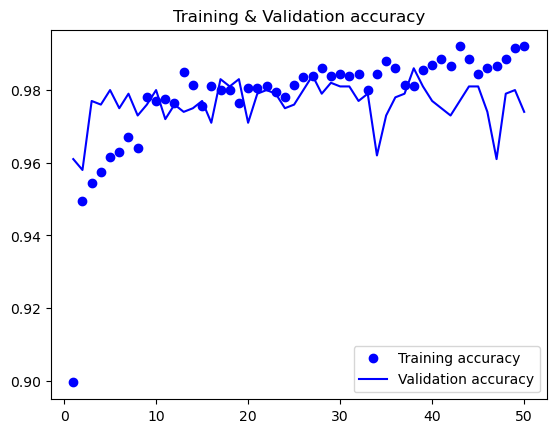

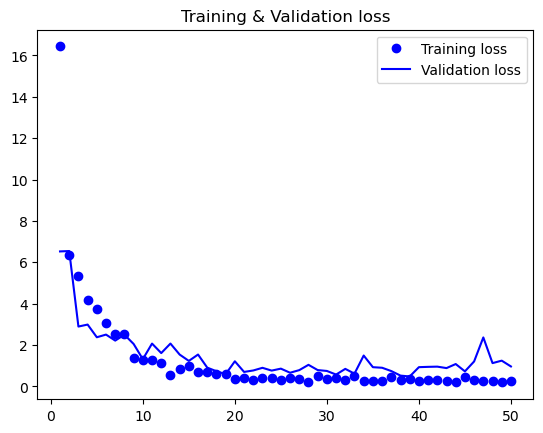

<Figure size 640x480 with 0 Axes>

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();

## Fine Tuning

In [44]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [45]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), # Set small learning rate the limit the tuning range
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='fine_tuning.keras_',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30


2023-12-11 21:53:47.239994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 21:53:47.447975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 1:47 - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:48.512680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 16s - loss: 0.0000e+00 - accuracy: 1.0000 

2023-12-11 21:53:48.773389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:49.001834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:49.224805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:49.445435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:49.664896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:49.917571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:53:50.134310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.1202 - accuracy: 0.9965    

2023-12-11 21:53:50.346632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 0.3606 - accuracy: 0.9906

2023-12-11 21:53:50.561670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.3281 - accuracy: 0.9915

2023-12-11 21:53:50.785429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.3302 - accuracy: 0.9896

2023-12-11 21:53:51.015881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.3149 - accuracy: 0.9880

2023-12-11 21:53:51.229016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.2924 - accuracy: 0.9888

2023-12-11 21:53:51.443558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.2729 - accuracy: 0.9896

2023-12-11 21:53:51.656009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.2558 - accuracy: 0.9902

2023-12-11 21:53:51.900804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.3848 - accuracy: 0.9871

2023-12-11 21:53:52.113673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.3964 - accuracy: 0.9861

2023-12-11 21:53:52.338119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.3756 - accuracy: 0.9868 

2023-12-11 21:53:52.551468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.3568 - accuracy: 0.9875

2023-12-11 21:53:52.767736: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.3398 - accuracy: 0.9881

2023-12-11 21:53:53.008575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.3244 - accuracy: 0.9886

2023-12-11 21:53:53.219344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.3103 - accuracy: 0.9891

2023-12-11 21:53:53.429196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2973 - accuracy: 0.9896

2023-12-11 21:53:53.641280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.2854 - accuracy: 0.9900

2023-12-11 21:53:53.854869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.2745 - accuracy: 0.9904

2023-12-11 21:53:54.112870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.2643 - accuracy: 0.9907

2023-12-11 21:53:54.339381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.2548 - accuracy: 0.9911

2023-12-11 21:53:54.557229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.2461 - accuracy: 0.9914

2023-12-11 21:53:54.768507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.2379 - accuracy: 0.9917

2023-12-11 21:53:54.981083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.2397 - accuracy: 0.9909

2023-12-11 21:53:55.194551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2340 - accuracy: 0.9902

2023-12-11 21:53:55.406203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2269 - accuracy: 0.9905

2023-12-11 21:53:55.619628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.2265 - accuracy: 0.9890

2023-12-11 21:53:55.832885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.2209 - accuracy: 0.9884

2023-12-11 21:53:56.049530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.2147 - accuracy: 0.9887

2023-12-11 21:53:56.266938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.2089 - accuracy: 0.9890

2023-12-11 21:53:56.476411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.2034 - accuracy: 0.9893

2023-12-11 21:53:56.686441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1982 - accuracy: 0.9896

2023-12-11 21:53:56.897128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1933 - accuracy: 0.9898

2023-12-11 21:53:57.112863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1891 - accuracy: 0.9893

2023-12-11 21:53:57.335620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1846 - accuracy: 0.9896

2023-12-11 21:53:57.547823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1803 - accuracy: 0.9898

2023-12-11 21:53:57.760513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1762 - accuracy: 0.9901

2023-12-11 21:53:57.975367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.1723 - accuracy: 0.9903

2023-12-11 21:53:58.185733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1686 - accuracy: 0.9905

2023-12-11 21:53:58.395810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1650 - accuracy: 0.9907

2023-12-11 21:53:58.605886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1762 - accuracy: 0.9896

2023-12-11 21:53:58.818279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1726 - accuracy: 0.9898

2023-12-11 21:53:59.027948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1691 - accuracy: 0.9900

2023-12-11 21:53:59.253015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.2441 - accuracy: 0.9896

2023-12-11 21:53:59.464328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.2394 - accuracy: 0.9898

2023-12-11 21:53:59.674430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.2349 - accuracy: 0.9900

2023-12-11 21:53:59.885962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2397 - accuracy: 0.9890

2023-12-11 21:54:00.093256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2353 - accuracy: 0.9892

2023-12-11 21:54:00.299793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2311 - accuracy: 0.9894

2023-12-11 21:54:00.508335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.2475 - accuracy: 0.9890

2023-12-11 21:54:00.715860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.2432 - accuracy: 0.9892

2023-12-11 21:54:00.924118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2493 - accuracy: 0.9889

2023-12-11 21:54:01.132052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2503 - accuracy: 0.9885

2023-12-11 21:54:01.340141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9882

2023-12-11 21:54:01.546988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/63 [============================>.] - ETA: 0s - loss: 0.2626 - accuracy: 0.9884

2023-12-11 21:54:01.756535: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.9885

2023-12-11 21:54:02.153900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 21s 315ms/step - loss: 0.2605 - accuracy: 0.9885 - val_loss: 1.0133 - val_accuracy: 0.9770
Epoch 2/30


2023-12-11 21:54:08.069394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:54:08.369470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 1.1176e-08 - accuracy: 1.0000

2023-12-11 21:54:08.584153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 9.2577e-04 - accuracy: 1.0000

2023-12-11 21:54:08.798842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 6.9433e-04 - accuracy: 1.0000

2023-12-11 21:54:09.015154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 5.5553e-04 - accuracy: 1.0000

2023-12-11 21:54:09.229346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 4.6294e-04 - accuracy: 1.0000

2023-12-11 21:54:09.444838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 3.9681e-04 - accuracy: 1.0000

2023-12-11 21:54:09.658720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.0294 - accuracy: 0.9961    

2023-12-11 21:54:09.889528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0920 - accuracy: 0.9931

2023-12-11 21:54:10.129742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0828 - accuracy: 0.9937

2023-12-11 21:54:10.348131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0753 - accuracy: 0.9943

2023-12-11 21:54:10.561605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.2115 - accuracy: 0.9922

2023-12-11 21:54:10.774044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.4253 - accuracy: 0.9880

2023-12-11 21:54:10.987756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.3949 - accuracy: 0.9888

2023-12-11 21:54:11.200690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.3686 - accuracy: 0.9896

2023-12-11 21:54:11.436443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.3455 - accuracy: 0.9902

2023-12-11 21:54:11.655481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.3252 - accuracy: 0.9908

2023-12-11 21:54:11.869149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.3072 - accuracy: 0.9913 

2023-12-11 21:54:12.081497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.3471 - accuracy: 0.9901

2023-12-11 21:54:12.325115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.3298 - accuracy: 0.9906

2023-12-11 21:54:12.544145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.3141 - accuracy: 0.9911

2023-12-11 21:54:12.757644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.3054 - accuracy: 0.9901

2023-12-11 21:54:12.968452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.2976 - accuracy: 0.9891

2023-12-11 21:54:13.179695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2852 - accuracy: 0.9896

2023-12-11 21:54:13.389708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.2823 - accuracy: 0.9887

2023-12-11 21:54:13.604111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.2827 - accuracy: 0.9880

2023-12-11 21:54:13.835173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.2723 - accuracy: 0.9884

2023-12-11 21:54:14.053704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.2625 - accuracy: 0.9888

2023-12-11 21:54:14.264575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.2535 - accuracy: 0.9892

2023-12-11 21:54:14.477840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.2450 - accuracy: 0.9896

2023-12-11 21:54:14.725455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.2371 - accuracy: 0.9899

2023-12-11 21:54:14.951793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2297 - accuracy: 0.9902

2023-12-11 21:54:15.178831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2228 - accuracy: 0.9905

2023-12-11 21:54:15.411042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.2162 - accuracy: 0.9908

2023-12-11 21:54:15.639555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.2100 - accuracy: 0.9911

2023-12-11 21:54:15.853415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.2042 - accuracy: 0.9913

2023-12-11 21:54:16.068804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.1987 - accuracy: 0.9916

2023-12-11 21:54:16.282802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.1934 - accuracy: 0.9918

2023-12-11 21:54:16.497012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1885 - accuracy: 0.9920

2023-12-11 21:54:16.718334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1886 - accuracy: 0.9914

2023-12-11 21:54:16.933444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1840 - accuracy: 0.9916

2023-12-11 21:54:17.175709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1797 - accuracy: 0.9918

2023-12-11 21:54:17.389014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1755 - accuracy: 0.9920

2023-12-11 21:54:17.604979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1715 - accuracy: 0.9922

2023-12-11 21:54:17.819363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.1677 - accuracy: 0.9924

2023-12-11 21:54:18.033719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1640 - accuracy: 0.9925

2023-12-11 21:54:18.248181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1605 - accuracy: 0.9927

2023-12-11 21:54:18.478787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1572 - accuracy: 0.9928

2023-12-11 21:54:18.705169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1811 - accuracy: 0.9923

2023-12-11 21:54:18.916554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1775 - accuracy: 0.9925

2023-12-11 21:54:19.130575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1740 - accuracy: 0.9926

2023-12-11 21:54:19.343069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1887 - accuracy: 0.9922

2023-12-11 21:54:19.556217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1896 - accuracy: 0.9917

2023-12-11 21:54:19.780097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1861 - accuracy: 0.9919

2023-12-11 21:54:20.007292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1827 - accuracy: 0.9920

2023-12-11 21:54:20.218579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1795 - accuracy: 0.9922

2023-12-11 21:54:20.428085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1763 - accuracy: 0.9923

2023-12-11 21:54:20.649456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1775 - accuracy: 0.9919

2023-12-11 21:54:20.870943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1838 - accuracy: 0.9915

2023-12-11 21:54:21.079324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1808 - accuracy: 0.9917

2023-12-11 21:54:21.289518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1778 - accuracy: 0.9918

2023-12-11 21:54:21.500638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1850 - accuracy: 0.9915

2023-12-11 21:54:21.711008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 293ms/step - loss: 0.1850 - accuracy: 0.9915 - val_loss: 1.2829 - val_accuracy: 0.9710
Epoch 3/30


2023-12-11 21:54:26.545246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 2.6077e-08 - accuracy: 1.0000

2023-12-11 21:54:26.854705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0153 - accuracy: 0.9844    

2023-12-11 21:54:27.071466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.6446 - accuracy: 0.9792

2023-12-11 21:54:27.289712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.4835 - accuracy: 0.9844

2023-12-11 21:54:27.503301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.3868 - accuracy: 0.9875

2023-12-11 21:54:27.716195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.5084 - accuracy: 0.9844

2023-12-11 21:54:27.932523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.4358 - accuracy: 0.9866

2023-12-11 21:54:28.145501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.3813 - accuracy: 0.9883

2023-12-11 21:54:28.369332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.3390 - accuracy: 0.9896

2023-12-11 21:54:28.586566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.3051 - accuracy: 0.9906

2023-12-11 21:54:28.808579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.2773 - accuracy: 0.9915

2023-12-11 21:54:29.025627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.2542 - accuracy: 0.9922

2023-12-11 21:54:29.246730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.2347 - accuracy: 0.9928

2023-12-11 21:54:29.473778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.2179 - accuracy: 0.9933

2023-12-11 21:54:29.689752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.2034 - accuracy: 0.9937

2023-12-11 21:54:29.904145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1907 - accuracy: 0.9941

2023-12-11 21:54:30.123584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1794 - accuracy: 0.9945

2023-12-11 21:54:30.341338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.1695 - accuracy: 0.9948 

2023-12-11 21:54:30.566544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.1606 - accuracy: 0.9951

2023-12-11 21:54:30.799015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1525 - accuracy: 0.9953

2023-12-11 21:54:31.028155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1453 - accuracy: 0.9955

2023-12-11 21:54:31.248788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1935 - accuracy: 0.9929

2023-12-11 21:54:31.469882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1851 - accuracy: 0.9932

2023-12-11 21:54:31.685806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2235 - accuracy: 0.9909

2023-12-11 21:54:31.915216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.2552 - accuracy: 0.9900

2023-12-11 21:54:32.126422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.2453 - accuracy: 0.9904

2023-12-11 21:54:32.342423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.2497 - accuracy: 0.9896

2023-12-11 21:54:32.554755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.2407 - accuracy: 0.9900

2023-12-11 21:54:32.767540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.2324 - accuracy: 0.9903

2023-12-11 21:54:32.980938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.2247 - accuracy: 0.9906

2023-12-11 21:54:33.192550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.2174 - accuracy: 0.9909

2023-12-11 21:54:33.404310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2106 - accuracy: 0.9912

2023-12-11 21:54:33.615709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2043 - accuracy: 0.9915

2023-12-11 21:54:33.832485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1983 - accuracy: 0.9917

2023-12-11 21:54:34.050193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1926 - accuracy: 0.9920

2023-12-11 21:54:34.290287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.1930 - accuracy: 0.9913

2023-12-11 21:54:34.503300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.2130 - accuracy: 0.9899

2023-12-11 21:54:34.715254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.2074 - accuracy: 0.9901

2023-12-11 21:54:34.928147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.2021 - accuracy: 0.9904

2023-12-11 21:54:35.141561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1970 - accuracy: 0.9906

2023-12-11 21:54:35.356481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1922 - accuracy: 0.9909

2023-12-11 21:54:35.567057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1970 - accuracy: 0.9903

2023-12-11 21:54:35.778103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1925 - accuracy: 0.9906

2023-12-11 21:54:35.989600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1881 - accuracy: 0.9908

2023-12-11 21:54:36.201497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.1839 - accuracy: 0.9910

2023-12-11 21:54:36.413380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1799 - accuracy: 0.9912

2023-12-11 21:54:36.625208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1958 - accuracy: 0.9907

2023-12-11 21:54:36.838063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1917 - accuracy: 0.9909

2023-12-11 21:54:37.051154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1878 - accuracy: 0.9911

2023-12-11 21:54:37.261970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1845 - accuracy: 0.9912

2023-12-11 21:54:37.473269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1809 - accuracy: 0.9914

2023-12-11 21:54:37.685111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1835 - accuracy: 0.9910

2023-12-11 21:54:37.898363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.2108 - accuracy: 0.9906

2023-12-11 21:54:38.107022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2069 - accuracy: 0.9907

2023-12-11 21:54:38.318250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2031 - accuracy: 0.9909

2023-12-11 21:54:38.526499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1995 - accuracy: 0.9911

2023-12-11 21:54:38.732809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1960 - accuracy: 0.9912

2023-12-11 21:54:38.940949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1926 - accuracy: 0.9914

2023-12-11 21:54:39.167250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1894 - accuracy: 0.9915

2023-12-11 21:54:39.373986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1862 - accuracy: 0.9917

2023-12-11 21:54:39.582165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9918

2023-12-11 21:54:39.790576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9920

2023-12-11 21:54:39.997934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 19s 306ms/step - loss: 0.1788 - accuracy: 0.9920 - val_loss: 0.9798 - val_accuracy: 0.9790
Epoch 4/30


2023-12-11 21:54:45.854905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 20s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:54:46.181739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:54:46.400777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:54:46.612908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.6205 - accuracy: 0.9844    

2023-12-11 21:54:46.825473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.4964 - accuracy: 0.9875

2023-12-11 21:54:47.038268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.4399 - accuracy: 0.9844

2023-12-11 21:54:47.254869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.3771 - accuracy: 0.9866

2023-12-11 21:54:47.468753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.3300 - accuracy: 0.9883

2023-12-11 21:54:47.698539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.4622 - accuracy: 0.9826

2023-12-11 21:54:47.915468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.4160 - accuracy: 0.9844

2023-12-11 21:54:48.128776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.3782 - accuracy: 0.9858

2023-12-11 21:54:48.340497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 10s - loss: 0.3467 - accuracy: 0.9870

2023-12-11 21:54:48.553664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.3200 - accuracy: 0.9880

2023-12-11 21:54:48.767243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.3876 - accuracy: 0.9866

2023-12-11 21:54:48.980667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.3618 - accuracy: 0.9875

2023-12-11 21:54:49.196649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.4022 - accuracy: 0.9844

2023-12-11 21:54:49.408833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 9s - loss: 0.3785 - accuracy: 0.9853 

2023-12-11 21:54:49.620499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.4553 - accuracy: 0.9844

2023-12-11 21:54:49.847209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.4314 - accuracy: 0.9852

2023-12-11 21:54:50.059099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.4120 - accuracy: 0.9844

2023-12-11 21:54:50.270978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.4226 - accuracy: 0.9836

2023-12-11 21:54:50.482807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.4034 - accuracy: 0.9844

2023-12-11 21:54:50.693961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.4310 - accuracy: 0.9837

2023-12-11 21:54:50.905007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.4137 - accuracy: 0.9844

2023-12-11 21:54:51.119500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.3972 - accuracy: 0.9850

2023-12-11 21:54:51.340771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 7s - loss: 0.3819 - accuracy: 0.9856

2023-12-11 21:54:51.552583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.3677 - accuracy: 0.9861

2023-12-11 21:54:51.766782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.3987 - accuracy: 0.9855

2023-12-11 21:54:51.980761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.3849 - accuracy: 0.9860

2023-12-11 21:54:52.211894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.3721 - accuracy: 0.9865

2023-12-11 21:54:52.427054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.3732 - accuracy: 0.9859

2023-12-11 21:54:52.638308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.3616 - accuracy: 0.9863

2023-12-11 21:54:52.849285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.3561 - accuracy: 0.9858

2023-12-11 21:54:53.062162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.3456 - accuracy: 0.9862

2023-12-11 21:54:53.276612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.3651 - accuracy: 0.9857

2023-12-11 21:54:53.489377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.3550 - accuracy: 0.9861

2023-12-11 21:54:53.703934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.3464 - accuracy: 0.9856

2023-12-11 21:54:53.918291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.3383 - accuracy: 0.9852

2023-12-11 21:54:54.131900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.3459 - accuracy: 0.9848

2023-12-11 21:54:54.343933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.3372 - accuracy: 0.9852

2023-12-11 21:54:54.579082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.3290 - accuracy: 0.9855

2023-12-11 21:54:54.789285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.3212 - accuracy: 0.9859

2023-12-11 21:54:55.000467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.3137 - accuracy: 0.9862

2023-12-11 21:54:55.212550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.3070 - accuracy: 0.9865

2023-12-11 21:54:55.427236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.3361 - accuracy: 0.9847

2023-12-11 21:54:55.646224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3288 - accuracy: 0.9851

2023-12-11 21:54:55.863635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.3363 - accuracy: 0.9847

2023-12-11 21:54:56.076245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.3293 - accuracy: 0.9850

2023-12-11 21:54:56.287709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.3226 - accuracy: 0.9853

2023-12-11 21:54:56.500116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3162 - accuracy: 0.9856

2023-12-11 21:54:56.712296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.3277 - accuracy: 0.9853

2023-12-11 21:54:56.925719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.3218 - accuracy: 0.9850

2023-12-11 21:54:57.142178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.3157 - accuracy: 0.9853

2023-12-11 21:54:57.352789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.3164 - accuracy: 0.9850

2023-12-11 21:54:57.561127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.3106 - accuracy: 0.9852

2023-12-11 21:54:57.769258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.3116 - accuracy: 0.9849

2023-12-11 21:54:57.979129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.3061 - accuracy: 0.9852

2023-12-11 21:54:58.192208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.3008 - accuracy: 0.9855

2023-12-11 21:54:58.401470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2957 - accuracy: 0.9857

2023-12-11 21:54:58.607525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2908 - accuracy: 0.9859

2023-12-11 21:54:58.814507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2860 - accuracy: 0.9862

2023-12-11 21:54:59.021913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.9865

2023-12-11 21:54:59.242755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 20s 310ms/step - loss: 0.2792 - accuracy: 0.9865 - val_loss: 0.9405 - val_accuracy: 0.9770
Epoch 5/30


2023-12-11 21:55:05.432540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:55:05.720901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:55:05.931311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.1681 - accuracy: 0.9896    

2023-12-11 21:55:06.143284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.1941 - accuracy: 0.9844

2023-12-11 21:55:06.352874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.1553 - accuracy: 0.9875

2023-12-11 21:55:06.566669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1294 - accuracy: 0.9896

2023-12-11 21:55:06.779363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 11s - loss: 0.1109 - accuracy: 0.9911

2023-12-11 21:55:06.990620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.0972 - accuracy: 0.9922

2023-12-11 21:55:07.200842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0864 - accuracy: 0.9931

2023-12-11 21:55:07.411550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0778 - accuracy: 0.9937

2023-12-11 21:55:07.619648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 10s - loss: 0.2171 - accuracy: 0.9886

2023-12-11 21:55:07.829969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 10s - loss: 0.1990 - accuracy: 0.9896

2023-12-11 21:55:08.056410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.1837 - accuracy: 0.9904

2023-12-11 21:55:08.265957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.1706 - accuracy: 0.9911

2023-12-11 21:55:08.474756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1592 - accuracy: 0.9917

2023-12-11 21:55:08.684189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 9s - loss: 0.1493 - accuracy: 0.9922 

2023-12-11 21:55:08.892712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 9s - loss: 0.1764 - accuracy: 0.9908

2023-12-11 21:55:09.104594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.1876 - accuracy: 0.9896

2023-12-11 21:55:09.318595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.2074 - accuracy: 0.9885

2023-12-11 21:55:09.527326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.2120 - accuracy: 0.9875

2023-12-11 21:55:09.737491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 8s - loss: 0.2019 - accuracy: 0.9881

2023-12-11 21:55:09.948909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.1928 - accuracy: 0.9886

2023-12-11 21:55:10.157434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1844 - accuracy: 0.9891

2023-12-11 21:55:10.368018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2300 - accuracy: 0.9883

2023-12-11 21:55:10.575468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.2208 - accuracy: 0.9887

2023-12-11 21:55:10.787864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 7s - loss: 0.2123 - accuracy: 0.9892

2023-12-11 21:55:10.998311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.2048 - accuracy: 0.9896

2023-12-11 21:55:11.208189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.1975 - accuracy: 0.9900

2023-12-11 21:55:11.421007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1907 - accuracy: 0.9903

2023-12-11 21:55:11.631144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 6s - loss: 0.2664 - accuracy: 0.9896

2023-12-11 21:55:11.844660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.2578 - accuracy: 0.9899

2023-12-11 21:55:12.081116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2498 - accuracy: 0.9902

2023-12-11 21:55:12.290810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2422 - accuracy: 0.9905

2023-12-11 21:55:12.500385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.2351 - accuracy: 0.9908

2023-12-11 21:55:12.710715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.2284 - accuracy: 0.9911

2023-12-11 21:55:12.919296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.2800 - accuracy: 0.9887

2023-12-11 21:55:13.128881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.2725 - accuracy: 0.9890

2023-12-11 21:55:13.337661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.2653 - accuracy: 0.9893

2023-12-11 21:55:13.547839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.2585 - accuracy: 0.9896

2023-12-11 21:55:13.758979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.2583 - accuracy: 0.9891

2023-12-11 21:55:13.968908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.2640 - accuracy: 0.9886

2023-12-11 21:55:14.178663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.2578 - accuracy: 0.9888

2023-12-11 21:55:14.389261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.2766 - accuracy: 0.9876

2023-12-11 21:55:14.597161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.2710 - accuracy: 0.9872

2023-12-11 21:55:14.807245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.2756 - accuracy: 0.9868

2023-12-11 21:55:15.016941: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.2697 - accuracy: 0.9871

2023-12-11 21:55:15.228311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.2640 - accuracy: 0.9874

2023-12-11 21:55:15.436531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.2585 - accuracy: 0.9876

2023-12-11 21:55:15.644377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.2616 - accuracy: 0.9872

2023-12-11 21:55:15.866706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.2564 - accuracy: 0.9875

2023-12-11 21:55:16.076612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.2513 - accuracy: 0.9877

2023-12-11 21:55:16.286269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.2465 - accuracy: 0.9880

2023-12-11 21:55:16.497199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.2570 - accuracy: 0.9876

2023-12-11 21:55:16.702370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.2523 - accuracy: 0.9878

2023-12-11 21:55:16.908790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2477 - accuracy: 0.9881

2023-12-11 21:55:17.115282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2615 - accuracy: 0.9872

2023-12-11 21:55:17.323854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.2569 - accuracy: 0.9874

2023-12-11 21:55:17.531194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.2524 - accuracy: 0.9876

2023-12-11 21:55:17.737456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.9878

2023-12-11 21:55:17.946235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2507 - accuracy: 0.9875

2023-12-11 21:55:18.153371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2466 - accuracy: 0.9877

2023-12-11 21:55:18.361157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2407 - accuracy: 0.9880

2023-12-11 21:55:18.566630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 19s 301ms/step - loss: 0.2407 - accuracy: 0.9880 - val_loss: 0.8336 - val_accuracy: 0.9800
Epoch 6/30


2023-12-11 21:55:24.407522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:55:24.714915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 12s - loss: 0.4027 - accuracy: 0.9688    

2023-12-11 21:55:24.928487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.2684 - accuracy: 0.9792

2023-12-11 21:55:25.141374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.2013 - accuracy: 0.9844

2023-12-11 21:55:25.350355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.1611 - accuracy: 0.9875

2023-12-11 21:55:25.559340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1342 - accuracy: 0.9896

2023-12-11 21:55:25.772175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 11s - loss: 0.1150 - accuracy: 0.9911

2023-12-11 21:55:25.982752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.1007 - accuracy: 0.9922

2023-12-11 21:55:26.193937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0895 - accuracy: 0.9931

2023-12-11 21:55:26.405267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0805 - accuracy: 0.9937

2023-12-11 21:55:26.614001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 10s - loss: 0.0732 - accuracy: 0.9943

2023-12-11 21:55:26.825094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 10s - loss: 0.0671 - accuracy: 0.9948

2023-12-11 21:55:27.037822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.0619 - accuracy: 0.9952

2023-12-11 21:55:27.245792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0852 - accuracy: 0.9933

2023-12-11 21:55:27.455533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0795 - accuracy: 0.9937

2023-12-11 21:55:27.664566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 9s - loss: 0.1444 - accuracy: 0.9902 

2023-12-11 21:55:27.887022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 9s - loss: 0.1359 - accuracy: 0.9908

2023-12-11 21:55:28.097935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.1284 - accuracy: 0.9913

2023-12-11 21:55:28.308230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.1216 - accuracy: 0.9918

2023-12-11 21:55:28.517313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1155 - accuracy: 0.9922

2023-12-11 21:55:28.727298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 8s - loss: 0.1100 - accuracy: 0.9926

2023-12-11 21:55:28.936602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.1050 - accuracy: 0.9929

2023-12-11 21:55:29.147470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1006 - accuracy: 0.9932

2023-12-11 21:55:29.356872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0964 - accuracy: 0.9935

2023-12-11 21:55:29.567203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0925 - accuracy: 0.9937

2023-12-11 21:55:29.776507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 7s - loss: 0.0890 - accuracy: 0.9940

2023-12-11 21:55:29.985932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0857 - accuracy: 0.9942

2023-12-11 21:55:30.197126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0977 - accuracy: 0.9933

2023-12-11 21:55:30.406628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0943 - accuracy: 0.9935

2023-12-11 21:55:30.616822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 6s - loss: 0.0911 - accuracy: 0.9937

2023-12-11 21:55:30.843005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.0882 - accuracy: 0.9940

2023-12-11 21:55:31.052011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0855 - accuracy: 0.9941

2023-12-11 21:55:31.261887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0829 - accuracy: 0.9943

2023-12-11 21:55:31.469910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0804 - accuracy: 0.9945

2023-12-11 21:55:31.679453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.0781 - accuracy: 0.9946

2023-12-11 21:55:31.890828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.0760 - accuracy: 0.9948

2023-12-11 21:55:32.100636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0739 - accuracy: 0.9949

2023-12-11 21:55:32.309037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0720 - accuracy: 0.9951

2023-12-11 21:55:32.518980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0701 - accuracy: 0.9952

2023-12-11 21:55:32.727981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.0684 - accuracy: 0.9953

2023-12-11 21:55:32.940325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0667 - accuracy: 0.9954

2023-12-11 21:55:33.152117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0651 - accuracy: 0.9955

2023-12-11 21:55:33.361629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0636 - accuracy: 0.9956

2023-12-11 21:55:33.572071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0621 - accuracy: 0.9957

2023-12-11 21:55:33.781047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0608 - accuracy: 0.9958

2023-12-11 21:55:33.990792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0594 - accuracy: 0.9959

2023-12-11 21:55:34.199977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0582 - accuracy: 0.9960

2023-12-11 21:55:34.409322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0570 - accuracy: 0.9961

2023-12-11 21:55:34.642549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.0559 - accuracy: 0.9962

2023-12-11 21:55:34.852797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0644 - accuracy: 0.9956

2023-12-11 21:55:35.070878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0632 - accuracy: 0.9957

2023-12-11 21:55:35.297519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0622 - accuracy: 0.9958

2023-12-11 21:55:35.508783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0611 - accuracy: 0.9959

2023-12-11 21:55:35.717546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0599 - accuracy: 0.9959

2023-12-11 21:55:35.925525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0588 - accuracy: 0.9960

2023-12-11 21:55:36.132279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0578 - accuracy: 0.9961

2023-12-11 21:55:36.341740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0813 - accuracy: 0.9956

2023-12-11 21:55:36.553643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0799 - accuracy: 0.9957

2023-12-11 21:55:36.765070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0865 - accuracy: 0.9952

2023-12-11 21:55:36.977888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0850 - accuracy: 0.9953

2023-12-11 21:55:37.191296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0836 - accuracy: 0.9954

2023-12-11 21:55:37.399048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9955

2023-12-11 21:55:37.610639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 19s 304ms/step - loss: 0.0816 - accuracy: 0.9955 - val_loss: 0.7585 - val_accuracy: 0.9820
Epoch 7/30


2023-12-11 21:55:43.585316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 23s - loss: 0.0013 - accuracy: 1.0000

2023-12-11 21:55:43.960230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 6.7009e-04 - accuracy: 1.0000

2023-12-11 21:55:44.177646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.1750 - accuracy: 0.9896    

2023-12-11 21:55:44.398670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.1312 - accuracy: 0.9922

2023-12-11 21:55:44.622936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.2524 - accuracy: 0.9875

2023-12-11 21:55:44.837783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.5037 - accuracy: 0.9844

2023-12-11 21:55:45.054360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.4317 - accuracy: 0.9866

2023-12-11 21:55:45.289816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.3778 - accuracy: 0.9883

2023-12-11 21:55:45.513276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.3358 - accuracy: 0.9896

2023-12-11 21:55:45.728388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.3716 - accuracy: 0.9875

2023-12-11 21:55:45.943122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.4287 - accuracy: 0.9858

2023-12-11 21:55:46.159846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.3930 - accuracy: 0.9870

2023-12-11 21:55:46.373565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.3627 - accuracy: 0.9880

2023-12-11 21:55:46.587580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.3368 - accuracy: 0.9888

2023-12-11 21:55:46.803136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.3144 - accuracy: 0.9896

2023-12-11 21:55:47.018259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.2947 - accuracy: 0.9902

2023-12-11 21:55:47.232965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.3188 - accuracy: 0.9890

2023-12-11 21:55:47.456680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.3932 - accuracy: 0.9861 

2023-12-11 21:55:47.669919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.3725 - accuracy: 0.9868

2023-12-11 21:55:47.903450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.3648 - accuracy: 0.9859

2023-12-11 21:55:48.117580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.3546 - accuracy: 0.9851

2023-12-11 21:55:48.334773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.3385 - accuracy: 0.9858

2023-12-11 21:55:48.554320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.3700 - accuracy: 0.9851

2023-12-11 21:55:48.767904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.3561 - accuracy: 0.9844

2023-12-11 21:55:48.982707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.3418 - accuracy: 0.9850

2023-12-11 21:55:49.194462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.3287 - accuracy: 0.9856

2023-12-11 21:55:49.431840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.3167 - accuracy: 0.9861

2023-12-11 21:55:49.658581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.3054 - accuracy: 0.9866

2023-12-11 21:55:49.873633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.2949 - accuracy: 0.9871

2023-12-11 21:55:50.097185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.2851 - accuracy: 0.9875

2023-12-11 21:55:50.334866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.2759 - accuracy: 0.9879

2023-12-11 21:55:50.574295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2673 - accuracy: 0.9883

2023-12-11 21:55:50.798796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2592 - accuracy: 0.9886

2023-12-11 21:55:51.041737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.2515 - accuracy: 0.9890

2023-12-11 21:55:51.289475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.2443 - accuracy: 0.9893

2023-12-11 21:55:51.513324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.2498 - accuracy: 0.9887

2023-12-11 21:55:51.750129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.2742 - accuracy: 0.9873

2023-12-11 21:55:51.981679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.2669 - accuracy: 0.9877

2023-12-11 21:55:52.218417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.2601 - accuracy: 0.9880

2023-12-11 21:55:52.431876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.2772 - accuracy: 0.9875

2023-12-11 21:55:52.648900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.2704 - accuracy: 0.9878

2023-12-11 21:55:52.867476: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.2640 - accuracy: 0.9881

2023-12-11 21:55:53.085067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.2579 - accuracy: 0.9884

2023-12-11 21:55:53.300801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.2520 - accuracy: 0.9886

2023-12-11 21:55:53.524069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.3476 - accuracy: 0.9882

2023-12-11 21:55:53.737087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.3401 - accuracy: 0.9885

2023-12-11 21:55:53.977485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.3328 - accuracy: 0.9887

2023-12-11 21:55:54.196875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.3259 - accuracy: 0.9889

2023-12-11 21:55:54.415256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.3246 - accuracy: 0.9885

2023-12-11 21:55:54.641248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.3181 - accuracy: 0.9887

2023-12-11 21:55:54.860908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.3119 - accuracy: 0.9890

2023-12-11 21:55:55.078006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.3059 - accuracy: 0.9892

2023-12-11 21:55:55.300398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.3001 - accuracy: 0.9894

2023-12-11 21:55:55.514310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.2945 - accuracy: 0.9896

2023-12-11 21:55:55.744644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.2892 - accuracy: 0.9898

2023-12-11 21:55:55.954218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.2847 - accuracy: 0.9894

2023-12-11 21:55:56.163034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.2797 - accuracy: 0.9896

2023-12-11 21:55:56.373520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.2749 - accuracy: 0.9898

2023-12-11 21:55:56.582211: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.2702 - accuracy: 0.9899

2023-12-11 21:55:56.790742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.2657 - accuracy: 0.9901

2023-12-11 21:55:57.000040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.2614 - accuracy: 0.9903

2023-12-11 21:55:57.209555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.9905

2023-12-11 21:55:57.416597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 296ms/step - loss: 0.2551 - accuracy: 0.9905 - val_loss: 0.9329 - val_accuracy: 0.9780
Epoch 8/30


2023-12-11 21:56:02.289196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:02.592699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:02.817824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.2163 - accuracy: 0.9896    

2023-12-11 21:56:03.045597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.2857 - accuracy: 0.9844

2023-12-11 21:56:03.264364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.2286 - accuracy: 0.9875

2023-12-11 21:56:03.487632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1905 - accuracy: 0.9896

2023-12-11 21:56:03.733665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.1633 - accuracy: 0.9911

2023-12-11 21:56:03.953308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.1429 - accuracy: 0.9922

2023-12-11 21:56:04.182318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.1270 - accuracy: 0.9931

2023-12-11 21:56:04.396775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.1143 - accuracy: 0.9937

2023-12-11 21:56:04.628376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1039 - accuracy: 0.9943

2023-12-11 21:56:04.856919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.1992 - accuracy: 0.9922

2023-12-11 21:56:05.083692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.1838 - accuracy: 0.9928

2023-12-11 21:56:05.302927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.2010 - accuracy: 0.9911

2023-12-11 21:56:05.521427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1876 - accuracy: 0.9917

2023-12-11 21:56:05.732973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1759 - accuracy: 0.9922

2023-12-11 21:56:05.968627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1655 - accuracy: 0.9926

2023-12-11 21:56:06.183725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.1563 - accuracy: 0.9931

2023-12-11 21:56:06.397358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.1481 - accuracy: 0.9934 

2023-12-11 21:56:06.614089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1407 - accuracy: 0.9937

2023-12-11 21:56:06.830470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1340 - accuracy: 0.9940

2023-12-11 21:56:07.042326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1414 - accuracy: 0.9929

2023-12-11 21:56:07.256694: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1891 - accuracy: 0.9918

2023-12-11 21:56:07.469748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2060 - accuracy: 0.9909

2023-12-11 21:56:07.690695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1977 - accuracy: 0.9912

2023-12-11 21:56:07.927314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1901 - accuracy: 0.9916

2023-12-11 21:56:08.150312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.1831 - accuracy: 0.9919

2023-12-11 21:56:08.377637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.2000 - accuracy: 0.9911

2023-12-11 21:56:08.595017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1931 - accuracy: 0.9914

2023-12-11 21:56:08.834742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.1867 - accuracy: 0.9917

2023-12-11 21:56:09.107871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.1807 - accuracy: 0.9919

2023-12-11 21:56:09.333905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.1750 - accuracy: 0.9922

2023-12-11 21:56:09.549474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.1697 - accuracy: 0.9924

2023-12-11 21:56:09.772530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1651 - accuracy: 0.9926

2023-12-11 21:56:09.990272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1604 - accuracy: 0.9929

2023-12-11 21:56:10.224221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.1559 - accuracy: 0.9931

2023-12-11 21:56:10.450687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.1517 - accuracy: 0.9932

2023-12-11 21:56:10.665245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.1477 - accuracy: 0.9934

2023-12-11 21:56:10.895053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1439 - accuracy: 0.9936

2023-12-11 21:56:11.115151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1403 - accuracy: 0.9937

2023-12-11 21:56:11.339404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1369 - accuracy: 0.9939

2023-12-11 21:56:11.569297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1336 - accuracy: 0.9940

2023-12-11 21:56:11.813411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1305 - accuracy: 0.9942

2023-12-11 21:56:12.041550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1276 - accuracy: 0.9943

2023-12-11 21:56:12.261884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.1247 - accuracy: 0.9944

2023-12-11 21:56:12.487944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1220 - accuracy: 0.9946

2023-12-11 21:56:12.724810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1194 - accuracy: 0.9947

2023-12-11 21:56:12.942384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1169 - accuracy: 0.9948

2023-12-11 21:56:13.164544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1146 - accuracy: 0.9949

2023-12-11 21:56:13.392836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1123 - accuracy: 0.9950

2023-12-11 21:56:13.622742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1101 - accuracy: 0.9951

2023-12-11 21:56:13.843315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1079 - accuracy: 0.9952

2023-12-11 21:56:14.058951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1059 - accuracy: 0.9953

2023-12-11 21:56:14.266914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.1039 - accuracy: 0.9954

2023-12-11 21:56:14.481027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1021 - accuracy: 0.9955

2023-12-11 21:56:14.690870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1002 - accuracy: 0.9955

2023-12-11 21:56:14.935867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0985 - accuracy: 0.9956

2023-12-11 21:56:15.164430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1378 - accuracy: 0.9941

2023-12-11 21:56:15.381358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1355 - accuracy: 0.9942

2023-12-11 21:56:15.593658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1332 - accuracy: 0.9943

2023-12-11 21:56:15.806784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9939

2023-12-11 21:56:16.023979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9940

2023-12-11 21:56:16.246473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 299ms/step - loss: 0.1323 - accuracy: 0.9940 - val_loss: 0.9237 - val_accuracy: 0.9790
Epoch 9/30


2023-12-11 21:56:21.145361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:21.451530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 7.4506e-09 - accuracy: 1.0000

2023-12-11 21:56:21.681456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 4.9671e-09 - accuracy: 1.0000

2023-12-11 21:56:21.910554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 3.7253e-09 - accuracy: 1.0000

2023-12-11 21:56:22.121959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.0089 - accuracy: 0.9937    

2023-12-11 21:56:22.339913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0074 - accuracy: 0.9948

2023-12-11 21:56:22.565795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0064 - accuracy: 0.9955

2023-12-11 21:56:22.790987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0056 - accuracy: 0.9961

2023-12-11 21:56:23.014999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.1030 - accuracy: 0.9896

2023-12-11 21:56:23.240662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.2317 - accuracy: 0.9844

2023-12-11 21:56:23.477918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.5257 - accuracy: 0.9830

2023-12-11 21:56:23.691196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.4819 - accuracy: 0.9844

2023-12-11 21:56:23.912621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.4448 - accuracy: 0.9856

2023-12-11 21:56:24.144126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.4131 - accuracy: 0.9866

2023-12-11 21:56:24.363711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.4197 - accuracy: 0.9854

2023-12-11 21:56:24.580233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.3935 - accuracy: 0.9863

2023-12-11 21:56:24.794349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.3703 - accuracy: 0.9871

2023-12-11 21:56:25.023631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.3708 - accuracy: 0.9861

2023-12-11 21:56:25.247529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.3513 - accuracy: 0.9868 

2023-12-11 21:56:25.463118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.3436 - accuracy: 0.9859

2023-12-11 21:56:25.680414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.3272 - accuracy: 0.9866

2023-12-11 21:56:25.892106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.3123 - accuracy: 0.9872

2023-12-11 21:56:26.107208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.2988 - accuracy: 0.9878

2023-12-11 21:56:26.325194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.2863 - accuracy: 0.9883

2023-12-11 21:56:26.565460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.2763 - accuracy: 0.9875

2023-12-11 21:56:26.781260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.2815 - accuracy: 0.9868

2023-12-11 21:56:26.994556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.2710 - accuracy: 0.9873

2023-12-11 21:56:27.210191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.2613 - accuracy: 0.9877

2023-12-11 21:56:27.426539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.2523 - accuracy: 0.9881

2023-12-11 21:56:27.645114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.2439 - accuracy: 0.9885

2023-12-11 21:56:27.861844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.2361 - accuracy: 0.9889

2023-12-11 21:56:28.081566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.2287 - accuracy: 0.9893

2023-12-11 21:56:28.306408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.2218 - accuracy: 0.9896

2023-12-11 21:56:28.533434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.2608 - accuracy: 0.9890

2023-12-11 21:56:28.753665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.2534 - accuracy: 0.9893

2023-12-11 21:56:28.967355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.2463 - accuracy: 0.9896

2023-12-11 21:56:29.193205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.2397 - accuracy: 0.9899

2023-12-11 21:56:29.429969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.2334 - accuracy: 0.9901

2023-12-11 21:56:29.650471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.2274 - accuracy: 0.9904

2023-12-11 21:56:29.877628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.2217 - accuracy: 0.9906

2023-12-11 21:56:30.102891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.2163 - accuracy: 0.9909

2023-12-11 21:56:30.317124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.2112 - accuracy: 0.9911

2023-12-11 21:56:30.541878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.2062 - accuracy: 0.9913

2023-12-11 21:56:30.759731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.2016 - accuracy: 0.9915

2023-12-11 21:56:31.034295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.1975 - accuracy: 0.9917

2023-12-11 21:56:31.259546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1932 - accuracy: 0.9918

2023-12-11 21:56:31.489945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1891 - accuracy: 0.9920

2023-12-11 21:56:31.712856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1893 - accuracy: 0.9915

2023-12-11 21:56:31.929467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1854 - accuracy: 0.9917

2023-12-11 21:56:32.183457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1817 - accuracy: 0.9919

2023-12-11 21:56:32.398280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1781 - accuracy: 0.9920

2023-12-11 21:56:32.619630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1747 - accuracy: 0.9922

2023-12-11 21:56:32.834674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1714 - accuracy: 0.9923

2023-12-11 21:56:33.052115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.1682 - accuracy: 0.9925

2023-12-11 21:56:33.265035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1652 - accuracy: 0.9926

2023-12-11 21:56:33.477977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1646 - accuracy: 0.9916

2023-12-11 21:56:33.686039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1617 - accuracy: 0.9918

2023-12-11 21:56:33.896870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1589 - accuracy: 0.9919

2023-12-11 21:56:34.105374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1562 - accuracy: 0.9921

2023-12-11 21:56:34.318506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1871 - accuracy: 0.9917

2023-12-11 21:56:34.527045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9918

2023-12-11 21:56:34.737645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1971 - accuracy: 0.9915

2023-12-11 21:56:34.946344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 296ms/step - loss: 0.1971 - accuracy: 0.9915 - val_loss: 0.9120 - val_accuracy: 0.9770
Epoch 10/30


2023-12-11 21:56:39.809090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:40.124222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:40.342568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:40.601030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:56:40.814630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.0574 - accuracy: 0.9937    

2023-12-11 21:56:41.025333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0789 - accuracy: 0.9896

2023-12-11 21:56:41.239991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0676 - accuracy: 0.9911

2023-12-11 21:56:41.452603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0591 - accuracy: 0.9922

2023-12-11 21:56:41.681814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0526 - accuracy: 0.9931

2023-12-11 21:56:41.893018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0473 - accuracy: 0.9937

2023-12-11 21:56:42.106177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0702 - accuracy: 0.9915

2023-12-11 21:56:42.322675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0643 - accuracy: 0.9922

2023-12-11 21:56:42.535676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.0594 - accuracy: 0.9928

2023-12-11 21:56:42.748143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0832 - accuracy: 0.9911

2023-12-11 21:56:42.961594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0777 - accuracy: 0.9917

2023-12-11 21:56:43.176065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1003 - accuracy: 0.9902

2023-12-11 21:56:43.397486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0987 - accuracy: 0.9890

2023-12-11 21:56:43.618617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.0933 - accuracy: 0.9896 

2023-12-11 21:56:43.832583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0891 - accuracy: 0.9901

2023-12-11 21:56:44.047387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0846 - accuracy: 0.9906

2023-12-11 21:56:44.268034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0806 - accuracy: 0.9911

2023-12-11 21:56:44.484059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.0769 - accuracy: 0.9915

2023-12-11 21:56:44.704752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0736 - accuracy: 0.9918

2023-12-11 21:56:44.955539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0865 - accuracy: 0.9909

2023-12-11 21:56:45.166582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0830 - accuracy: 0.9912

2023-12-11 21:56:45.378208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0799 - accuracy: 0.9916

2023-12-11 21:56:45.588632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0769 - accuracy: 0.9919

2023-12-11 21:56:45.798981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0741 - accuracy: 0.9922

2023-12-11 21:56:46.016333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0716 - accuracy: 0.9925

2023-12-11 21:56:46.224973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0692 - accuracy: 0.9927

2023-12-11 21:56:46.449532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.0670 - accuracy: 0.9929

2023-12-11 21:56:46.658014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0649 - accuracy: 0.9932

2023-12-11 21:56:46.868481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0740 - accuracy: 0.9924

2023-12-11 21:56:47.081642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0718 - accuracy: 0.9926

2023-12-11 21:56:47.293805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0953 - accuracy: 0.9920

2023-12-11 21:56:47.504789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.1115 - accuracy: 0.9913

2023-12-11 21:56:47.716243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.1085 - accuracy: 0.9916

2023-12-11 21:56:47.927802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.1056 - accuracy: 0.9918

2023-12-11 21:56:48.139007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1029 - accuracy: 0.9920

2023-12-11 21:56:48.372555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.1003 - accuracy: 0.9922

2023-12-11 21:56:48.583475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0979 - accuracy: 0.9924

2023-12-11 21:56:48.797287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0956 - accuracy: 0.9926

2023-12-11 21:56:49.009183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0933 - accuracy: 0.9927

2023-12-11 21:56:49.223348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0912 - accuracy: 0.9929

2023-12-11 21:56:49.436196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0892 - accuracy: 0.9931

2023-12-11 21:56:49.654622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0873 - accuracy: 0.9932

2023-12-11 21:56:49.869536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0854 - accuracy: 0.9934

2023-12-11 21:56:50.092348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0836 - accuracy: 0.9935

2023-12-11 21:56:50.314595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0819 - accuracy: 0.9936

2023-12-11 21:56:50.561369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0820 - accuracy: 0.9931

2023-12-11 21:56:50.778224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0804 - accuracy: 0.9933

2023-12-11 21:56:50.993425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0788 - accuracy: 0.9934

2023-12-11 21:56:51.207113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0773 - accuracy: 0.9935

2023-12-11 21:56:51.413952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0759 - accuracy: 0.9936

2023-12-11 21:56:51.625862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0826 - accuracy: 0.9932

2023-12-11 21:56:51.839372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0811 - accuracy: 0.9933

2023-12-11 21:56:52.057264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0797 - accuracy: 0.9934

2023-12-11 21:56:52.270140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0783 - accuracy: 0.9935

2023-12-11 21:56:52.477262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0770 - accuracy: 0.9936

2023-12-11 21:56:52.685138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0757 - accuracy: 0.9937

2023-12-11 21:56:52.914557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9939

2023-12-11 21:56:53.123083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.9930

2023-12-11 21:56:53.330677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 291ms/step - loss: 0.0909 - accuracy: 0.9930 - val_loss: 0.8695 - val_accuracy: 0.9750
Epoch 11/30


2023-12-11 21:56:58.154220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 1.1511e-06 - accuracy: 1.0000

2023-12-11 21:56:58.449189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 14s - loss: 1.4300e-04 - accuracy: 1.0000

2023-12-11 21:56:58.682585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 1.4386e-04 - accuracy: 1.0000

2023-12-11 21:56:58.901144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 1.0789e-04 - accuracy: 1.0000

2023-12-11 21:56:59.117775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.0326 - accuracy: 0.9937    

2023-12-11 21:56:59.335169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0272 - accuracy: 0.9948

2023-12-11 21:56:59.548620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0233 - accuracy: 0.9955

2023-12-11 21:56:59.772712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0215 - accuracy: 0.9961

2023-12-11 21:56:59.985915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0191 - accuracy: 0.9965

2023-12-11 21:57:00.209140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0172 - accuracy: 0.9969

2023-12-11 21:57:00.419897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0157 - accuracy: 0.9972

2023-12-11 21:57:00.630183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0144 - accuracy: 0.9974

2023-12-11 21:57:00.851851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.0133 - accuracy: 0.9976

2023-12-11 21:57:01.065319: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0373 - accuracy: 0.9955

2023-12-11 21:57:01.278991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0348 - accuracy: 0.9958

2023-12-11 21:57:01.506362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0326 - accuracy: 0.9961

2023-12-11 21:57:01.721462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0307 - accuracy: 0.9963

2023-12-11 21:57:01.940866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.0290 - accuracy: 0.9965 

2023-12-11 21:57:02.154680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0274 - accuracy: 0.9967

2023-12-11 21:57:02.371152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0261 - accuracy: 0.9969

2023-12-11 21:57:02.599862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0248 - accuracy: 0.9970

2023-12-11 21:57:02.828839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.0237 - accuracy: 0.9972

2023-12-11 21:57:03.040026: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0227 - accuracy: 0.9973

2023-12-11 21:57:03.261773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0236 - accuracy: 0.9961

2023-12-11 21:57:03.478629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0246 - accuracy: 0.9950

2023-12-11 21:57:03.691036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0236 - accuracy: 0.9952

2023-12-11 21:57:03.913366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0228 - accuracy: 0.9954

2023-12-11 21:57:04.128795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0220 - accuracy: 0.9955

2023-12-11 21:57:04.350709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0212 - accuracy: 0.9957

2023-12-11 21:57:04.567496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0273 - accuracy: 0.9948

2023-12-11 21:57:04.781147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.0264 - accuracy: 0.9950

2023-12-11 21:57:05.002329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0256 - accuracy: 0.9951

2023-12-11 21:57:05.217093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0248 - accuracy: 0.9953

2023-12-11 21:57:05.437622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0241 - accuracy: 0.9954

2023-12-11 21:57:05.654881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0234 - accuracy: 0.9955

2023-12-11 21:57:05.874307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.0227 - accuracy: 0.9957

2023-12-11 21:57:06.092730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0221 - accuracy: 0.9958

2023-12-11 21:57:06.306827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0215 - accuracy: 0.9959

2023-12-11 21:57:06.520940: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0210 - accuracy: 0.9960

2023-12-11 21:57:06.738153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0205 - accuracy: 0.9961

2023-12-11 21:57:06.951373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0200 - accuracy: 0.9962

2023-12-11 21:57:07.174149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0195 - accuracy: 0.9963

2023-12-11 21:57:07.385845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0246 - accuracy: 0.9949

2023-12-11 21:57:07.596807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0241 - accuracy: 0.9950

2023-12-11 21:57:07.810066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0294 - accuracy: 0.9944

2023-12-11 21:57:08.019986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0287 - accuracy: 0.9946

2023-12-11 21:57:08.232064: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0281 - accuracy: 0.9947

2023-12-11 21:57:08.445235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0408 - accuracy: 0.9941

2023-12-11 21:57:08.656615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0452 - accuracy: 0.9930

2023-12-11 21:57:08.869242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0443 - accuracy: 0.9931

2023-12-11 21:57:09.080040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0434 - accuracy: 0.9933

2023-12-11 21:57:09.291125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0426 - accuracy: 0.9934

2023-12-11 21:57:09.503533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0418 - accuracy: 0.9935

2023-12-11 21:57:09.709693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0410 - accuracy: 0.9936

2023-12-11 21:57:09.919275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0509 - accuracy: 0.9926

2023-12-11 21:57:10.127194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0500 - accuracy: 0.9927

2023-12-11 21:57:10.333995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0491 - accuracy: 0.9929

2023-12-11 21:57:10.543325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0636 - accuracy: 0.9925

2023-12-11 21:57:10.752954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0625 - accuracy: 0.9926

2023-12-11 21:57:10.970785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0740 - accuracy: 0.9922

2023-12-11 21:57:11.181681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0727 - accuracy: 0.9923

2023-12-11 21:57:11.389010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9920

2023-12-11 21:57:11.599549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 289ms/step - loss: 0.0819 - accuracy: 0.9920 - val_loss: 0.9156 - val_accuracy: 0.9780
Epoch 12/30


2023-12-11 21:57:16.365823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 17s - loss: 7.1861e-04 - accuracy: 1.0000

2023-12-11 21:57:16.646097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 12s - loss: 7.4127e-04 - accuracy: 1.0000

2023-12-11 21:57:16.858490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 4.9418e-04 - accuracy: 1.0000

2023-12-11 21:57:17.070693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.0409 - accuracy: 0.9922    

2023-12-11 21:57:17.281934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.0327 - accuracy: 0.9937

2023-12-11 21:57:17.490848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0272 - accuracy: 0.9948

2023-12-11 21:57:17.700753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 11s - loss: 0.0234 - accuracy: 0.9955

2023-12-11 21:57:17.911442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.0366 - accuracy: 0.9922

2023-12-11 21:57:18.130407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0326 - accuracy: 0.9931

2023-12-11 21:57:18.342920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0293 - accuracy: 0.9937

2023-12-11 21:57:18.554452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0749 - accuracy: 0.9915

2023-12-11 21:57:18.766656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 10s - loss: 0.0687 - accuracy: 0.9922

2023-12-11 21:57:18.980660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.0634 - accuracy: 0.9928

2023-12-11 21:57:19.190821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0589 - accuracy: 0.9933

2023-12-11 21:57:19.401399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0797 - accuracy: 0.9917

2023-12-11 21:57:19.614837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0747 - accuracy: 0.9922

2023-12-11 21:57:19.848970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 9s - loss: 0.0704 - accuracy: 0.9926 

2023-12-11 21:57:20.060088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.0664 - accuracy: 0.9931

2023-12-11 21:57:20.271845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0629 - accuracy: 0.9934

2023-12-11 21:57:20.481623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0598 - accuracy: 0.9937

2023-12-11 21:57:20.693058: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 8s - loss: 0.0963 - accuracy: 0.9926

2023-12-11 21:57:20.905725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.0919 - accuracy: 0.9929

2023-12-11 21:57:21.116252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0879 - accuracy: 0.9932

2023-12-11 21:57:21.328010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0890 - accuracy: 0.9909

2023-12-11 21:57:21.542313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0855 - accuracy: 0.9912

2023-12-11 21:57:21.753521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 7s - loss: 0.0823 - accuracy: 0.9916

2023-12-11 21:57:21.966175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0792 - accuracy: 0.9919

2023-12-11 21:57:22.175767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0764 - accuracy: 0.9922

2023-12-11 21:57:22.387431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0738 - accuracy: 0.9925

2023-12-11 21:57:22.598717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0713 - accuracy: 0.9927

2023-12-11 21:57:22.811403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.0690 - accuracy: 0.9929

2023-12-11 21:57:23.022934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0668 - accuracy: 0.9932

2023-12-11 21:57:23.234700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0654 - accuracy: 0.9934

2023-12-11 21:57:23.444311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0635 - accuracy: 0.9936

2023-12-11 21:57:23.657446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 5s - loss: 0.0617 - accuracy: 0.9937

2023-12-11 21:57:23.868542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.0600 - accuracy: 0.9939

2023-12-11 21:57:24.080994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0644 - accuracy: 0.9932

2023-12-11 21:57:24.294171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0711 - accuracy: 0.9918

2023-12-11 21:57:24.503996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0693 - accuracy: 0.9920

2023-12-11 21:57:24.713436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.0675 - accuracy: 0.9922

2023-12-11 21:57:24.925924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0659 - accuracy: 0.9924

2023-12-11 21:57:25.141257: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0643 - accuracy: 0.9926

2023-12-11 21:57:25.354714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0628 - accuracy: 0.9927

2023-12-11 21:57:25.567923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0614 - accuracy: 0.9929

2023-12-11 21:57:25.778614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0600 - accuracy: 0.9931

2023-12-11 21:57:25.995416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0587 - accuracy: 0.9932

2023-12-11 21:57:26.207508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0575 - accuracy: 0.9934

2023-12-11 21:57:26.417900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0563 - accuracy: 0.9935

2023-12-11 21:57:26.628788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.0834 - accuracy: 0.9930

2023-12-11 21:57:26.841632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0818 - accuracy: 0.9931

2023-12-11 21:57:27.054037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0802 - accuracy: 0.9933

2023-12-11 21:57:27.279301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0786 - accuracy: 0.9934

2023-12-11 21:57:27.504459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0771 - accuracy: 0.9935

2023-12-11 21:57:27.713450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0757 - accuracy: 0.9936

2023-12-11 21:57:27.923726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0743 - accuracy: 0.9937

2023-12-11 21:57:28.131182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0730 - accuracy: 0.9939

2023-12-11 21:57:28.338087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0867 - accuracy: 0.9934

2023-12-11 21:57:28.546231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0852 - accuracy: 0.9935

2023-12-11 21:57:28.754460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0878 - accuracy: 0.9931

2023-12-11 21:57:28.964669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0863 - accuracy: 0.9932

2023-12-11 21:57:29.173900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9933

2023-12-11 21:57:29.381382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9935

2023-12-11 21:57:29.589286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 285ms/step - loss: 0.0829 - accuracy: 0.9935 - val_loss: 0.9340 - val_accuracy: 0.9790
Epoch 13/30


2023-12-11 21:57:34.344599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:34.644093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:34.869669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:35.089428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:35.305773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:35.515528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1106 - accuracy: 0.9948    

2023-12-11 21:57:35.730750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.1072 - accuracy: 0.9911

2023-12-11 21:57:35.942287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.0938 - accuracy: 0.9922

2023-12-11 21:57:36.155832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0834 - accuracy: 0.9931

2023-12-11 21:57:36.375917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0750 - accuracy: 0.9937

2023-12-11 21:57:36.591599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1082 - accuracy: 0.9915

2023-12-11 21:57:36.807711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0992 - accuracy: 0.9922

2023-12-11 21:57:37.024118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.0916 - accuracy: 0.9928

2023-12-11 21:57:37.258591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0851 - accuracy: 0.9933

2023-12-11 21:57:37.470937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0862 - accuracy: 0.9917

2023-12-11 21:57:37.684922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0809 - accuracy: 0.9922

2023-12-11 21:57:37.903214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0761 - accuracy: 0.9926

2023-12-11 21:57:38.122759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.0719 - accuracy: 0.9931 

2023-12-11 21:57:38.354091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0681 - accuracy: 0.9934

2023-12-11 21:57:38.583043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0647 - accuracy: 0.9937

2023-12-11 21:57:38.794053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1513 - accuracy: 0.9926

2023-12-11 21:57:39.003933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.1676 - accuracy: 0.9915

2023-12-11 21:57:39.214565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1674 - accuracy: 0.9905

2023-12-11 21:57:39.425022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.1604 - accuracy: 0.9909

2023-12-11 21:57:39.637480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1540 - accuracy: 0.9912

2023-12-11 21:57:39.848536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1481 - accuracy: 0.9916

2023-12-11 21:57:40.062828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.1426 - accuracy: 0.9919

2023-12-11 21:57:40.293763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.1375 - accuracy: 0.9922

2023-12-11 21:57:40.504620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1624 - accuracy: 0.9903

2023-12-11 21:57:40.719511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.1570 - accuracy: 0.9906

2023-12-11 21:57:40.936878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.1523 - accuracy: 0.9909

2023-12-11 21:57:41.150348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.1475 - accuracy: 0.9912

2023-12-11 21:57:41.360241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.1430 - accuracy: 0.9915

2023-12-11 21:57:41.570875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1444 - accuracy: 0.9908

2023-12-11 21:57:41.797680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1403 - accuracy: 0.9911

2023-12-11 21:57:42.010536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.1364 - accuracy: 0.9913

2023-12-11 21:57:42.222342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.1327 - accuracy: 0.9916

2023-12-11 21:57:42.433429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.1292 - accuracy: 0.9918

2023-12-11 21:57:42.647018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1259 - accuracy: 0.9920

2023-12-11 21:57:42.856317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.1656 - accuracy: 0.9906

2023-12-11 21:57:43.066844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1646 - accuracy: 0.9901

2023-12-11 21:57:43.276836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1607 - accuracy: 0.9903

2023-12-11 21:57:43.487853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1630 - accuracy: 0.9898

2023-12-11 21:57:43.704276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1593 - accuracy: 0.9901

2023-12-11 21:57:43.918468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.1651 - accuracy: 0.9896

2023-12-11 21:57:44.129843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1615 - accuracy: 0.9898

2023-12-11 21:57:44.348649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1585 - accuracy: 0.9900

2023-12-11 21:57:44.555512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1552 - accuracy: 0.9902

2023-12-11 21:57:44.768002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1521 - accuracy: 0.9904

2023-12-11 21:57:44.985157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1491 - accuracy: 0.9906

2023-12-11 21:57:45.196831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1461 - accuracy: 0.9908

2023-12-11 21:57:45.408729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1433 - accuracy: 0.9910

2023-12-11 21:57:45.622849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1406 - accuracy: 0.9912

2023-12-11 21:57:45.832657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1380 - accuracy: 0.9913

2023-12-11 21:57:46.041747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1355 - accuracy: 0.9915

2023-12-11 21:57:46.248854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1353 - accuracy: 0.9911

2023-12-11 21:57:46.458416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1329 - accuracy: 0.9912

2023-12-11 21:57:46.682599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1352 - accuracy: 0.9908

2023-12-11 21:57:46.891177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1329 - accuracy: 0.9910

2023-12-11 21:57:47.099743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1306 - accuracy: 0.9911

2023-12-11 21:57:47.307456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9913

2023-12-11 21:57:47.516253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9915

2023-12-11 21:57:47.723116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 288ms/step - loss: 0.1254 - accuracy: 0.9915 - val_loss: 1.0358 - val_accuracy: 0.9790
Epoch 14/30


2023-12-11 21:57:52.484015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 17s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:57:52.766696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.2496 - accuracy: 0.9844    

2023-12-11 21:57:52.980263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.1664 - accuracy: 0.9896

2023-12-11 21:57:53.196993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.1248 - accuracy: 0.9922

2023-12-11 21:57:53.410416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.1450 - accuracy: 0.9875

2023-12-11 21:57:53.624009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1209 - accuracy: 0.9896

2023-12-11 21:57:53.838073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 11s - loss: 0.1036 - accuracy: 0.9911

2023-12-11 21:57:54.048435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.2169 - accuracy: 0.9883

2023-12-11 21:57:54.263626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.1928 - accuracy: 0.9896

2023-12-11 21:57:54.479241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.1735 - accuracy: 0.9906

2023-12-11 21:57:54.691797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1577 - accuracy: 0.9915

2023-12-11 21:57:54.902475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 10s - loss: 0.1446 - accuracy: 0.9922

2023-12-11 21:57:55.112627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 10s - loss: 0.1335 - accuracy: 0.9928

2023-12-11 21:57:55.324268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.1239 - accuracy: 0.9933

2023-12-11 21:57:55.549995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.2120 - accuracy: 0.9917

2023-12-11 21:57:55.767867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.2024 - accuracy: 0.9902

2023-12-11 21:57:55.976190: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 9s - loss: 0.1905 - accuracy: 0.9908 

2023-12-11 21:57:56.186899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.1799 - accuracy: 0.9913

2023-12-11 21:57:56.399873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.1704 - accuracy: 0.9918

2023-12-11 21:57:56.612424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1708 - accuracy: 0.9906

2023-12-11 21:57:56.822816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 8s - loss: 0.1627 - accuracy: 0.9911

2023-12-11 21:57:57.048707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.1553 - accuracy: 0.9915

2023-12-11 21:57:57.260552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1485 - accuracy: 0.9918

2023-12-11 21:57:57.477894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.1522 - accuracy: 0.9909

2023-12-11 21:57:57.691312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1462 - accuracy: 0.9912

2023-12-11 21:57:57.901367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 7s - loss: 0.1405 - accuracy: 0.9916

2023-12-11 21:57:58.113033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.1353 - accuracy: 0.9919

2023-12-11 21:57:58.341325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.1305 - accuracy: 0.9922

2023-12-11 21:57:58.562555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1260 - accuracy: 0.9925

2023-12-11 21:57:58.776179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.1218 - accuracy: 0.9927

2023-12-11 21:57:58.989349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 6s - loss: 0.1179 - accuracy: 0.9929

2023-12-11 21:57:59.200013: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.1142 - accuracy: 0.9932

2023-12-11 21:57:59.409926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.1107 - accuracy: 0.9934

2023-12-11 21:57:59.621995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1075 - accuracy: 0.9936

2023-12-11 21:57:59.837348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1044 - accuracy: 0.9937

2023-12-11 21:58:00.058801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.1015 - accuracy: 0.9939

2023-12-11 21:58:00.270324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0988 - accuracy: 0.9941

2023-12-11 21:58:00.480676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0962 - accuracy: 0.9942

2023-12-11 21:58:00.692565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0937 - accuracy: 0.9944

2023-12-11 21:58:00.909409: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 4s - loss: 0.0914 - accuracy: 0.9945

2023-12-11 21:58:01.118094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0891 - accuracy: 0.9947

2023-12-11 21:58:01.328616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0870 - accuracy: 0.9948

2023-12-11 21:58:01.556138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0850 - accuracy: 0.9949

2023-12-11 21:58:01.766352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0831 - accuracy: 0.9950

2023-12-11 21:58:01.975837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0812 - accuracy: 0.9951

2023-12-11 21:58:02.184910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0794 - accuracy: 0.9952

2023-12-11 21:58:02.396494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0778 - accuracy: 0.9953

2023-12-11 21:58:02.606459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9954

2023-12-11 21:58:02.819251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 2s - loss: 0.0746 - accuracy: 0.9955

2023-12-11 21:58:03.030391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0731 - accuracy: 0.9956

2023-12-11 21:58:03.244092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0717 - accuracy: 0.9957

2023-12-11 21:58:03.456669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0899 - accuracy: 0.9946

2023-12-11 21:58:03.668349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0882 - accuracy: 0.9947

2023-12-11 21:58:03.882405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0866 - accuracy: 0.9948

2023-12-11 21:58:04.092139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0850 - accuracy: 0.9949

2023-12-11 21:58:04.305916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0835 - accuracy: 0.9950

2023-12-11 21:58:04.514328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1078 - accuracy: 0.9945

2023-12-11 21:58:04.725416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1077 - accuracy: 0.9941

2023-12-11 21:58:04.936507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1059 - accuracy: 0.9942

2023-12-11 21:58:05.145310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1041 - accuracy: 0.9943

2023-12-11 21:58:05.358383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1024 - accuracy: 0.9944

2023-12-11 21:58:05.565188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9940

2023-12-11 21:58:05.793230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 18s 288ms/step - loss: 0.1120 - accuracy: 0.9940 - val_loss: 0.8753 - val_accuracy: 0.9760
Epoch 15/30


2023-12-11 21:58:10.656249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 26s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:58:11.087158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:58:11.301361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:58:11.535113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.2979 - accuracy: 0.9844    

2023-12-11 21:58:11.753273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.2383 - accuracy: 0.9875

2023-12-11 21:58:11.989758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1986 - accuracy: 0.9896

2023-12-11 21:58:12.207805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.1702 - accuracy: 0.9911

2023-12-11 21:58:12.440791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.1489 - accuracy: 0.9922

2023-12-11 21:58:12.655622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.1324 - accuracy: 0.9931

2023-12-11 21:58:12.880527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.1191 - accuracy: 0.9937

2023-12-11 21:58:13.122218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1083 - accuracy: 0.9943

2023-12-11 21:58:13.345234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0993 - accuracy: 0.9948

2023-12-11 21:58:13.589456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.0916 - accuracy: 0.9952

2023-12-11 21:58:13.807448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0851 - accuracy: 0.9955

2023-12-11 21:58:14.032728: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1943 - accuracy: 0.9937

2023-12-11 21:58:14.257649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1821 - accuracy: 0.9941

2023-12-11 21:58:14.559944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1714 - accuracy: 0.9945

2023-12-11 21:58:14.771513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.1625 - accuracy: 0.9948

2023-12-11 21:58:14.990993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.1540 - accuracy: 0.9951

2023-12-11 21:58:15.219977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1463 - accuracy: 0.9953 

2023-12-11 21:58:15.466218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1393 - accuracy: 0.9955

2023-12-11 21:58:15.685321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1539 - accuracy: 0.9929

2023-12-11 21:58:15.930019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.1472 - accuracy: 0.9932

2023-12-11 21:58:16.146543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.1549 - accuracy: 0.9922

2023-12-11 21:58:16.373875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1487 - accuracy: 0.9925

2023-12-11 21:58:16.604158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1429 - accuracy: 0.9928

2023-12-11 21:58:16.835677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.1377 - accuracy: 0.9931

2023-12-11 21:58:17.152450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.1327 - accuracy: 0.9933

2023-12-11 21:58:17.400600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1282 - accuracy: 0.9935

2023-12-11 21:58:17.705702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.1239 - accuracy: 0.9937

2023-12-11 21:58:17.998323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.1199 - accuracy: 0.9940

2023-12-11 21:58:18.246597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.1161 - accuracy: 0.9941

2023-12-11 21:58:18.535511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 7s - loss: 0.1126 - accuracy: 0.9943

2023-12-11 21:58:18.752482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1093 - accuracy: 0.9945

2023-12-11 21:58:18.979074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1062 - accuracy: 0.9946

2023-12-11 21:58:19.195977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.1033 - accuracy: 0.9948

2023-12-11 21:58:19.424048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.1005 - accuracy: 0.9949

2023-12-11 21:58:19.693347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0978 - accuracy: 0.9951

2023-12-11 21:58:19.963347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1104 - accuracy: 0.9944

2023-12-11 21:58:20.264810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1077 - accuracy: 0.9945

2023-12-11 21:58:20.516041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.1050 - accuracy: 0.9947

2023-12-11 21:58:20.766109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 5s - loss: 0.1031 - accuracy: 0.9940

2023-12-11 21:58:20.995036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1007 - accuracy: 0.9942

2023-12-11 21:58:21.245047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0984 - accuracy: 0.9943

2023-12-11 21:58:21.469476: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0962 - accuracy: 0.9944

2023-12-11 21:58:21.695395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 4s - loss: 0.0941 - accuracy: 0.9946

2023-12-11 21:58:21.935506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0921 - accuracy: 0.9947

2023-12-11 21:58:22.156978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0921 - accuracy: 0.9941

2023-12-11 21:58:22.392810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0902 - accuracy: 0.9943

2023-12-11 21:58:22.665482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0884 - accuracy: 0.9944

2023-12-11 21:58:22.957027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0867 - accuracy: 0.9945

2023-12-11 21:58:23.216762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0850 - accuracy: 0.9946

2023-12-11 21:58:23.456455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0834 - accuracy: 0.9947

2023-12-11 21:58:23.682949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0819 - accuracy: 0.9948

2023-12-11 21:58:23.892948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0804 - accuracy: 0.9949

2023-12-11 21:58:24.106812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0789 - accuracy: 0.9950

2023-12-11 21:58:24.334420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0775 - accuracy: 0.9951

2023-12-11 21:58:24.553747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0762 - accuracy: 0.9952

2023-12-11 21:58:24.774116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0749 - accuracy: 0.9952

2023-12-11 21:58:25.018528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9948

2023-12-11 21:58:25.275367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0798 - accuracy: 0.9949

2023-12-11 21:58:25.531506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9950

2023-12-11 21:58:25.769708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 316ms/step - loss: 0.0779 - accuracy: 0.9950 - val_loss: 1.1141 - val_accuracy: 0.9740
Epoch 16/30


2023-12-11 21:58:30.660676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 1.5814e-05 - accuracy: 1.0000

2023-12-11 21:58:30.957703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0058 - accuracy: 1.0000    

2023-12-11 21:58:31.171186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.0039 - accuracy: 1.0000

2023-12-11 21:58:31.387258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.0029 - accuracy: 1.0000

2023-12-11 21:58:31.625825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.0023 - accuracy: 1.0000

2023-12-11 21:58:31.847981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0019 - accuracy: 1.0000

2023-12-11 21:58:32.067052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0017 - accuracy: 1.0000

2023-12-11 21:58:32.282646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0015 - accuracy: 1.0000

2023-12-11 21:58:32.498709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.0013 - accuracy: 1.0000

2023-12-11 21:58:32.715107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0012 - accuracy: 1.0000

2023-12-11 21:58:32.951914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0011 - accuracy: 1.0000

2023-12-11 21:58:33.175051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 9.6809e-04 - accuracy: 1.0000

2023-12-11 21:58:33.405768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.0016 - accuracy: 1.0000    

2023-12-11 21:58:33.625022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.0177 - accuracy: 0.9978

2023-12-11 21:58:33.843261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0166 - accuracy: 0.9979

2023-12-11 21:58:34.060584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0155 - accuracy: 0.9980

2023-12-11 21:58:34.271560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0146 - accuracy: 0.9982

2023-12-11 21:58:34.488694: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.0138 - accuracy: 0.9983 

2023-12-11 21:58:34.722163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0131 - accuracy: 0.9984

2023-12-11 21:58:34.977877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0124 - accuracy: 0.9984

2023-12-11 21:58:35.201088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0118 - accuracy: 0.9985

2023-12-11 21:58:35.421540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0113 - accuracy: 0.9986

2023-12-11 21:58:35.636041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0108 - accuracy: 0.9986

2023-12-11 21:58:35.847189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0103 - accuracy: 0.9987

2023-12-11 21:58:36.059823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0323 - accuracy: 0.9975

2023-12-11 21:58:36.275589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0310 - accuracy: 0.9976

2023-12-11 21:58:36.514747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0299 - accuracy: 0.9977

2023-12-11 21:58:36.726997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9978

2023-12-11 21:58:36.938967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0278 - accuracy: 0.9978

2023-12-11 21:58:37.153620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0269 - accuracy: 0.9979

2023-12-11 21:58:37.383987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0328 - accuracy: 0.9960

2023-12-11 21:58:37.597875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0333 - accuracy: 0.9951

2023-12-11 21:58:37.835703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0323 - accuracy: 0.9953

2023-12-11 21:58:38.100486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0314 - accuracy: 0.9954

2023-12-11 21:58:38.371199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0305 - accuracy: 0.9955

2023-12-11 21:58:38.630992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0296 - accuracy: 0.9957

2023-12-11 21:58:38.872719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0288 - accuracy: 0.9958

2023-12-11 21:58:39.095709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0281 - accuracy: 0.9959

2023-12-11 21:58:39.310544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0274 - accuracy: 0.9960

2023-12-11 21:58:39.524738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0356 - accuracy: 0.9953

2023-12-11 21:58:39.753326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0348 - accuracy: 0.9954

2023-12-11 21:58:39.995628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0486 - accuracy: 0.9948

2023-12-11 21:58:40.238653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0475 - accuracy: 0.9949

2023-12-11 21:58:40.456114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0464 - accuracy: 0.9950

2023-12-11 21:58:40.710379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0454 - accuracy: 0.9951

2023-12-11 21:58:40.928927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0444 - accuracy: 0.9952

2023-12-11 21:58:41.151169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0435 - accuracy: 0.9953

2023-12-11 21:58:41.364423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0472 - accuracy: 0.9948

2023-12-11 21:58:41.580103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0462 - accuracy: 0.9949

2023-12-11 21:58:41.821810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0453 - accuracy: 0.9950

2023-12-11 21:58:42.033516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0444 - accuracy: 0.9951

2023-12-11 21:58:42.244553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0435 - accuracy: 0.9952

2023-12-11 21:58:42.456209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0427 - accuracy: 0.9953

2023-12-11 21:58:42.668605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0419 - accuracy: 0.9954

2023-12-11 21:58:42.878314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0412 - accuracy: 0.9955

2023-12-11 21:58:43.092981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0404 - accuracy: 0.9955

2023-12-11 21:58:43.311758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0397 - accuracy: 0.9956

2023-12-11 21:58:43.528897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0390 - accuracy: 0.9957

2023-12-11 21:58:43.739903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0384 - accuracy: 0.9958

2023-12-11 21:58:43.950833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0377 - accuracy: 0.9958

2023-12-11 21:58:44.160252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9959

2023-12-11 21:58:44.369531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9960

2023-12-11 21:58:44.582774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 20s 323ms/step - loss: 0.0362 - accuracy: 0.9960 - val_loss: 0.6656 - val_accuracy: 0.9770
Epoch 17/30


2023-12-11 21:58:50.986651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 21s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:58:51.321549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:58:51.541481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 2.1108e-04 - accuracy: 1.0000

2023-12-11 21:58:51.770817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 1.5831e-04 - accuracy: 1.0000

2023-12-11 21:58:52.024330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 1.2665e-04 - accuracy: 1.0000

2023-12-11 21:58:52.238232: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 1.0554e-04 - accuracy: 1.0000

2023-12-11 21:58:52.452092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 9.0462e-05 - accuracy: 1.0000

2023-12-11 21:58:52.662402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 7.9154e-05 - accuracy: 1.0000

2023-12-11 21:58:52.877400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 7.0359e-05 - accuracy: 1.0000

2023-12-11 21:58:53.089008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 6.3323e-05 - accuracy: 1.0000

2023-12-11 21:58:53.302951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 5.7566e-05 - accuracy: 1.0000

2023-12-11 21:58:53.539040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 5.2769e-05 - accuracy: 1.0000

2023-12-11 21:58:53.752791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 4.8710e-05 - accuracy: 1.0000

2023-12-11 21:58:53.962823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 4.5231e-05 - accuracy: 1.0000

2023-12-11 21:58:54.176672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 4.2215e-05 - accuracy: 1.0000

2023-12-11 21:58:54.393121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 5.3076e-04 - accuracy: 1.0000

2023-12-11 21:58:54.610545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 4.9954e-04 - accuracy: 1.0000

2023-12-11 21:58:54.830294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 4.7179e-04 - accuracy: 1.0000 

2023-12-11 21:58:55.052278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 4.4696e-04 - accuracy: 1.0000

2023-12-11 21:58:55.272778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 4.2461e-04 - accuracy: 1.0000

2023-12-11 21:58:55.491417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0047 - accuracy: 0.9985    

2023-12-11 21:58:55.710749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 8s - loss: 0.0045 - accuracy: 0.9986

2023-12-11 21:58:55.925896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0043 - accuracy: 0.9986

2023-12-11 21:58:56.149303: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0167 - accuracy: 0.9974

2023-12-11 21:58:56.369478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0436 - accuracy: 0.9962

2023-12-11 21:58:56.587043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0419 - accuracy: 0.9964

2023-12-11 21:58:56.804702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0436 - accuracy: 0.9954

2023-12-11 21:58:57.025466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0420 - accuracy: 0.9955

2023-12-11 21:58:57.242235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0451 - accuracy: 0.9946

2023-12-11 21:58:57.457490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0436 - accuracy: 0.9948

2023-12-11 21:58:57.667755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0488 - accuracy: 0.9940

2023-12-11 21:58:57.891874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0472 - accuracy: 0.9941

2023-12-11 21:58:58.113818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0458 - accuracy: 0.9943

2023-12-11 21:58:58.325278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0445 - accuracy: 0.9945

2023-12-11 21:58:58.541668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0432 - accuracy: 0.9946

2023-12-11 21:58:58.755896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.0529 - accuracy: 0.9939

2023-12-11 21:58:58.971680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0742 - accuracy: 0.9932

2023-12-11 21:58:59.184428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0722 - accuracy: 0.9934

2023-12-11 21:58:59.419898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0704 - accuracy: 0.9936

2023-12-11 21:58:59.653912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0686 - accuracy: 0.9937

2023-12-11 21:58:59.870931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0670 - accuracy: 0.9939

2023-12-11 21:59:00.101719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0903 - accuracy: 0.9933

2023-12-11 21:59:00.357647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0882 - accuracy: 0.9935

2023-12-11 21:59:00.579022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0862 - accuracy: 0.9936

2023-12-11 21:59:00.794880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0843 - accuracy: 0.9937

2023-12-11 21:59:01.007267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1074 - accuracy: 0.9932

2023-12-11 21:59:01.219741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1051 - accuracy: 0.9934

2023-12-11 21:59:01.434527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1029 - accuracy: 0.9935

2023-12-11 21:59:01.660145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1008 - accuracy: 0.9936

2023-12-11 21:59:01.896656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0988 - accuracy: 0.9937

2023-12-11 21:59:02.108911: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0968 - accuracy: 0.9939

2023-12-11 21:59:02.320934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1043 - accuracy: 0.9934

2023-12-11 21:59:02.531869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1172 - accuracy: 0.9929

2023-12-11 21:59:02.740932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1151 - accuracy: 0.9931

2023-12-11 21:59:02.947452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1130 - accuracy: 0.9932

2023-12-11 21:59:03.155158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1110 - accuracy: 0.9933

2023-12-11 21:59:03.365610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1090 - accuracy: 0.9934

2023-12-11 21:59:03.575052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.1071 - accuracy: 0.9935

2023-12-11 21:59:03.785356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.1152 - accuracy: 0.9931

2023-12-11 21:59:03.993975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.1134 - accuracy: 0.9932

2023-12-11 21:59:04.205636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.1127 - accuracy: 0.9928

2023-12-11 21:59:04.415871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9930

2023-12-11 21:59:04.624043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 294ms/step - loss: 0.1100 - accuracy: 0.9930 - val_loss: 0.8626 - val_accuracy: 0.9790
Epoch 18/30


2023-12-11 21:59:09.549191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 21s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:09.899942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.5354 - accuracy: 0.9688    

2023-12-11 21:59:10.117046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.3570 - accuracy: 0.9792

2023-12-11 21:59:10.339391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.2677 - accuracy: 0.9844

2023-12-11 21:59:10.556558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.2142 - accuracy: 0.9875

2023-12-11 21:59:10.774901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.1785 - accuracy: 0.9896

2023-12-11 21:59:10.995868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.2677 - accuracy: 0.9866

2023-12-11 21:59:11.211989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.2343 - accuracy: 0.9883

2023-12-11 21:59:11.427511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.2082 - accuracy: 0.9896

2023-12-11 21:59:11.653513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.1874 - accuracy: 0.9906

2023-12-11 21:59:11.882991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1704 - accuracy: 0.9915

2023-12-11 21:59:12.101049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.1562 - accuracy: 0.9922

2023-12-11 21:59:12.337399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.1449 - accuracy: 0.9928

2023-12-11 21:59:12.561597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.1345 - accuracy: 0.9933

2023-12-11 21:59:12.779352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1256 - accuracy: 0.9937

2023-12-11 21:59:13.002865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1177 - accuracy: 0.9941

2023-12-11 21:59:13.215161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1108 - accuracy: 0.9945

2023-12-11 21:59:13.428386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 9s - loss: 0.1046 - accuracy: 0.9948 

2023-12-11 21:59:13.660770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0991 - accuracy: 0.9951

2023-12-11 21:59:13.885398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0942 - accuracy: 0.9953

2023-12-11 21:59:14.107121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0897 - accuracy: 0.9955

2023-12-11 21:59:14.323833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0856 - accuracy: 0.9957

2023-12-11 21:59:14.542244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0819 - accuracy: 0.9959

2023-12-11 21:59:14.758894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0785 - accuracy: 0.9961

2023-12-11 21:59:14.972373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0753 - accuracy: 0.9962

2023-12-11 21:59:15.186214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0818 - accuracy: 0.9952

2023-12-11 21:59:15.402088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 7s - loss: 0.0788 - accuracy: 0.9954

2023-12-11 21:59:15.630929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0842 - accuracy: 0.9944

2023-12-11 21:59:15.857413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0813 - accuracy: 0.9946

2023-12-11 21:59:16.074222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0786 - accuracy: 0.9948

2023-12-11 21:59:16.289111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.1289 - accuracy: 0.9940

2023-12-11 21:59:16.501342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.1461 - accuracy: 0.9932

2023-12-11 21:59:16.727143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.1416 - accuracy: 0.9934

2023-12-11 21:59:16.940859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1517 - accuracy: 0.9926

2023-12-11 21:59:17.160259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1474 - accuracy: 0.9929

2023-12-11 21:59:17.374202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.1433 - accuracy: 0.9931

2023-12-11 21:59:17.590707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.1511 - accuracy: 0.9924

2023-12-11 21:59:17.828400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.1471 - accuracy: 0.9926

2023-12-11 21:59:18.039466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.1434 - accuracy: 0.9928

2023-12-11 21:59:18.250782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.1398 - accuracy: 0.9930

2023-12-11 21:59:18.465913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.1364 - accuracy: 0.9931

2023-12-11 21:59:18.686306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.1335 - accuracy: 0.9933

2023-12-11 21:59:18.907735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.1304 - accuracy: 0.9935

2023-12-11 21:59:19.132847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.1274 - accuracy: 0.9936

2023-12-11 21:59:19.348202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.1246 - accuracy: 0.9937

2023-12-11 21:59:19.567031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.1219 - accuracy: 0.9939

2023-12-11 21:59:19.779655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.1193 - accuracy: 0.9940

2023-12-11 21:59:20.008428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.1168 - accuracy: 0.9941

2023-12-11 21:59:20.230663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.1144 - accuracy: 0.9943

2023-12-11 21:59:20.447932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.1121 - accuracy: 0.9944

2023-12-11 21:59:20.665999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.1099 - accuracy: 0.9945

2023-12-11 21:59:20.883962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.1078 - accuracy: 0.9946

2023-12-11 21:59:21.112403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.1058 - accuracy: 0.9947

2023-12-11 21:59:21.326864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.1058 - accuracy: 0.9942

2023-12-11 21:59:21.542314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.1039 - accuracy: 0.9943

2023-12-11 21:59:21.765490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.1020 - accuracy: 0.9944

2023-12-11 21:59:21.984247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.1003 - accuracy: 0.9945

2023-12-11 21:59:22.225601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0986 - accuracy: 0.9946

2023-12-11 21:59:22.467246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0969 - accuracy: 0.9947

2023-12-11 21:59:22.737929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0953 - accuracy: 0.9948

2023-12-11 21:59:22.956864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9949

2023-12-11 21:59:23.171772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9950

2023-12-11 21:59:23.389690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 300ms/step - loss: 0.0915 - accuracy: 0.9950 - val_loss: 0.7794 - val_accuracy: 0.9780
Epoch 19/30


2023-12-11 21:59:28.501052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 21s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:28.847360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:29.092344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.1279 - accuracy: 0.9896    

2023-12-11 21:59:29.310886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.0959 - accuracy: 0.9922

2023-12-11 21:59:29.531324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.0767 - accuracy: 0.9937

2023-12-11 21:59:29.748809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.0639 - accuracy: 0.9948

2023-12-11 21:59:29.964419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0548 - accuracy: 0.9955

2023-12-11 21:59:30.185067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0479 - accuracy: 0.9961

2023-12-11 21:59:30.417832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.0426 - accuracy: 0.9965

2023-12-11 21:59:30.632901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.0384 - accuracy: 0.9969

2023-12-11 21:59:30.844326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0349 - accuracy: 0.9972

2023-12-11 21:59:31.074019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0320 - accuracy: 0.9974

2023-12-11 21:59:31.320510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.0295 - accuracy: 0.9976

2023-12-11 21:59:31.565575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0274 - accuracy: 0.9978

2023-12-11 21:59:31.796416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.0256 - accuracy: 0.9979

2023-12-11 21:59:32.016408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0240 - accuracy: 0.9980

2023-12-11 21:59:32.242039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0226 - accuracy: 0.9982

2023-12-11 21:59:32.459059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0213 - accuracy: 0.9983

2023-12-11 21:59:32.678224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.0202 - accuracy: 0.9984 

2023-12-11 21:59:32.892139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0192 - accuracy: 0.9984

2023-12-11 21:59:33.119587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0183 - accuracy: 0.9985

2023-12-11 21:59:33.335078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0174 - accuracy: 0.9986

2023-12-11 21:59:33.546719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.0167 - accuracy: 0.9986

2023-12-11 21:59:33.763469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.0391 - accuracy: 0.9974

2023-12-11 21:59:33.976977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0376 - accuracy: 0.9975

2023-12-11 21:59:34.189485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0361 - accuracy: 0.9976

2023-12-11 21:59:34.429065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0348 - accuracy: 0.9977

2023-12-11 21:59:34.668371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0335 - accuracy: 0.9978

2023-12-11 21:59:34.934012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0342 - accuracy: 0.9968

2023-12-11 21:59:35.193920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0331 - accuracy: 0.9969

2023-12-11 21:59:35.437039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0320 - accuracy: 0.9970

2023-12-11 21:59:35.708702: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0732 - accuracy: 0.9961

2023-12-11 21:59:35.961461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0710 - accuracy: 0.9962

2023-12-11 21:59:36.197150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0689 - accuracy: 0.9963

2023-12-11 21:59:36.435494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0669 - accuracy: 0.9964

2023-12-11 21:59:36.685719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0651 - accuracy: 0.9965

2023-12-11 21:59:36.953574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0633 - accuracy: 0.9966

2023-12-11 21:59:37.204761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0616 - accuracy: 0.9967

2023-12-11 21:59:37.417074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0601 - accuracy: 0.9968

2023-12-11 21:59:37.629020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0586 - accuracy: 0.9969

2023-12-11 21:59:37.845395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0571 - accuracy: 0.9970

2023-12-11 21:59:38.079484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0750 - accuracy: 0.9963

2023-12-11 21:59:38.329533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0733 - accuracy: 0.9964

2023-12-11 21:59:38.579983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0716 - accuracy: 0.9964

2023-12-11 21:59:38.859449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0700 - accuracy: 0.9965

2023-12-11 21:59:39.086433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0685 - accuracy: 0.9966

2023-12-11 21:59:39.315547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0962 - accuracy: 0.9953

2023-12-11 21:59:39.558607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0942 - accuracy: 0.9954

2023-12-11 21:59:39.782402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0983 - accuracy: 0.9949

2023-12-11 21:59:40.046733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0967 - accuracy: 0.9950

2023-12-11 21:59:40.265904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0948 - accuracy: 0.9951

2023-12-11 21:59:40.487095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0930 - accuracy: 0.9952

2023-12-11 21:59:40.701488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0913 - accuracy: 0.9953

2023-12-11 21:59:40.970876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0896 - accuracy: 0.9954

2023-12-11 21:59:41.211632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0879 - accuracy: 0.9955

2023-12-11 21:59:41.450088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0971 - accuracy: 0.9950

2023-12-11 21:59:41.684606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0995 - accuracy: 0.9945

2023-12-11 21:59:41.951518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0978 - accuracy: 0.9946

2023-12-11 21:59:42.179337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0961 - accuracy: 0.9947

2023-12-11 21:59:42.401573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0945 - accuracy: 0.9948

2023-12-11 21:59:42.643977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9949

2023-12-11 21:59:42.906038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9945

2023-12-11 21:59:43.172152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 312ms/step - loss: 0.0966 - accuracy: 0.9945 - val_loss: 0.6726 - val_accuracy: 0.9770
Epoch 20/30


2023-12-11 21:59:48.185891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 17s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:48.473729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:48.692763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:48.917510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 21:59:49.139296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 8.9407e-09 - accuracy: 1.0000

2023-12-11 21:59:49.379182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 0.0013 - accuracy: 1.0000    

2023-12-11 21:59:49.621629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.0012 - accuracy: 1.0000

2023-12-11 21:59:49.869667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 0.0387 - accuracy: 0.9961

2023-12-11 21:59:50.138192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.0344 - accuracy: 0.9965

2023-12-11 21:59:50.382231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 0.0309 - accuracy: 0.9969

2023-12-11 21:59:50.625240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 0.0292 - accuracy: 0.9972

2023-12-11 21:59:50.882965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 0.0268 - accuracy: 0.9974

2023-12-11 21:59:51.164828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 0.0247 - accuracy: 0.9976

2023-12-11 21:59:51.391310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0230 - accuracy: 0.9978

2023-12-11 21:59:51.608611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0214 - accuracy: 0.9979

2023-12-11 21:59:51.823076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0201 - accuracy: 0.9980

2023-12-11 21:59:52.040845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0189 - accuracy: 0.9982

2023-12-11 21:59:52.291347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0179 - accuracy: 0.9983

2023-12-11 21:59:52.508372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0228 - accuracy: 0.9967

2023-12-11 21:59:52.754914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0217 - accuracy: 0.9969

2023-12-11 21:59:53.003124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9970 

2023-12-11 21:59:53.234860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0197 - accuracy: 0.9972

2023-12-11 21:59:53.454332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0188 - accuracy: 0.9973

2023-12-11 21:59:53.675104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0180 - accuracy: 0.9974

2023-12-11 21:59:53.890206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0326 - accuracy: 0.9962

2023-12-11 21:59:54.121997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0313 - accuracy: 0.9964

2023-12-11 21:59:54.348096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0924 - accuracy: 0.9954

2023-12-11 21:59:54.567548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0893 - accuracy: 0.9955

2023-12-11 21:59:54.788345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0877 - accuracy: 0.9946

2023-12-11 21:59:55.002140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0848 - accuracy: 0.9948

2023-12-11 21:59:55.227147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0820 - accuracy: 0.9950

2023-12-11 21:59:55.447332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0795 - accuracy: 0.9951

2023-12-11 21:59:55.667751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0771 - accuracy: 0.9953

2023-12-11 21:59:55.885441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0748 - accuracy: 0.9954

2023-12-11 21:59:56.115001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0848 - accuracy: 0.9937

2023-12-11 21:59:56.359359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0824 - accuracy: 0.9939

2023-12-11 21:59:56.603795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0802 - accuracy: 0.9941

2023-12-11 21:59:56.842807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0787 - accuracy: 0.9934

2023-12-11 21:59:57.087893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0767 - accuracy: 0.9936

2023-12-11 21:59:57.311347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0748 - accuracy: 0.9937

2023-12-11 21:59:57.541481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0729 - accuracy: 0.9939

2023-12-11 21:59:57.753733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0712 - accuracy: 0.9940

2023-12-11 21:59:57.968628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0695 - accuracy: 0.9942

2023-12-11 21:59:58.189708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0680 - accuracy: 0.9943

2023-12-11 21:59:58.409414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0665 - accuracy: 0.9944

2023-12-11 21:59:58.623519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0650 - accuracy: 0.9946

2023-12-11 21:59:58.835455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0636 - accuracy: 0.9947

2023-12-11 21:59:59.049285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0623 - accuracy: 0.9948

2023-12-11 21:59:59.283008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0610 - accuracy: 0.9949

2023-12-11 21:59:59.500145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0598 - accuracy: 0.9950

2023-12-11 21:59:59.714973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0864 - accuracy: 0.9945

2023-12-11 21:59:59.927360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0847 - accuracy: 0.9946

2023-12-11 22:00:00.155089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0831 - accuracy: 0.9947

2023-12-11 22:00:00.394007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0816 - accuracy: 0.9948

2023-12-11 22:00:00.612143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0801 - accuracy: 0.9949

2023-12-11 22:00:00.826473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0787 - accuracy: 0.9950

2023-12-11 22:00:01.047347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0773 - accuracy: 0.9951

2023-12-11 22:00:01.289468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0763 - accuracy: 0.9952

2023-12-11 22:00:01.498074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0750 - accuracy: 0.9952

2023-12-11 22:00:01.710013: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0738 - accuracy: 0.9953

2023-12-11 22:00:01.973909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9944

2023-12-11 22:00:02.268745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9945

2023-12-11 22:00:02.542132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 310ms/step - loss: 0.0755 - accuracy: 0.9945 - val_loss: 0.7273 - val_accuracy: 0.9800
Epoch 21/30


2023-12-11 22:00:07.697849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:08.003001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:08.224365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:08.443997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:08.658284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:08.908197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:09.218090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:00:09.502965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 4.6566e-10 - accuracy: 1.0000

2023-12-11 22:00:09.783261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 13s - loss: 2.0965e-05 - accuracy: 1.0000

2023-12-11 22:00:10.060980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 13s - loss: 1.8869e-05 - accuracy: 1.0000

2023-12-11 22:00:10.320556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 13s - loss: 1.7159e-05 - accuracy: 1.0000

2023-12-11 22:00:10.545401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 1.5729e-05 - accuracy: 1.0000

2023-12-11 22:00:10.804093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 1.4519e-05 - accuracy: 1.0000

2023-12-11 22:00:11.046282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 12s - loss: 1.5021e-04 - accuracy: 1.0000

2023-12-11 22:00:11.267704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 12s - loss: 2.0385e-04 - accuracy: 1.0000

2023-12-11 22:00:11.519244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0424 - accuracy: 0.9980    

2023-12-11 22:00:11.783952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 11s - loss: 0.0399 - accuracy: 0.9982

2023-12-11 22:00:12.107896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 11s - loss: 0.0377 - accuracy: 0.9983

2023-12-11 22:00:12.336773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 11s - loss: 0.0357 - accuracy: 0.9984

2023-12-11 22:00:12.556723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0339 - accuracy: 0.9984

2023-12-11 22:00:12.789813: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 10s - loss: 0.0323 - accuracy: 0.9985

2023-12-11 22:00:13.061157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 10s - loss: 0.0549 - accuracy: 0.9972

2023-12-11 22:00:13.273019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0525 - accuracy: 0.9973 

2023-12-11 22:00:13.488992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0693 - accuracy: 0.9961

2023-12-11 22:00:13.710286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 9s - loss: 0.0665 - accuracy: 0.9962

2023-12-11 22:00:13.926374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 9s - loss: 0.0640 - accuracy: 0.9964

2023-12-11 22:00:14.183407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0616 - accuracy: 0.9965

2023-12-11 22:00:14.397959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0594 - accuracy: 0.9967

2023-12-11 22:00:14.612894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 8s - loss: 0.0574 - accuracy: 0.9968

2023-12-11 22:00:14.843237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 8s - loss: 0.0554 - accuracy: 0.9969

2023-12-11 22:00:15.059664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0537 - accuracy: 0.9970

2023-12-11 22:00:15.276769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0520 - accuracy: 0.9971

2023-12-11 22:00:15.498299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 7s - loss: 0.0504 - accuracy: 0.9972

2023-12-11 22:00:15.718727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0489 - accuracy: 0.9972

2023-12-11 22:00:15.933117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0500 - accuracy: 0.9964

2023-12-11 22:00:16.170824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0486 - accuracy: 0.9965

2023-12-11 22:00:16.393411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0503 - accuracy: 0.9958

2023-12-11 22:00:16.612237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0490 - accuracy: 0.9959

2023-12-11 22:00:16.841795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0478 - accuracy: 0.9960

2023-12-11 22:00:17.065621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0466 - accuracy: 0.9961

2023-12-11 22:00:17.284588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0454 - accuracy: 0.9962

2023-12-11 22:00:17.498975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0472 - accuracy: 0.9955

2023-12-11 22:00:17.710391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0461 - accuracy: 0.9956

2023-12-11 22:00:17.933218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0503 - accuracy: 0.9950

2023-12-11 22:00:18.175635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0492 - accuracy: 0.9951

2023-12-11 22:00:18.386180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 4s - loss: 0.0481 - accuracy: 0.9952

2023-12-11 22:00:18.615522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0471 - accuracy: 0.9953

2023-12-11 22:00:18.844970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0461 - accuracy: 0.9954

2023-12-11 22:00:19.117805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0451 - accuracy: 0.9955

2023-12-11 22:00:19.338316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0442 - accuracy: 0.9956

2023-12-11 22:00:19.643738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0434 - accuracy: 0.9957

2023-12-11 22:00:19.862510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0425 - accuracy: 0.9958

2023-12-11 22:00:20.079286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0417 - accuracy: 0.9959

2023-12-11 22:00:20.288144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0410 - accuracy: 0.9959

2023-12-11 22:00:20.503265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0402 - accuracy: 0.9960

2023-12-11 22:00:20.712257: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0395 - accuracy: 0.9961

2023-12-11 22:00:20.949698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0388 - accuracy: 0.9962

2023-12-11 22:00:21.158822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0381 - accuracy: 0.9962

2023-12-11 22:00:21.368549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0375 - accuracy: 0.9963

2023-12-11 22:00:21.577523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0512 - accuracy: 0.9953

2023-12-11 22:00:21.789499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9954

2023-12-11 22:00:22.000500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9950

2023-12-11 22:00:22.207360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 307ms/step - loss: 0.0496 - accuracy: 0.9950 - val_loss: 0.7293 - val_accuracy: 0.9810
Epoch 22/30


2023-12-11 22:00:27.020124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 1.8036 - accuracy: 0.9688

2023-12-11 22:00:27.338976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.9018 - accuracy: 0.9844

2023-12-11 22:00:27.556392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 12s - loss: 0.7065 - accuracy: 0.9792

2023-12-11 22:00:27.767763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 12s - loss: 0.5299 - accuracy: 0.9844

2023-12-11 22:00:27.982144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 12s - loss: 0.4239 - accuracy: 0.9875

2023-12-11 22:00:28.194075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 0.3532 - accuracy: 0.9896

2023-12-11 22:00:28.418332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.3028 - accuracy: 0.9911

2023-12-11 22:00:28.648523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 11s - loss: 0.2649 - accuracy: 0.9922

2023-12-11 22:00:28.862805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 11s - loss: 0.2355 - accuracy: 0.9931

2023-12-11 22:00:29.093343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.2119 - accuracy: 0.9937

2023-12-11 22:00:29.324391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.1927 - accuracy: 0.9943

2023-12-11 22:00:29.545463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.1766 - accuracy: 0.9948

2023-12-11 22:00:29.779301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.1673 - accuracy: 0.9928

2023-12-11 22:00:30.029312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.1554 - accuracy: 0.9933

2023-12-11 22:00:30.241133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1450 - accuracy: 0.9937

2023-12-11 22:00:30.470070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1378 - accuracy: 0.9922

2023-12-11 22:00:30.721628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1582 - accuracy: 0.9908

2023-12-11 22:00:31.017343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.1494 - accuracy: 0.9913

2023-12-11 22:00:31.299025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.1491 - accuracy: 0.9901

2023-12-11 22:00:31.519138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1416 - accuracy: 0.9906 

2023-12-11 22:00:31.744946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1349 - accuracy: 0.9911

2023-12-11 22:00:31.962052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1287 - accuracy: 0.9915

2023-12-11 22:00:32.184280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.1232 - accuracy: 0.9918

2023-12-11 22:00:32.402726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.1217 - accuracy: 0.9909

2023-12-11 22:00:32.647101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1168 - accuracy: 0.9912

2023-12-11 22:00:32.863359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1123 - accuracy: 0.9916

2023-12-11 22:00:33.083239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.1082 - accuracy: 0.9919

2023-12-11 22:00:33.311931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.1043 - accuracy: 0.9922

2023-12-11 22:00:33.536818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1007 - accuracy: 0.9925

2023-12-11 22:00:33.779845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0974 - accuracy: 0.9927

2023-12-11 22:00:33.992657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0942 - accuracy: 0.9929

2023-12-11 22:00:34.208018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0913 - accuracy: 0.9932

2023-12-11 22:00:34.483353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0885 - accuracy: 0.9934

2023-12-11 22:00:34.733530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.1035 - accuracy: 0.9926

2023-12-11 22:00:34.961875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.1033 - accuracy: 0.9920

2023-12-11 22:00:35.180647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.1005 - accuracy: 0.9922

2023-12-11 22:00:35.404164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0977 - accuracy: 0.9924

2023-12-11 22:00:35.629134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0952 - accuracy: 0.9926

2023-12-11 22:00:35.856509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0927 - accuracy: 0.9928

2023-12-11 22:00:36.070179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0904 - accuracy: 0.9930

2023-12-11 22:00:36.288831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0882 - accuracy: 0.9931

2023-12-11 22:00:36.503357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0861 - accuracy: 0.9933

2023-12-11 22:00:36.722978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0866 - accuracy: 0.9927

2023-12-11 22:00:36.944638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0847 - accuracy: 0.9929

2023-12-11 22:00:37.178194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0828 - accuracy: 0.9931

2023-12-11 22:00:37.418521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0810 - accuracy: 0.9932

2023-12-11 22:00:37.636601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0792 - accuracy: 0.9934

2023-12-11 22:00:37.895746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9935

2023-12-11 22:00:38.148405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0760 - accuracy: 0.9936

2023-12-11 22:00:38.415445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0745 - accuracy: 0.9937

2023-12-11 22:00:38.642753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0730 - accuracy: 0.9939

2023-12-11 22:00:38.866161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0716 - accuracy: 0.9940

2023-12-11 22:00:39.097172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0703 - accuracy: 0.9941

2023-12-11 22:00:39.388016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0690 - accuracy: 0.9942

2023-12-11 22:00:39.608566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0677 - accuracy: 0.9943

2023-12-11 22:00:39.832462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0665 - accuracy: 0.9944

2023-12-11 22:00:40.082192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0653 - accuracy: 0.9945

2023-12-11 22:00:40.324781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0642 - accuracy: 0.9946

2023-12-11 22:00:40.565440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0631 - accuracy: 0.9947

2023-12-11 22:00:40.799710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0621 - accuracy: 0.9948

2023-12-11 22:00:41.013809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0611 - accuracy: 0.9949

2023-12-11 22:00:41.224676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9950

2023-12-11 22:00:41.436893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 309ms/step - loss: 0.0596 - accuracy: 0.9950 - val_loss: 0.6688 - val_accuracy: 0.9800
Epoch 23/30


2023-12-11 22:00:46.528440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 20s - loss: 0.1477 - accuracy: 0.9688

2023-12-11 22:00:46.862340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 15s - loss: 0.0738 - accuracy: 0.9844

2023-12-11 22:00:47.107945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 14s - loss: 0.0492 - accuracy: 0.9896

2023-12-11 22:00:47.340010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 14s - loss: 0.5221 - accuracy: 0.9844

2023-12-11 22:00:47.579087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 0.4177 - accuracy: 0.9875

2023-12-11 22:00:47.793928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 0.3481 - accuracy: 0.9896

2023-12-11 22:00:48.009068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 0.3855 - accuracy: 0.9866

2023-12-11 22:00:48.224903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.3373 - accuracy: 0.9883

2023-12-11 22:00:48.449804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.2998 - accuracy: 0.9896

2023-12-11 22:00:48.666406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 11s - loss: 0.2698 - accuracy: 0.9906

2023-12-11 22:00:48.880241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.2453 - accuracy: 0.9915

2023-12-11 22:00:49.096254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.2249 - accuracy: 0.9922

2023-12-11 22:00:49.327362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.2076 - accuracy: 0.9928

2023-12-11 22:00:49.538388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 10s - loss: 0.1927 - accuracy: 0.9933

2023-12-11 22:00:49.750591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 10s - loss: 0.1799 - accuracy: 0.9937

2023-12-11 22:00:49.971621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.1687 - accuracy: 0.9941

2023-12-11 22:00:50.211004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.1587 - accuracy: 0.9945

2023-12-11 22:00:50.452205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.1501 - accuracy: 0.9948

2023-12-11 22:00:50.664923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 9s - loss: 0.1422 - accuracy: 0.9951 

2023-12-11 22:00:50.895091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1351 - accuracy: 0.9953

2023-12-11 22:00:51.132214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1286 - accuracy: 0.9955

2023-12-11 22:00:51.349418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1228 - accuracy: 0.9957

2023-12-11 22:00:51.563093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 8s - loss: 0.1175 - accuracy: 0.9959

2023-12-11 22:00:51.783153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 8s - loss: 0.1126 - accuracy: 0.9961

2023-12-11 22:00:52.000285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1081 - accuracy: 0.9962

2023-12-11 22:00:52.213585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1039 - accuracy: 0.9964

2023-12-11 22:00:52.427882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.1001 - accuracy: 0.9965

2023-12-11 22:00:52.652791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 7s - loss: 0.0965 - accuracy: 0.9967

2023-12-11 22:00:52.866516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0932 - accuracy: 0.9968

2023-12-11 22:00:53.081745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0901 - accuracy: 0.9969

2023-12-11 22:00:53.295066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0878 - accuracy: 0.9970

2023-12-11 22:00:53.507913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 6s - loss: 0.0850 - accuracy: 0.9971

2023-12-11 22:00:53.724060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0824 - accuracy: 0.9972

2023-12-11 22:00:53.949536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0800 - accuracy: 0.9972

2023-12-11 22:00:54.162035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0777 - accuracy: 0.9973

2023-12-11 22:00:54.376583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 5s - loss: 0.0756 - accuracy: 0.9974

2023-12-11 22:00:54.589204: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 5s - loss: 0.0735 - accuracy: 0.9975

2023-12-11 22:00:54.802481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0716 - accuracy: 0.9975

2023-12-11 22:00:55.014069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0698 - accuracy: 0.9976

2023-12-11 22:00:55.226828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0680 - accuracy: 0.9977

2023-12-11 22:00:55.441165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 4s - loss: 0.0663 - accuracy: 0.9977

2023-12-11 22:00:55.654720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0648 - accuracy: 0.9978

2023-12-11 22:00:55.870010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0633 - accuracy: 0.9978

2023-12-11 22:00:56.079905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0708 - accuracy: 0.9972

2023-12-11 22:00:56.293841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 3s - loss: 0.0692 - accuracy: 0.9972

2023-12-11 22:00:56.510287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0677 - accuracy: 0.9973

2023-12-11 22:00:56.725439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0663 - accuracy: 0.9973

2023-12-11 22:00:56.943218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0649 - accuracy: 0.9974

2023-12-11 22:00:57.168275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0636 - accuracy: 0.9974

2023-12-11 22:00:57.399853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0623 - accuracy: 0.9975

2023-12-11 22:00:57.613103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0611 - accuracy: 0.9975

2023-12-11 22:00:57.824907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0599 - accuracy: 0.9976

2023-12-11 22:00:58.043427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0588 - accuracy: 0.9976

2023-12-11 22:00:58.258114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 1s - loss: 0.0577 - accuracy: 0.9977

2023-12-11 22:00:58.479723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0566 - accuracy: 0.9977

2023-12-11 22:00:58.688403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0556 - accuracy: 0.9978

2023-12-11 22:00:58.924369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0546 - accuracy: 0.9978

2023-12-11 22:00:59.166619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0537 - accuracy: 0.9978

2023-12-11 22:00:59.402882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0528 - accuracy: 0.9979

2023-12-11 22:00:59.631081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0519 - accuracy: 0.9979

2023-12-11 22:00:59.846721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0511 - accuracy: 0.9980

2023-12-11 22:01:00.084610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.9980

2023-12-11 22:01:00.322188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 301ms/step - loss: 0.0499 - accuracy: 0.9980 - val_loss: 0.7420 - val_accuracy: 0.9800
Epoch 24/30


2023-12-11 22:01:05.506270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 20s - loss: 7.8231e-08 - accuracy: 1.0000

2023-12-11 22:01:05.842322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 15s - loss: 3.9115e-08 - accuracy: 1.0000

2023-12-11 22:01:06.099359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 14s - loss: 2.6077e-08 - accuracy: 1.0000

2023-12-11 22:01:06.313448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 1.9558e-08 - accuracy: 1.0000

2023-12-11 22:01:06.554215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 5.6324e-07 - accuracy: 1.0000

2023-12-11 22:01:06.806280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 4.6937e-07 - accuracy: 1.0000

2023-12-11 22:01:07.054125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 13s - loss: 4.0231e-07 - accuracy: 1.0000

2023-12-11 22:01:07.292831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 3.5202e-07 - accuracy: 1.0000

2023-12-11 22:01:07.559901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 13s - loss: 3.3361e-07 - accuracy: 1.0000

2023-12-11 22:01:07.809197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 13s - loss: 3.0025e-07 - accuracy: 1.0000

2023-12-11 22:01:08.076578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 2.7295e-07 - accuracy: 1.0000

2023-12-11 22:01:08.330003: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 2.5021e-07 - accuracy: 1.0000

2023-12-11 22:01:08.569928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 3.6275e-06 - accuracy: 1.0000

2023-12-11 22:01:08.799783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 3.3684e-06 - accuracy: 1.0000

2023-12-11 22:01:09.021287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 3.1438e-06 - accuracy: 1.0000

2023-12-11 22:01:09.242659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 2.9473e-06 - accuracy: 1.0000

2023-12-11 22:01:09.458912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 11s - loss: 2.7739e-06 - accuracy: 1.0000

2023-12-11 22:01:09.680934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 2.6198e-06 - accuracy: 1.0000

2023-12-11 22:01:09.896835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 2.4819e-06 - accuracy: 1.0000

2023-12-11 22:01:10.107915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 2.3578e-06 - accuracy: 1.0000

2023-12-11 22:01:10.322338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 2.2456e-06 - accuracy: 1.0000 

2023-12-11 22:01:10.538084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 2.1435e-06 - accuracy: 1.0000

2023-12-11 22:01:10.753317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 2.0503e-06 - accuracy: 1.0000

2023-12-11 22:01:10.975369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 1.9649e-06 - accuracy: 1.0000

2023-12-11 22:01:11.205599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 1.8863e-06 - accuracy: 1.0000

2023-12-11 22:01:11.428541: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 1.8137e-06 - accuracy: 1.0000

2023-12-11 22:01:11.651082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 1.7466e-06 - accuracy: 1.0000

2023-12-11 22:01:11.871726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 1.7435e-06 - accuracy: 1.0000

2023-12-11 22:01:12.095224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 1.6834e-06 - accuracy: 1.0000

2023-12-11 22:01:12.316817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 1.6273e-06 - accuracy: 1.0000

2023-12-11 22:01:12.541874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 1.5748e-06 - accuracy: 1.0000

2023-12-11 22:01:12.761391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 1.5256e-06 - accuracy: 1.0000

2023-12-11 22:01:12.981127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 1.4793e-06 - accuracy: 1.0000

2023-12-11 22:01:13.206848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 1.5902e-06 - accuracy: 1.0000

2023-12-11 22:01:13.440051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0102 - accuracy: 0.9991    

2023-12-11 22:01:13.654014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0099 - accuracy: 0.9991

2023-12-11 22:01:13.909607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0591 - accuracy: 0.9983

2023-12-11 22:01:14.207697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0576 - accuracy: 0.9984

2023-12-11 22:01:14.477647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0611 - accuracy: 0.9976

2023-12-11 22:01:14.747065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0596 - accuracy: 0.9977

2023-12-11 22:01:15.054248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0581 - accuracy: 0.9977

2023-12-11 22:01:15.337982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0567 - accuracy: 0.9978

2023-12-11 22:01:15.571297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0554 - accuracy: 0.9978

2023-12-11 22:01:15.814811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0542 - accuracy: 0.9979

2023-12-11 22:01:16.049049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0530 - accuracy: 0.9979

2023-12-11 22:01:16.285631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 4s - loss: 0.0681 - accuracy: 0.9973

2023-12-11 22:01:16.521664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0687 - accuracy: 0.9967

2023-12-11 22:01:16.788337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0684 - accuracy: 0.9961

2023-12-11 22:01:17.027262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0696 - accuracy: 0.9955

2023-12-11 22:01:17.272688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0682 - accuracy: 0.9956

2023-12-11 22:01:17.502366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0669 - accuracy: 0.9957

2023-12-11 22:01:17.735643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0660 - accuracy: 0.9958

2023-12-11 22:01:17.970585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0651 - accuracy: 0.9959

2023-12-11 22:01:18.195266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0639 - accuracy: 0.9959

2023-12-11 22:01:18.411303: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0627 - accuracy: 0.9960

2023-12-11 22:01:18.624428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0616 - accuracy: 0.9961

2023-12-11 22:01:18.847829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0605 - accuracy: 0.9962

2023-12-11 22:01:19.077635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0594 - accuracy: 0.9962

2023-12-11 22:01:19.289695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0584 - accuracy: 0.9963

2023-12-11 22:01:19.510623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0575 - accuracy: 0.9964

2023-12-11 22:01:19.723416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0565 - accuracy: 0.9964

2023-12-11 22:01:19.952551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9965

2023-12-11 22:01:20.187778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 313ms/step - loss: 0.0552 - accuracy: 0.9965 - val_loss: 0.6853 - val_accuracy: 0.9780
Epoch 25/30


2023-12-11 22:01:25.256954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:25.576547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:25.817578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:26.047813: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 8.1300e-07 - accuracy: 1.0000

2023-12-11 22:01:26.280450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 6.5040e-07 - accuracy: 1.0000

2023-12-11 22:01:26.513545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 13s - loss: 5.4200e-07 - accuracy: 1.0000

2023-12-11 22:01:26.745014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 4.6457e-07 - accuracy: 1.0000

2023-12-11 22:01:26.968943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 4.0650e-07 - accuracy: 1.0000

2023-12-11 22:01:27.189282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 3.6133e-07 - accuracy: 1.0000

2023-12-11 22:01:27.425108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 3.2520e-07 - accuracy: 1.0000

2023-12-11 22:01:27.651776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 2.9564e-07 - accuracy: 1.0000

2023-12-11 22:01:27.866756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 2.7100e-07 - accuracy: 1.0000

2023-12-11 22:01:28.110528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 2.5015e-07 - accuracy: 1.0000

2023-12-11 22:01:28.381061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 2.3229e-07 - accuracy: 1.0000

2023-12-11 22:01:28.611181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0273 - accuracy: 0.9979    

2023-12-11 22:01:28.856140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0256 - accuracy: 0.9980

2023-12-11 22:01:29.099351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0241 - accuracy: 0.9982

2023-12-11 22:01:29.335020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0228 - accuracy: 0.9983

2023-12-11 22:01:29.590863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0288 - accuracy: 0.9967

2023-12-11 22:01:29.823747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0273 - accuracy: 0.9969

2023-12-11 22:01:30.061236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0260 - accuracy: 0.9970 

2023-12-11 22:01:30.293190: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0248 - accuracy: 0.9972

2023-12-11 22:01:30.554661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0238 - accuracy: 0.9973

2023-12-11 22:01:30.793074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0228 - accuracy: 0.9974

2023-12-11 22:01:31.034790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0219 - accuracy: 0.9975

2023-12-11 22:01:31.260656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0210 - accuracy: 0.9976

2023-12-11 22:01:31.486747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9977

2023-12-11 22:01:31.730406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0195 - accuracy: 0.9978

2023-12-11 22:01:31.961620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 8s - loss: 0.0188 - accuracy: 0.9978

2023-12-11 22:01:32.217020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0182 - accuracy: 0.9979

2023-12-11 22:01:32.442094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0176 - accuracy: 0.9980

2023-12-11 22:01:32.680961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0171 - accuracy: 0.9980

2023-12-11 22:01:32.893043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 7s - loss: 0.0174 - accuracy: 0.9972

2023-12-11 22:01:33.122782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0169 - accuracy: 0.9972

2023-12-11 22:01:33.337508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0164 - accuracy: 0.9973

2023-12-11 22:01:33.549444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0285 - accuracy: 0.9965

2023-12-11 22:01:33.768849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0277 - accuracy: 0.9966

2023-12-11 22:01:34.001796: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0270 - accuracy: 0.9967

2023-12-11 22:01:34.236111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0263 - accuracy: 0.9968

2023-12-11 22:01:34.470329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0256 - accuracy: 0.9969

2023-12-11 22:01:34.710791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0250 - accuracy: 0.9970

2023-12-11 22:01:34.938825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0244 - accuracy: 0.9970

2023-12-11 22:01:35.174563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0239 - accuracy: 0.9971

2023-12-11 22:01:35.407883: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0233 - accuracy: 0.9972

2023-12-11 22:01:35.639426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0228 - accuracy: 0.9972

2023-12-11 22:01:35.851213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0223 - accuracy: 0.9973

2023-12-11 22:01:36.066282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0227 - accuracy: 0.9967

2023-12-11 22:01:36.287350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0222 - accuracy: 0.9967

2023-12-11 22:01:36.544418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0217 - accuracy: 0.9968

2023-12-11 22:01:36.777965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0213 - accuracy: 0.9969

2023-12-11 22:01:36.990102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0209 - accuracy: 0.9969

2023-12-11 22:01:37.224525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0205 - accuracy: 0.9970

2023-12-11 22:01:37.454104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0201 - accuracy: 0.9971

2023-12-11 22:01:37.686449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0197 - accuracy: 0.9971

2023-12-11 22:01:37.919765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0194 - accuracy: 0.9972

2023-12-11 22:01:38.147626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0242 - accuracy: 0.9967

2023-12-11 22:01:38.398928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0238 - accuracy: 0.9967

2023-12-11 22:01:38.623828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0234 - accuracy: 0.9968

2023-12-11 22:01:38.855784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0230 - accuracy: 0.9968

2023-12-11 22:01:39.084572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0229 - accuracy: 0.9969

2023-12-11 22:01:39.293943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9969

2023-12-11 22:01:39.509297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9970

2023-12-11 22:01:39.737938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 311ms/step - loss: 0.0221 - accuracy: 0.9970 - val_loss: 0.7299 - val_accuracy: 0.9790
Epoch 26/30


2023-12-11 22:01:44.867370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 25s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:45.287944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 17s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:45.579532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 17s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:01:45.857195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 15s - loss: 1.8626e-09 - accuracy: 1.0000

2023-12-11 22:01:46.088567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 14s - loss: 1.5870e-07 - accuracy: 1.0000

2023-12-11 22:01:46.309845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 14s - loss: 1.3225e-07 - accuracy: 1.0000

2023-12-11 22:01:46.529060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 13s - loss: 1.1335e-07 - accuracy: 1.0000

2023-12-11 22:01:46.753903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 9.9185e-08 - accuracy: 1.0000

2023-12-11 22:01:46.976397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 8.8164e-08 - accuracy: 1.0000

2023-12-11 22:01:47.202190: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 7.9348e-08 - accuracy: 1.0000

2023-12-11 22:01:47.453944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 0.0235 - accuracy: 0.9972    

2023-12-11 22:01:47.693810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 0.0216 - accuracy: 0.9974

2023-12-11 22:01:47.950015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 0.0199 - accuracy: 0.9976

2023-12-11 22:01:48.173687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0185 - accuracy: 0.9978

2023-12-11 22:01:48.398740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0173 - accuracy: 0.9979

2023-12-11 22:01:48.619241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0162 - accuracy: 0.9980

2023-12-11 22:01:48.835356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0152 - accuracy: 0.9982

2023-12-11 22:01:49.059675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0144 - accuracy: 0.9983

2023-12-11 22:01:49.305493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0136 - accuracy: 0.9984

2023-12-11 22:01:49.527456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0130 - accuracy: 0.9984

2023-12-11 22:01:49.779083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0124 - accuracy: 0.9985 

2023-12-11 22:01:50.002428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0118 - accuracy: 0.9986

2023-12-11 22:01:50.219661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0113 - accuracy: 0.9986

2023-12-11 22:01:50.437772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0108 - accuracy: 0.9987

2023-12-11 22:01:50.653434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0104 - accuracy: 0.9987

2023-12-11 22:01:50.867697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0100 - accuracy: 0.9988

2023-12-11 22:01:51.083956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0096 - accuracy: 0.9988

2023-12-11 22:01:51.299087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0093 - accuracy: 0.9989

2023-12-11 22:01:51.515214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0090 - accuracy: 0.9989

2023-12-11 22:01:51.734926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0087 - accuracy: 0.9990

2023-12-11 22:01:51.968126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0084 - accuracy: 0.9990

2023-12-11 22:01:52.180078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0081 - accuracy: 0.9990

2023-12-11 22:01:52.394011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0079 - accuracy: 0.9991

2023-12-11 22:01:52.638627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0076 - accuracy: 0.9991

2023-12-11 22:01:52.890184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0074 - accuracy: 0.9991

2023-12-11 22:01:53.138276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0072 - accuracy: 0.9991

2023-12-11 22:01:53.441294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0070 - accuracy: 0.9992

2023-12-11 22:01:53.688976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0068 - accuracy: 0.9992

2023-12-11 22:01:53.929424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0067 - accuracy: 0.9992

2023-12-11 22:01:54.166846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0065 - accuracy: 0.9992

2023-12-11 22:01:54.379292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0063 - accuracy: 0.9992

2023-12-11 22:01:54.596148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0062 - accuracy: 0.9993

2023-12-11 22:01:54.814998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0061 - accuracy: 0.9993

2023-12-11 22:01:55.035737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0060 - accuracy: 0.9993

2023-12-11 22:01:55.258548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0058 - accuracy: 0.9993

2023-12-11 22:01:55.470274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0057 - accuracy: 0.9993

2023-12-11 22:01:55.689851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0056 - accuracy: 0.9993

2023-12-11 22:01:55.908103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0055 - accuracy: 0.9993

2023-12-11 22:01:56.124811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0054 - accuracy: 0.9994

2023-12-11 22:01:56.364564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0069 - accuracy: 0.9987

2023-12-11 22:01:56.610783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0067 - accuracy: 0.9988

2023-12-11 22:01:56.841658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0066 - accuracy: 0.9988

2023-12-11 22:01:57.093843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0065 - accuracy: 0.9988

2023-12-11 22:01:57.327876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0064 - accuracy: 0.9988

2023-12-11 22:01:57.538260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0062 - accuracy: 0.9989

2023-12-11 22:01:57.785930: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0061 - accuracy: 0.9989

2023-12-11 22:01:58.027971: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0060 - accuracy: 0.9989

2023-12-11 22:01:58.266116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0059 - accuracy: 0.9989

2023-12-11 22:01:58.517555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0058 - accuracy: 0.9989

2023-12-11 22:01:58.729864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 0.9990

2023-12-11 22:01:58.941864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9990

2023-12-11 22:01:59.157626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9990

2023-12-11 22:01:59.368267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 19s 306ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.7485 - val_accuracy: 0.9780
Epoch 27/30


2023-12-11 22:02:04.263842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 19s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:04.576182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:04.808644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 15s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:05.086544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:05.315428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:05.558106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:05.854145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:06.088485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:06.338805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:06.589202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 13s - loss: 0.0223 - accuracy: 0.9969    

2023-12-11 22:02:06.822028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 0.0203 - accuracy: 0.9972

2023-12-11 22:02:07.038024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 0.0186 - accuracy: 0.9974

2023-12-11 22:02:07.273268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 0.0171 - accuracy: 0.9976

2023-12-11 22:02:07.492890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0861 - accuracy: 0.9955

2023-12-11 22:02:07.704874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0896 - accuracy: 0.9937

2023-12-11 22:02:07.917951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0840 - accuracy: 0.9941

2023-12-11 22:02:08.129433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0790 - accuracy: 0.9945

2023-12-11 22:02:08.347356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0746 - accuracy: 0.9948

2023-12-11 22:02:08.563398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0707 - accuracy: 0.9951

2023-12-11 22:02:08.777907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.1238 - accuracy: 0.9937 

2023-12-11 22:02:08.992280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.1179 - accuracy: 0.9940

2023-12-11 22:02:09.218521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.1416 - accuracy: 0.9929

2023-12-11 22:02:09.435980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.1355 - accuracy: 0.9932

2023-12-11 22:02:09.681385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.1298 - accuracy: 0.9935

2023-12-11 22:02:09.919420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.1246 - accuracy: 0.9937

2023-12-11 22:02:10.154345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.1198 - accuracy: 0.9940

2023-12-11 22:02:10.384065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.1154 - accuracy: 0.9942

2023-12-11 22:02:10.615168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.1114 - accuracy: 0.9944

2023-12-11 22:02:10.849705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.1075 - accuracy: 0.9946

2023-12-11 22:02:11.079719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.1040 - accuracy: 0.9948

2023-12-11 22:02:11.317169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.1006 - accuracy: 0.9950

2023-12-11 22:02:11.547226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0975 - accuracy: 0.9951

2023-12-11 22:02:11.770837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0945 - accuracy: 0.9953

2023-12-11 22:02:12.012568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0917 - accuracy: 0.9954

2023-12-11 22:02:12.239588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0892 - accuracy: 0.9955

2023-12-11 22:02:12.458469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0868 - accuracy: 0.9957

2023-12-11 22:02:12.684351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0844 - accuracy: 0.9958

2023-12-11 22:02:12.917768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0822 - accuracy: 0.9959

2023-12-11 22:02:13.137320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0801 - accuracy: 0.9960

2023-12-11 22:02:13.353704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0834 - accuracy: 0.9953

2023-12-11 22:02:13.590148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0813 - accuracy: 0.9954

2023-12-11 22:02:13.837761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0794 - accuracy: 0.9955

2023-12-11 22:02:14.075399: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0775 - accuracy: 0.9956

2023-12-11 22:02:14.305705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0758 - accuracy: 0.9957

2023-12-11 22:02:14.557803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0742 - accuracy: 0.9958

2023-12-11 22:02:14.772261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0725 - accuracy: 0.9959

2023-12-11 22:02:14.984524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0710 - accuracy: 0.9960

2023-12-11 22:02:15.199670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0741 - accuracy: 0.9954

2023-12-11 22:02:15.420617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0726 - accuracy: 0.9955

2023-12-11 22:02:15.658235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 2s - loss: 0.0712 - accuracy: 0.9956

2023-12-11 22:02:15.877801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0698 - accuracy: 0.9957

2023-12-11 22:02:16.104356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0684 - accuracy: 0.9958

2023-12-11 22:02:16.342836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0671 - accuracy: 0.9959

2023-12-11 22:02:16.578888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0659 - accuracy: 0.9959

2023-12-11 22:02:16.808788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0647 - accuracy: 0.9960

2023-12-11 22:02:17.030627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0635 - accuracy: 0.9961

2023-12-11 22:02:17.260758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0624 - accuracy: 0.9962

2023-12-11 22:02:17.486799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0614 - accuracy: 0.9962

2023-12-11 22:02:17.711247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0603 - accuracy: 0.9963

2023-12-11 22:02:17.949874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0593 - accuracy: 0.9964

2023-12-11 22:02:18.168695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9964

2023-12-11 22:02:18.390479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9965

2023-12-11 22:02:18.622885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


INFO:tensorflow:Assets written to: fine_tuning.keras_/assets


63/63 [==============================] - 21s 326ms/step - loss: 0.0569 - accuracy: 0.9965 - val_loss: 0.6220 - val_accuracy: 0.9810
Epoch 28/30


2023-12-11 22:02:24.802785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 26s - loss: 0.7098 - accuracy: 0.9688

2023-12-11 22:02:25.231864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 17s - loss: 0.3549 - accuracy: 0.9844

2023-12-11 22:02:25.519304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 17s - loss: 0.2371 - accuracy: 0.9896

2023-12-11 22:02:25.809977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 16s - loss: 0.1779 - accuracy: 0.9922

2023-12-11 22:02:26.090228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 15s - loss: 0.1423 - accuracy: 0.9937

2023-12-11 22:02:26.329100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 15s - loss: 0.1299 - accuracy: 0.9896

2023-12-11 22:02:26.554367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 14s - loss: 0.1113 - accuracy: 0.9911

2023-12-11 22:02:26.775149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 0.0975 - accuracy: 0.9922

2023-12-11 22:02:26.989463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 13s - loss: 0.0867 - accuracy: 0.9931

2023-12-11 22:02:27.203957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 0.1345 - accuracy: 0.9906

2023-12-11 22:02:27.418258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 0.1223 - accuracy: 0.9915

2023-12-11 22:02:27.640563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 0.1121 - accuracy: 0.9922

2023-12-11 22:02:27.863099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.1034 - accuracy: 0.9928

2023-12-11 22:02:28.080507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0961 - accuracy: 0.9933

2023-12-11 22:02:28.322923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0897 - accuracy: 0.9937

2023-12-11 22:02:28.536228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0840 - accuracy: 0.9941

2023-12-11 22:02:28.756045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0791 - accuracy: 0.9945

2023-12-11 22:02:28.978570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0749 - accuracy: 0.9948

2023-12-11 22:02:29.211919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0710 - accuracy: 0.9951

2023-12-11 22:02:29.457649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0674 - accuracy: 0.9953

2023-12-11 22:02:29.702441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0642 - accuracy: 0.9955 

2023-12-11 22:02:29.928619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0613 - accuracy: 0.9957

2023-12-11 22:02:30.153629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0586 - accuracy: 0.9959

2023-12-11 22:02:30.384280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0562 - accuracy: 0.9961

2023-12-11 22:02:30.604291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0539 - accuracy: 0.9962

2023-12-11 22:02:30.828009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0519 - accuracy: 0.9964

2023-12-11 22:02:31.055144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0499 - accuracy: 0.9965

2023-12-11 22:02:31.275223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0481 - accuracy: 0.9967

2023-12-11 22:02:31.491776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0465 - accuracy: 0.9968

2023-12-11 22:02:31.733348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0449 - accuracy: 0.9969

2023-12-11 22:02:31.955802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0435 - accuracy: 0.9970

2023-12-11 22:02:32.242630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0421 - accuracy: 0.9971

2023-12-11 22:02:32.495872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 7s - loss: 0.0477 - accuracy: 0.9962

2023-12-11 22:02:32.733655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0463 - accuracy: 0.9963

2023-12-11 22:02:32.979181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0450 - accuracy: 0.9964

2023-12-11 22:02:33.210238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0437 - accuracy: 0.9965

2023-12-11 22:02:33.461526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0426 - accuracy: 0.9966

2023-12-11 22:02:33.710759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0414 - accuracy: 0.9967

2023-12-11 22:02:33.948791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0404 - accuracy: 0.9968

2023-12-11 22:02:34.170650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0394 - accuracy: 0.9969

2023-12-11 22:02:34.385201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0384 - accuracy: 0.9970

2023-12-11 22:02:34.600707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0375 - accuracy: 0.9970

2023-12-11 22:02:34.825002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0886 - accuracy: 0.9964

2023-12-11 22:02:35.055139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0866 - accuracy: 0.9964

2023-12-11 22:02:35.271403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0846 - accuracy: 0.9965

2023-12-11 22:02:35.482829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0828 - accuracy: 0.9966

2023-12-11 22:02:35.728156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0810 - accuracy: 0.9967

2023-12-11 22:02:35.940040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0793 - accuracy: 0.9967

2023-12-11 22:02:36.159799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0777 - accuracy: 0.9968

2023-12-11 22:02:36.400765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0762 - accuracy: 0.9969

2023-12-11 22:02:36.641524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0747 - accuracy: 0.9969

2023-12-11 22:02:36.872223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0732 - accuracy: 0.9970

2023-12-11 22:02:37.105545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0719 - accuracy: 0.9971

2023-12-11 22:02:37.330411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0705 - accuracy: 0.9971

2023-12-11 22:02:37.553538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0692 - accuracy: 0.9972

2023-12-11 22:02:37.776314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0680 - accuracy: 0.9972

2023-12-11 22:02:38.004562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0669 - accuracy: 0.9973

2023-12-11 22:02:38.232109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0657 - accuracy: 0.9973

2023-12-11 22:02:38.468160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0646 - accuracy: 0.9974

2023-12-11 22:02:38.695786: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0635 - accuracy: 0.9974

2023-12-11 22:02:38.926522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0625 - accuracy: 0.9974

2023-12-11 22:02:39.157653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9975

2023-12-11 22:02:39.386915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 309ms/step - loss: 0.0610 - accuracy: 0.9975 - val_loss: 0.7246 - val_accuracy: 0.9780
Epoch 29/30


2023-12-11 22:02:44.361431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 18s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:02:44.654597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 13s - loss: 7.7746e-06 - accuracy: 1.0000

2023-12-11 22:02:44.872551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 13s - loss: 5.1831e-06 - accuracy: 1.0000

2023-12-11 22:02:45.102763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 13s - loss: 3.8873e-06 - accuracy: 1.0000

2023-12-11 22:02:45.335188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 13s - loss: 3.1098e-06 - accuracy: 1.0000

2023-12-11 22:02:45.553485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 12s - loss: 2.5915e-06 - accuracy: 1.0000

2023-12-11 22:02:45.780351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 12s - loss: 2.2213e-06 - accuracy: 1.0000

2023-12-11 22:02:46.015589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 12s - loss: 0.0092 - accuracy: 0.9961    

2023-12-11 22:02:46.255528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 12s - loss: 0.0146 - accuracy: 0.9931

2023-12-11 22:02:46.483639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 0.0132 - accuracy: 0.9937

2023-12-11 22:02:46.715202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 11s - loss: 0.0120 - accuracy: 0.9943

2023-12-11 22:02:46.948591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 11s - loss: 0.0110 - accuracy: 0.9948

2023-12-11 22:02:47.179591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 11s - loss: 0.0101 - accuracy: 0.9952

2023-12-11 22:02:47.409046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 11s - loss: 0.0094 - accuracy: 0.9955

2023-12-11 22:02:47.664250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0088 - accuracy: 0.9958

2023-12-11 22:02:47.894296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 10s - loss: 0.0082 - accuracy: 0.9961

2023-12-11 22:02:48.127856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 10s - loss: 0.0077 - accuracy: 0.9963

2023-12-11 22:02:48.376884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 10s - loss: 0.0073 - accuracy: 0.9965

2023-12-11 22:02:48.587798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0069 - accuracy: 0.9967

2023-12-11 22:02:48.817942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 9s - loss: 0.0066 - accuracy: 0.9969 

2023-12-11 22:02:49.049756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 9s - loss: 0.0063 - accuracy: 0.9970

2023-12-11 22:02:49.310471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 9s - loss: 0.0060 - accuracy: 0.9972

2023-12-11 22:02:49.527916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0057 - accuracy: 0.9973

2023-12-11 22:02:49.769071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0055 - accuracy: 0.9974

2023-12-11 22:02:50.043182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 8s - loss: 0.0053 - accuracy: 0.9975

2023-12-11 22:02:50.270397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0051 - accuracy: 0.9976

2023-12-11 22:02:50.503601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0049 - accuracy: 0.9977

2023-12-11 22:02:50.718658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0047 - accuracy: 0.9978

2023-12-11 22:02:50.931972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 7s - loss: 0.0045 - accuracy: 0.9978

2023-12-11 22:02:51.145926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0044 - accuracy: 0.9979

2023-12-11 22:02:51.358839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0042 - accuracy: 0.9980

2023-12-11 22:02:51.577772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0041 - accuracy: 0.9980

2023-12-11 22:02:51.810404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 6s - loss: 0.0150 - accuracy: 0.9972

2023-12-11 22:02:52.068920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 6s - loss: 0.0193 - accuracy: 0.9963

2023-12-11 22:02:52.303174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0193 - accuracy: 0.9964

2023-12-11 22:02:52.531887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0187 - accuracy: 0.9965

2023-12-11 22:02:52.792259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0182 - accuracy: 0.9966

2023-12-11 22:02:53.019769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 5s - loss: 0.0177 - accuracy: 0.9967

2023-12-11 22:02:53.253828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0173 - accuracy: 0.9968

2023-12-11 22:02:53.514964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0169 - accuracy: 0.9969

2023-12-11 22:02:53.738760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0165 - accuracy: 0.9970

2023-12-11 22:02:53.951112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 4s - loss: 0.0161 - accuracy: 0.9970

2023-12-11 22:02:54.178823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0170 - accuracy: 0.9964

2023-12-11 22:02:54.411195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0495 - accuracy: 0.9957

2023-12-11 22:02:54.643097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0484 - accuracy: 0.9958

2023-12-11 22:02:54.892302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 3s - loss: 0.0474 - accuracy: 0.9959

2023-12-11 22:02:55.111750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0464 - accuracy: 0.9960

2023-12-11 22:02:55.346707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0454 - accuracy: 0.9961

2023-12-11 22:02:55.607821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0491 - accuracy: 0.9955

2023-12-11 22:02:55.821120: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0481 - accuracy: 0.9956

2023-12-11 22:02:56.043464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0472 - accuracy: 0.9957

2023-12-11 22:02:56.276067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0462 - accuracy: 0.9958

2023-12-11 22:02:56.527812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0454 - accuracy: 0.9959

2023-12-11 22:02:56.741385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0705 - accuracy: 0.9954

2023-12-11 22:02:56.969071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0715 - accuracy: 0.9949

2023-12-11 22:02:57.199090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0702 - accuracy: 0.9950

2023-12-11 22:02:57.454105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0690 - accuracy: 0.9951

2023-12-11 22:02:57.677155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0678 - accuracy: 0.9952

2023-12-11 22:02:57.903781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0667 - accuracy: 0.9952

2023-12-11 22:02:58.148158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0656 - accuracy: 0.9953

2023-12-11 22:02:58.382861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9954

2023-12-11 22:02:58.611498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9955

2023-12-11 22:02:58.842097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 312ms/step - loss: 0.0629 - accuracy: 0.9955 - val_loss: 0.7708 - val_accuracy: 0.9800
Epoch 30/30


2023-12-11 22:03:03.983092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/63 [..............................] - ETA: 22s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:03:04.346199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/63 [..............................] - ETA: 17s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:03:04.630241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/63 [>.............................] - ETA: 15s - loss: 0.0000e+00 - accuracy: 1.0000

2023-12-11 22:03:04.871304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/63 [>.............................] - ETA: 14s - loss: 2.5170e-06 - accuracy: 1.0000

2023-12-11 22:03:05.089867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/63 [=>............................] - ETA: 14s - loss: 2.0158e-06 - accuracy: 1.0000

2023-12-11 22:03:05.329000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/63 [=>............................] - ETA: 14s - loss: 1.6798e-06 - accuracy: 1.0000

2023-12-11 22:03:05.580237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/63 [==>...........................] - ETA: 13s - loss: 1.4399e-06 - accuracy: 1.0000

2023-12-11 22:03:05.840483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/63 [==>...........................] - ETA: 13s - loss: 1.2599e-06 - accuracy: 1.0000

2023-12-11 22:03:06.069936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/63 [===>..........................] - ETA: 13s - loss: 0.0078 - accuracy: 0.9965    

2023-12-11 22:03:06.292882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/63 [===>..........................] - ETA: 12s - loss: 0.0070 - accuracy: 0.9969

2023-12-11 22:03:06.546203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/63 [====>.........................] - ETA: 12s - loss: 0.0064 - accuracy: 0.9972

2023-12-11 22:03:06.794108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/63 [====>.........................] - ETA: 12s - loss: 0.0059 - accuracy: 0.9974

2023-12-11 22:03:07.065247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/63 [=====>........................] - ETA: 12s - loss: 0.0127 - accuracy: 0.9952

2023-12-11 22:03:07.302750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/63 [=====>........................] - ETA: 12s - loss: 0.0118 - accuracy: 0.9955

2023-12-11 22:03:07.548907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/63 [======>.......................] - ETA: 11s - loss: 0.0110 - accuracy: 0.9958

2023-12-11 22:03:07.797089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/63 [======>.......................] - ETA: 11s - loss: 0.0103 - accuracy: 0.9961

2023-12-11 22:03:08.033454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/63 [=======>......................] - ETA: 11s - loss: 0.0097 - accuracy: 0.9963

2023-12-11 22:03:08.270128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/63 [=======>......................] - ETA: 11s - loss: 0.0092 - accuracy: 0.9965

2023-12-11 22:03:08.514592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/63 [========>.....................] - ETA: 10s - loss: 0.0087 - accuracy: 0.9967

2023-12-11 22:03:08.768294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/63 [========>.....................] - ETA: 10s - loss: 0.0082 - accuracy: 0.9969

2023-12-11 22:03:09.022856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/63 [=========>....................] - ETA: 10s - loss: 0.0079 - accuracy: 0.9970

2023-12-11 22:03:09.248969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/63 [=========>....................] - ETA: 10s - loss: 0.0075 - accuracy: 0.9972

2023-12-11 22:03:09.473445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/63 [=========>....................] - ETA: 9s - loss: 0.0072 - accuracy: 0.9973 

2023-12-11 22:03:09.696506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/63 [==========>...................] - ETA: 9s - loss: 0.0069 - accuracy: 0.9974

2023-12-11 22:03:09.935071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/63 [==========>...................] - ETA: 9s - loss: 0.0066 - accuracy: 0.9975

2023-12-11 22:03:10.180987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/63 [===========>..................] - ETA: 8s - loss: 0.0063 - accuracy: 0.9976

2023-12-11 22:03:10.409396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/63 [===========>..................] - ETA: 8s - loss: 0.0105 - accuracy: 0.9965

2023-12-11 22:03:10.642119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/63 [============>.................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9955

2023-12-11 22:03:10.877412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/63 [============>.................] - ETA: 8s - loss: 0.0151 - accuracy: 0.9957

2023-12-11 22:03:11.103953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/63 [=============>................] - ETA: 7s - loss: 0.0258 - accuracy: 0.9948

2023-12-11 22:03:11.333901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/63 [=============>................] - ETA: 7s - loss: 0.0249 - accuracy: 0.9950

2023-12-11 22:03:11.604076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/63 [==============>...............] - ETA: 7s - loss: 0.0242 - accuracy: 0.9951

2023-12-11 22:03:11.855207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/63 [==============>...............] - ETA: 7s - loss: 0.0234 - accuracy: 0.9953

2023-12-11 22:03:12.088992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/63 [===============>..............] - ETA: 7s - loss: 0.0227 - accuracy: 0.9954

2023-12-11 22:03:12.334933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/63 [===============>..............] - ETA: 6s - loss: 0.0221 - accuracy: 0.9955

2023-12-11 22:03:12.574595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/63 [================>.............] - ETA: 6s - loss: 0.0215 - accuracy: 0.9957

2023-12-11 22:03:12.835826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/63 [================>.............] - ETA: 6s - loss: 0.0209 - accuracy: 0.9958

2023-12-11 22:03:13.049253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/63 [=================>............] - ETA: 6s - loss: 0.0204 - accuracy: 0.9959

2023-12-11 22:03:13.266697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/63 [=================>............] - ETA: 5s - loss: 0.0198 - accuracy: 0.9960

2023-12-11 22:03:13.484508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/63 [==================>...........] - ETA: 5s - loss: 0.0193 - accuracy: 0.9961

2023-12-11 22:03:13.704111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/63 [==================>...........] - ETA: 5s - loss: 0.0189 - accuracy: 0.9962

2023-12-11 22:03:13.918654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/63 [===================>..........] - ETA: 5s - loss: 0.0184 - accuracy: 0.9963

2023-12-11 22:03:14.159785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/63 [===================>..........] - ETA: 4s - loss: 0.0180 - accuracy: 0.9964

2023-12-11 22:03:14.408168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/63 [===================>..........] - ETA: 4s - loss: 0.0176 - accuracy: 0.9964

2023-12-11 22:03:14.667455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/63 [====================>.........] - ETA: 4s - loss: 0.0172 - accuracy: 0.9965

2023-12-11 22:03:14.933543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/63 [====================>.........] - ETA: 4s - loss: 0.0168 - accuracy: 0.9966

2023-12-11 22:03:15.151144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/63 [=====================>........] - ETA: 3s - loss: 0.0165 - accuracy: 0.9967

2023-12-11 22:03:15.372932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/63 [=====================>........] - ETA: 3s - loss: 0.0161 - accuracy: 0.9967

2023-12-11 22:03:15.613371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/63 [======================>.......] - ETA: 3s - loss: 0.0158 - accuracy: 0.9968

2023-12-11 22:03:15.827791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/63 [======================>.......] - ETA: 3s - loss: 0.0155 - accuracy: 0.9969

2023-12-11 22:03:16.043648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/63 [=======================>......] - ETA: 2s - loss: 0.0152 - accuracy: 0.9969

2023-12-11 22:03:16.261470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/63 [=======================>......] - ETA: 2s - loss: 0.0149 - accuracy: 0.9970

2023-12-11 22:03:16.506678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/63 [========================>.....] - ETA: 2s - loss: 0.0146 - accuracy: 0.9971

2023-12-11 22:03:16.717202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/63 [========================>.....] - ETA: 2s - loss: 0.0144 - accuracy: 0.9971

2023-12-11 22:03:16.934768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/63 [=========================>....] - ETA: 1s - loss: 0.0141 - accuracy: 0.9972

2023-12-11 22:03:17.179839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/63 [=========================>....] - ETA: 1s - loss: 0.0138 - accuracy: 0.9972

2023-12-11 22:03:17.444625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/63 [==========================>...] - ETA: 1s - loss: 0.0136 - accuracy: 0.9973

2023-12-11 22:03:17.699758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/63 [==========================>...] - ETA: 1s - loss: 0.0134 - accuracy: 0.9973

2023-12-11 22:03:17.922548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/63 [===========================>..] - ETA: 0s - loss: 0.0131 - accuracy: 0.9974

2023-12-11 22:03:18.136500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/63 [===========================>..] - ETA: 0s - loss: 0.0129 - accuracy: 0.9974

2023-12-11 22:03:18.349471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/63 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9974

2023-12-11 22:03:18.585150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9975

2023-12-11 22:03:18.821549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/63 [==============================] - 20s 316ms/step - loss: 0.0124 - accuracy: 0.9975 - val_loss: 0.6733 - val_accuracy: 0.9800


In [46]:
model = keras.models.load_model("fine_tuning.keras_")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2023-12-11 22:03:50.588970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 10s 148ms/step - loss: 0.7948 - accuracy: 0.9800
Test accuracy: 0.980


# Image Segmentation

## Semantic segmentation

In [49]:
import os
from pathlib import Path

input_dir = Path.home() /"Desktop/dogs-vs-cats/images"
target_dir = Path.home() /"Desktop/dogs-vs-cats/annotations/trimaps"

input_img_paths = [i.as_posix() for i in input_dir.glob('*.jpg')]
input_img_paths.sort()
print(input_img_paths[:3])

target_paths = [i.as_posix() for i in target_dir.glob('*.png')]
target_paths.sort()
print(target_paths[:3])

['/Users/ivanliu/Desktop/dogs-vs-cats/images/Abyssinian_1.jpg', '/Users/ivanliu/Desktop/dogs-vs-cats/images/Abyssinian_10.jpg', '/Users/ivanliu/Desktop/dogs-vs-cats/images/Abyssinian_100.jpg']
['/Users/ivanliu/Desktop/dogs-vs-cats/annotations/trimaps/Abyssinian_1.png', '/Users/ivanliu/Desktop/dogs-vs-cats/annotations/trimaps/Abyssinian_10.png', '/Users/ivanliu/Desktop/dogs-vs-cats/annotations/trimaps/Abyssinian_100.png']


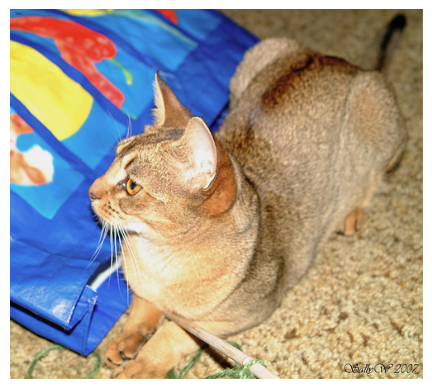

In [50]:
from tensorflow.keras.utils import load_img, img_to_array

plt.axis('off')
plt.imshow(load_img(input_img_paths[9]))

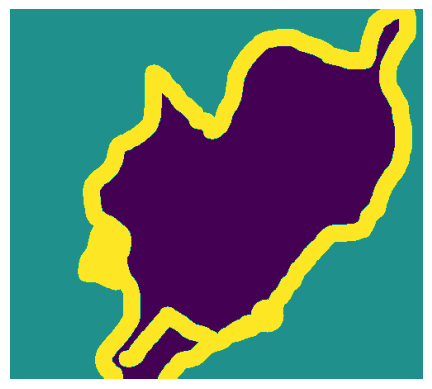

In [53]:
def display_target(target_array):
    normalized_array = (target_array.astype('uint8')-1) * 127 # Change the label(1, 2, 3) to 0, 1, 2 and multiply by 127, so they become 0, 127, 254
    plt.axis('off')
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[9], color_mode = 'grayscale')) # Load the image as one channel
display_target(img)

In [54]:
import random

# Set all images as same one size
img_size = (200, 200)
num_imgs = len(input_img_paths)

# Shuffle the data
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode='grayscale')
    )
    img = img.astype('uint8') - 1 # Make the target values as 0, 1, 2
    return img

# The array to store all input images, the shape is (num_imgs, 200, 200, 3)
input_imgs = np.zeros((num_imgs, ) + img_size + (3,), dtype='float32')

# The array to store all target images, the shape is (num_imgs, 200, 200, 1)
targets = np.zeros((num_imgs, ) + img_size + (1,), dtype='uint8')

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

# Split validation dataset
num_validation_samples = 1000
train_input_imgs = input_imgs[:-num_validation_samples]
train_targets = targets[:-num_validation_samples]
val_input_imgs = input_imgs[-num_validation_samples:]
val_targets = targets[-num_validation_samples:]

In [55]:
def get_model(img_size, num_classes):

    inputs = keras.Input(shape=img_size + (3,)) # (200, 200, 3)
    x = keras.layers.Rescaling(1./255)(inputs)

    # Set strides=2 to lower the number of features, and set padding=same to avoid boundary effect
    x = keras.layers.Conv2D(64, 3, strides=2, activation='relu', padding='same')(x)
    x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = keras.layers.Conv2D(128, 3, strides=2, activation='relu', padding='same')(x)
    x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = keras.layers.Conv2D(256, 3, strides=2, activation='relu', padding='same')(x)
    x = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)

    x = keras.layers.Conv2DTranspose(256, 3, activation='relu', padding='same')(x)
    x = keras.layers.Conv2DTranspose(256, 3, activation='relu', padding='same', strides=2)(x)
    x = keras.layers.Conv2DTranspose(128, 3, activation='relu', padding='same')(x)
    x = keras.layers.Conv2DTranspose(128, 3, activation='relu', padding='same', strides=2)(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation='relu', padding='same')(x)
    x = keras.layers.Conv2DTranspose(64, 3, activation='relu', padding='same', strides=2)(x)

    outputs = keras.layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)
    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
print(model.summary())


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 conv2d_19 (Conv2D)          (None, 25, 25, 256)       2951

In [56]:
model.compile(
    optimizer='rmsprop',
    loss = 'sparse_categorical_crossentropy'
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='oxford_segmentation.keras_',
        save_best_only=True
    )
]
history = model.fit(
    train_input_imgs, train_targets,
    epochs=50,
    batch_size=64,
    validation_data=(val_input_imgs, val_targets),
    callbacks=callbacks
)

Epoch 1/50


2023-12-12 21:02:04.884660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3389

2023-12-12 21:03:41.648245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 105s 993ms/step - loss: 1.3389 - val_loss: 0.9794
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 0.9270INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 97s 971ms/step - loss: 0.9270 - val_loss: 0.9444
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.8087INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 103s 1s/step - loss: 0.8087 - val_loss: 0.7858
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 0.7708INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 102s 1s/step - loss: 0.7708 - val_loss: 0.7498
Epoch 5/50
100/100 [==============================] - 96s 962ms/step - loss: 0.7458 - val_loss: 0.7518
Epoch 6/50
100/100 [==============================] - ETA: 0s - loss: 0.7011INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 98s 984ms/step - loss: 0.7011 - val_loss: 0.6550
Epoch 7/50
100/100 [==============================] - 95s 947ms/step - loss: 0.6552 - val_loss: 0.6783
Epoch 8/50
100/100 [==============================] - ETA: 0s - loss: 0.6219INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 95s 948ms/step - loss: 0.6219 - val_loss: 0.5792
Epoch 9/50
100/100 [==============================] - ETA: 0s - loss: 0.5926INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 95s 949ms/step - loss: 0.5926 - val_loss: 0.5370
Epoch 10/50
100/100 [==============================] - 94s 945ms/step - loss: 0.5908 - val_loss: 0.5860
Epoch 11/50
100/100 [==============================] - 94s 941ms/step - loss: 0.5511 - val_loss: 0.5900
Epoch 12/50
100/100 [==============================] - ETA: 0s - loss: 0.5353INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 95s 946ms/step - loss: 0.5353 - val_loss: 0.4926
Epoch 13/50
100/100 [==============================] - 94s 939ms/step - loss: 0.5178 - val_loss: 0.5271
Epoch 14/50
100/100 [==============================] - ETA: 0s - loss: 0.5044INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 95s 949ms/step - loss: 0.5044 - val_loss: 0.4849
Epoch 15/50
100/100 [==============================] - 94s 940ms/step - loss: 0.4794 - val_loss: 0.6115
Epoch 16/50
100/100 [==============================] - ETA: 0s - loss: 0.4736INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 95s 954ms/step - loss: 0.4736 - val_loss: 0.4600
Epoch 17/50
100/100 [==============================] - 94s 943ms/step - loss: 0.4587 - val_loss: 0.4649
Epoch 18/50
100/100 [==============================] - 2045s 21s/step - loss: 0.4522 - val_loss: 0.4678
Epoch 19/50
100/100 [==============================] - ETA: 0s - loss: 0.4323 INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


INFO:tensorflow:Assets written to: oxford_segmentation.keras_/assets


100/100 [==============================] - 1582s 16s/step - loss: 0.4323 - val_loss: 0.4171
Epoch 20/50
100/100 [==============================] - 94s 944ms/step - loss: 0.4277 - val_loss: 0.4289
Epoch 21/50
  9/100 [=>............................] - ETA: 1:21 - loss: 0.4285

KeyboardInterrupt: 